In [36]:
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
#import keras
import tensorflow as tf
import joblib
import pandas as pd

# from keras.utils import normalize
# from keras.metrics import MeanIoU
# from keras.utils import to_categorical
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from eval_func2 import *

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ['CUDA_VISIBLE_DEVICE'] = '0 

Num GPUs Available:  2


2023-02-01 13:00:31.170628: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-01 13:00:31.172903: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-01 13:00:31.271308: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:a1:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.77GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-02-01 13:00:31.272046: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.77GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-02-01 13:00:31.272080: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.s

In [3]:
backbones = ['vgg16', 'vgg19', 'resnet50', 'resnext50', 'efficientnetb7', 'inceptionresnetv2', 'densenet201', 'inceptionv3', 'mobilenetv2', 'seresnet50', 'seresnext50', 'senet154']
dir_drive = 'Result'

SIZE_X = 128 #Bisa Disesuaikan
SIZE_Y = 128 #Bisa Disesuaikan
n_classes = 5
list_color = [[0, 0, 0],
            [0, 128, 128],
            [128, 0, 0],
            [0, 128, 0],
            [0, 0, 128]]

colormap = np.array(list_color)
colormap = colormap.astype(np.uint8)

activation='softmax'
epoch = 150
bs = 8
LR = 0.0001


for dir1 in backbones :
    direktori = f'{dir_drive}/{dir1}/'
    if (not os.path.exists(direktori)):
        os.makedirs(direktori)

In [49]:

# img_dst = f'{dir_dst}/Fold{str(fold)}/{img_name[idx]}.data'
# msk_dst = f'{dir_dst}/Fold{str(fold)}/{msk_name[idx]}.data'

for back in backbones:
    X_train = joblib.load(f'Dataset/Splitted Data/X_train.data')
    y_train = joblib.load(f'Dataset/Splitted Data/y_train.data')
    X_valid = joblib.load(f'Dataset/Splitted Data/X_valid.data')
    y_valid = joblib.load(f'Dataset/Splitted Data/y_valid.data')

    print(f"=========================== Model Unet dengan Backbone {back} Mulai ===========================")
    model_path = f'{dir_drive}/{back}/UNet_{back}.h5'
    optim = tf.keras.optimizers.Adam(LR)
    loss = tf.keras.losses.CategoricalCrossentropy()
    mc = ModelCheckpoint(mode='auto', filepath=model_path, monitor='val_loss', save_best_only='True', verbose=1)
    callbacks = [mc]

    preprocess_input = sm.get_preprocessing(back)
    X_train0 = preprocess_input(X_train)
    X_valid0 = preprocess_input(X_valid)

    y_train0 = y_train.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2]))
    y_train0 = to_categorical(y_train0)

    y_valid0 = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], y_valid.shape[2]))
    y_valid0 = to_categorical(y_valid0)

    # define model
    model = sm.Unet(back, encoder_weights='imagenet', classes=n_classes, activation=activation)
    model.compile(optim, loss, metrics=["accuracy"])
    history = model.fit(X_train0, y_train0, batch_size=bs, epochs=epoch, verbose=1, validation_data=(X_valid0, y_valid0), callbacks=callbacks)
    joblib.dump(history.history, f'{dir_drive}/{back}/UNet_{back}.hist')

    print(f"========================== Model Unet dengan Backbone {back} Selesai ==========================")

    del X_train, y_train, X_valid, y_valid
    del model_path, mc, callbacks, preprocess_input, X_train0, X_valid0
    del model, history, optim, loss
    

=========================== (Fold 0) Model Unet dengan Backbone vgg16 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 3s 45ms/step - loss: 1.6219 - accuracy: 0.2630 - val_loss: 1.8404 - val_accuracy: 0.2731

Epoch 00001: val_loss improved from inf to 1.84037, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold0/UNet_vgg16_fold0.h5
Epoch 2/150
47/47 [==============================] - 2s 39ms/step - loss: 1.2586 - accuracy: 0.5020 - val_loss: 1.4350 - val_accuracy: 0.3878

Epoch 00002: val_loss improved from 1.84037 to 1.43504, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold0/UNet_vgg16_fold0.h5
Epoch 3/150
47/47 [==============================] - 2s 39ms/step - loss: 1.1205 - accuracy: 0.5730 - val_loss: 1.1158 - val_accuracy: 0.5753

Epoch 00003: val_loss improved from 1.43504 to 1.11577, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold0/UNet_vgg16_fold0.h5
Epoch 4/150
47/47 [==========================

47/47 [==============================] - 2s 40ms/step - loss: 0.1655 - accuracy: 0.9383 - val_loss: 0.8979 - val_accuracy: 0.7754

Epoch 00076: val_loss did not improve from 0.69047
Epoch 77/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1692 - accuracy: 0.9392 - val_loss: 0.8877 - val_accuracy: 0.7737

Epoch 00077: val_loss did not improve from 0.69047
Epoch 78/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1567 - accuracy: 0.9423 - val_loss: 0.9123 - val_accuracy: 0.7712

Epoch 00078: val_loss did not improve from 0.69047
Epoch 79/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1631 - accuracy: 0.9397 - val_loss: 0.9510 - val_accuracy: 0.7723

Epoch 00079: val_loss did not improve from 0.69047
Epoch 80/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1592 - accuracy: 0.9414 - val_loss: 0.9089 - val_accuracy: 0.7748

Epoch 00080: val_loss did not improve from 0.69047
Epoch 81/150
47/47 [==================

47/47 [==============================] - 2s 39ms/step - loss: 0.1058 - accuracy: 0.9591 - val_loss: 1.0575 - val_accuracy: 0.7725

Epoch 00118: val_loss did not improve from 0.69047
Epoch 119/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1133 - accuracy: 0.9560 - val_loss: 1.0087 - val_accuracy: 0.7754

Epoch 00119: val_loss did not improve from 0.69047
Epoch 120/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1034 - accuracy: 0.9596 - val_loss: 1.0521 - val_accuracy: 0.7709

Epoch 00120: val_loss did not improve from 0.69047
Epoch 121/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1124 - accuracy: 0.9567 - val_loss: 1.0539 - val_accuracy: 0.7769

Epoch 00121: val_loss did not improve from 0.69047
Epoch 122/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1069 - accuracy: 0.9582 - val_loss: 1.0329 - val_accuracy: 0.7660

Epoch 00122: val_loss did not improve from 0.69047
Epoch 123/150
47/47 [=============


Epoch 00006: val_loss improved from 0.99351 to 0.94167, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold1/UNet_vgg16_fold1.h5
Epoch 7/150
47/47 [==============================] - 2s 40ms/step - loss: 0.9302 - accuracy: 0.6392 - val_loss: 0.9543 - val_accuracy: 0.6234

Epoch 00007: val_loss did not improve from 0.94167
Epoch 8/150
47/47 [==============================] - 2s 39ms/step - loss: 0.8934 - accuracy: 0.6518 - val_loss: 1.0054 - val_accuracy: 0.5977

Epoch 00008: val_loss did not improve from 0.94167
Epoch 9/150
47/47 [==============================] - 2s 39ms/step - loss: 0.8262 - accuracy: 0.6798 - val_loss: 0.8749 - val_accuracy: 0.6631

Epoch 00009: val_loss improved from 0.94167 to 0.87494, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold1/UNet_vgg16_fold1.h5
Epoch 10/150
47/47 [==============================] - 2s 40ms/step - loss: 0.8093 - accuracy: 0.6878 - val_loss: 0.8202 - val_accuracy: 0.6764

Epoch 00010: val_loss improved from 0.87

47/47 [==============================] - 2s 40ms/step - loss: 0.1610 - accuracy: 0.9398 - val_loss: 0.9866 - val_accuracy: 0.7522

Epoch 00085: val_loss did not improve from 0.68085
Epoch 86/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1686 - accuracy: 0.9369 - val_loss: 1.0007 - val_accuracy: 0.7526

Epoch 00086: val_loss did not improve from 0.68085
Epoch 87/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1642 - accuracy: 0.9387 - val_loss: 1.0007 - val_accuracy: 0.7579

Epoch 00087: val_loss did not improve from 0.68085
Epoch 88/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1566 - accuracy: 0.9415 - val_loss: 1.0257 - val_accuracy: 0.7528

Epoch 00088: val_loss did not improve from 0.68085
Epoch 89/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1468 - accuracy: 0.9447 - val_loss: 1.0338 - val_accuracy: 0.7554

Epoch 00089: val_loss did not improve from 0.68085
Epoch 90/150
47/47 [==================

47/47 [==============================] - 2s 40ms/step - loss: 0.1163 - accuracy: 0.9572 - val_loss: 1.1344 - val_accuracy: 0.7553

Epoch 00127: val_loss did not improve from 0.68085
Epoch 128/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1127 - accuracy: 0.9565 - val_loss: 1.1467 - val_accuracy: 0.7551

Epoch 00128: val_loss did not improve from 0.68085
Epoch 129/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1093 - accuracy: 0.9583 - val_loss: 1.1434 - val_accuracy: 0.7480

Epoch 00129: val_loss did not improve from 0.68085
Epoch 130/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1096 - accuracy: 0.9591 - val_loss: 1.1768 - val_accuracy: 0.7466

Epoch 00130: val_loss did not improve from 0.68085
Epoch 131/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1020 - accuracy: 0.9612 - val_loss: 1.1780 - val_accuracy: 0.7500

Epoch 00131: val_loss did not improve from 0.68085
Epoch 132/150
47/47 [=============

47/47 [==============================] - 2s 39ms/step - loss: 0.7041 - accuracy: 0.7250 - val_loss: 0.8114 - val_accuracy: 0.6850

Epoch 00014: val_loss improved from 0.84289 to 0.81136, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold2/UNet_vgg16_fold2.h5
Epoch 15/150
47/47 [==============================] - 2s 40ms/step - loss: 0.6978 - accuracy: 0.7252 - val_loss: 0.7879 - val_accuracy: 0.6898

Epoch 00015: val_loss improved from 0.81136 to 0.78791, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold2/UNet_vgg16_fold2.h5
Epoch 16/150
47/47 [==============================] - 2s 40ms/step - loss: 0.6419 - accuracy: 0.7464 - val_loss: 0.7788 - val_accuracy: 0.6925

Epoch 00016: val_loss improved from 0.78791 to 0.77880, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold2/UNet_vgg16_fold2.h5
Epoch 17/150
47/47 [==============================] - 2s 40ms/step - loss: 0.6234 - accuracy: 0.7580 - val_loss: 0.7731 - val_accuracy: 0.7020

Epoch 00017

47/47 [==============================] - 2s 41ms/step - loss: 0.2577 - accuracy: 0.9019 - val_loss: 0.8245 - val_accuracy: 0.7518

Epoch 00052: val_loss did not improve from 0.72214
Epoch 53/150
47/47 [==============================] - 2s 40ms/step - loss: 0.2353 - accuracy: 0.9127 - val_loss: 0.8378 - val_accuracy: 0.7458

Epoch 00053: val_loss did not improve from 0.72214
Epoch 54/150
47/47 [==============================] - 2s 40ms/step - loss: 0.2439 - accuracy: 0.9067 - val_loss: 0.8377 - val_accuracy: 0.7486

Epoch 00054: val_loss did not improve from 0.72214
Epoch 55/150
47/47 [==============================] - 2s 40ms/step - loss: 0.2337 - accuracy: 0.9122 - val_loss: 0.8478 - val_accuracy: 0.7504

Epoch 00055: val_loss did not improve from 0.72214
Epoch 56/150
47/47 [==============================] - 2s 40ms/step - loss: 0.2467 - accuracy: 0.9089 - val_loss: 0.8621 - val_accuracy: 0.7478

Epoch 00056: val_loss did not improve from 0.72214
Epoch 57/150
47/47 [==================

47/47 [==============================] - 2s 40ms/step - loss: 0.1070 - accuracy: 0.9579 - val_loss: 1.1692 - val_accuracy: 0.7552

Epoch 00136: val_loss did not improve from 0.72214
Epoch 137/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1034 - accuracy: 0.9600 - val_loss: 1.1374 - val_accuracy: 0.7534

Epoch 00137: val_loss did not improve from 0.72214
Epoch 138/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0946 - accuracy: 0.9627 - val_loss: 1.1274 - val_accuracy: 0.7579

Epoch 00138: val_loss did not improve from 0.72214
Epoch 139/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0955 - accuracy: 0.9619 - val_loss: 1.1677 - val_accuracy: 0.7474

Epoch 00139: val_loss did not improve from 0.72214
Epoch 140/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0897 - accuracy: 0.9647 - val_loss: 1.1658 - val_accuracy: 0.7507

Epoch 00140: val_loss did not improve from 0.72214
Epoch 141/150
47/47 [=============

47/47 [==============================] - 2s 40ms/step - loss: 0.5834 - accuracy: 0.7737 - val_loss: 0.6952 - val_accuracy: 0.7331

Epoch 00020: val_loss improved from 0.70361 to 0.69523, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold3/UNet_vgg16_fold3.h5
Epoch 21/150
47/47 [==============================] - 2s 40ms/step - loss: 0.5664 - accuracy: 0.7802 - val_loss: 0.6833 - val_accuracy: 0.7404

Epoch 00021: val_loss improved from 0.69523 to 0.68329, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold3/UNet_vgg16_fold3.h5
Epoch 22/150
47/47 [==============================] - 2s 40ms/step - loss: 0.5495 - accuracy: 0.7889 - val_loss: 0.7085 - val_accuracy: 0.7330

Epoch 00022: val_loss did not improve from 0.68329
Epoch 23/150
47/47 [==============================] - 2s 40ms/step - loss: 0.5438 - accuracy: 0.7887 - val_loss: 0.6949 - val_accuracy: 0.7422

Epoch 00023: val_loss did not improve from 0.68329
Epoch 24/150
47/47 [==============================]

47/47 [==============================] - 2s 40ms/step - loss: 0.1010 - accuracy: 0.9607 - val_loss: 1.0490 - val_accuracy: 0.7636

Epoch 00103: val_loss did not improve from 0.68329
Epoch 104/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1054 - accuracy: 0.9583 - val_loss: 1.0864 - val_accuracy: 0.7683

Epoch 00104: val_loss did not improve from 0.68329
Epoch 105/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0961 - accuracy: 0.9633 - val_loss: 1.0643 - val_accuracy: 0.7636

Epoch 00105: val_loss did not improve from 0.68329
Epoch 106/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1069 - accuracy: 0.9583 - val_loss: 1.0462 - val_accuracy: 0.7726

Epoch 00106: val_loss did not improve from 0.68329
Epoch 107/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1010 - accuracy: 0.9606 - val_loss: 1.0592 - val_accuracy: 0.7659

Epoch 00107: val_loss did not improve from 0.68329
Epoch 108/150
47/47 [=============

47/47 [==============================] - 2s 40ms/step - loss: 0.0789 - accuracy: 0.9681 - val_loss: 1.1815 - val_accuracy: 0.7641

Epoch 00145: val_loss did not improve from 0.68329
Epoch 146/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0780 - accuracy: 0.9684 - val_loss: 1.1802 - val_accuracy: 0.7731

Epoch 00146: val_loss did not improve from 0.68329
Epoch 147/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0813 - accuracy: 0.9674 - val_loss: 1.1630 - val_accuracy: 0.7677

Epoch 00147: val_loss did not improve from 0.68329
Epoch 148/150
47/47 [==============================] - 2s 41ms/step - loss: 0.0837 - accuracy: 0.9661 - val_loss: 1.1970 - val_accuracy: 0.7721

Epoch 00148: val_loss did not improve from 0.68329
Epoch 149/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0810 - accuracy: 0.9667 - val_loss: 1.2148 - val_accuracy: 0.7690

Epoch 00149: val_loss did not improve from 0.68329
Epoch 150/150
47/47 [=============

47/47 [==============================] - 2s 41ms/step - loss: 0.2032 - accuracy: 0.9224 - val_loss: 0.8505 - val_accuracy: 0.7657

Epoch 00069: val_loss did not improve from 0.66390
Epoch 70/150
47/47 [==============================] - 2s 41ms/step - loss: 0.1812 - accuracy: 0.9323 - val_loss: 0.8647 - val_accuracy: 0.7647

Epoch 00070: val_loss did not improve from 0.66390
Epoch 71/150
47/47 [==============================] - 2s 41ms/step - loss: 0.2002 - accuracy: 0.9248 - val_loss: 0.8451 - val_accuracy: 0.7666

Epoch 00071: val_loss did not improve from 0.66390
Epoch 72/150
47/47 [==============================] - 2s 41ms/step - loss: 0.1770 - accuracy: 0.9337 - val_loss: 0.8742 - val_accuracy: 0.7674

Epoch 00072: val_loss did not improve from 0.66390
Epoch 73/150
47/47 [==============================] - 2s 41ms/step - loss: 0.1756 - accuracy: 0.9348 - val_loss: 0.8630 - val_accuracy: 0.7600

Epoch 00073: val_loss did not improve from 0.66390
Epoch 74/150
47/47 [==================

47/47 [==============================] - 2s 41ms/step - loss: 0.1266 - accuracy: 0.9514 - val_loss: 1.0130 - val_accuracy: 0.7686

Epoch 00111: val_loss did not improve from 0.66390
Epoch 112/150
47/47 [==============================] - 2s 41ms/step - loss: 0.1142 - accuracy: 0.9568 - val_loss: 1.0091 - val_accuracy: 0.7650

Epoch 00112: val_loss did not improve from 0.66390
Epoch 113/150
47/47 [==============================] - 2s 41ms/step - loss: 0.1196 - accuracy: 0.9552 - val_loss: 1.0050 - val_accuracy: 0.7645

Epoch 00113: val_loss did not improve from 0.66390
Epoch 114/150
47/47 [==============================] - 2s 41ms/step - loss: 0.1106 - accuracy: 0.9580 - val_loss: 1.0664 - val_accuracy: 0.7645

Epoch 00114: val_loss did not improve from 0.66390
Epoch 115/150
47/47 [==============================] - 2s 41ms/step - loss: 0.1146 - accuracy: 0.9561 - val_loss: 0.9977 - val_accuracy: 0.7714

Epoch 00115: val_loss did not improve from 0.66390
Epoch 116/150
47/47 [=============

Epoch 2/150
47/47 [==============================] - 2s 40ms/step - loss: 1.3930 - accuracy: 0.4720 - val_loss: 1.9895 - val_accuracy: 0.3810

Epoch 00002: val_loss improved from 5.52042 to 1.98946, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold5/UNet_vgg16_fold5.h5
Epoch 3/150
47/47 [==============================] - 2s 39ms/step - loss: 1.2066 - accuracy: 0.5579 - val_loss: 1.3582 - val_accuracy: 0.5052

Epoch 00003: val_loss improved from 1.98946 to 1.35817, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold5/UNet_vgg16_fold5.h5
Epoch 4/150
47/47 [==============================] - 2s 40ms/step - loss: 1.1059 - accuracy: 0.5987 - val_loss: 1.0708 - val_accuracy: 0.5969

Epoch 00004: val_loss improved from 1.35817 to 1.07077, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold5/UNet_vgg16_fold5.h5
Epoch 5/150
47/47 [==============================] - 2s 40ms/step - loss: 1.0068 - accuracy: 0.6300 - val_loss: 1.0208 - val_accuracy: 0.6112

Ep

47/47 [==============================] - 2s 41ms/step - loss: 0.3902 - accuracy: 0.8504 - val_loss: 0.7902 - val_accuracy: 0.7304

Epoch 00037: val_loss did not improve from 0.71629
Epoch 38/150
47/47 [==============================] - 2s 42ms/step - loss: 0.3358 - accuracy: 0.8695 - val_loss: 0.8625 - val_accuracy: 0.7313

Epoch 00038: val_loss did not improve from 0.71629
Epoch 39/150
47/47 [==============================] - 2s 41ms/step - loss: 0.3325 - accuracy: 0.8730 - val_loss: 0.8499 - val_accuracy: 0.7389

Epoch 00039: val_loss did not improve from 0.71629
Epoch 40/150
47/47 [==============================] - 2s 41ms/step - loss: 0.3056 - accuracy: 0.8848 - val_loss: 0.7763 - val_accuracy: 0.7346

Epoch 00040: val_loss did not improve from 0.71629
Epoch 41/150
47/47 [==============================] - 2s 42ms/step - loss: 0.3387 - accuracy: 0.8706 - val_loss: 0.8186 - val_accuracy: 0.7387

Epoch 00041: val_loss did not improve from 0.71629
Epoch 42/150
47/47 [==================

47/47 [==============================] - 2s 42ms/step - loss: 0.1016 - accuracy: 0.9609 - val_loss: 1.0890 - val_accuracy: 0.7570

Epoch 00121: val_loss did not improve from 0.71629
Epoch 122/150
47/47 [==============================] - 2s 41ms/step - loss: 0.0928 - accuracy: 0.9628 - val_loss: 1.1103 - val_accuracy: 0.7524

Epoch 00122: val_loss did not improve from 0.71629
Epoch 123/150
47/47 [==============================] - 2s 41ms/step - loss: 0.0875 - accuracy: 0.9659 - val_loss: 1.0991 - val_accuracy: 0.7470

Epoch 00123: val_loss did not improve from 0.71629
Epoch 124/150
47/47 [==============================] - 2s 41ms/step - loss: 0.0903 - accuracy: 0.9638 - val_loss: 1.0967 - val_accuracy: 0.7504

Epoch 00124: val_loss did not improve from 0.71629
Epoch 125/150
47/47 [==============================] - 2s 41ms/step - loss: 0.0950 - accuracy: 0.9619 - val_loss: 1.1411 - val_accuracy: 0.7483

Epoch 00125: val_loss did not improve from 0.71629
Epoch 126/150
47/47 [=============

47/47 [==============================] - 2s 41ms/step - loss: 0.2813 - accuracy: 0.8948 - val_loss: 0.7247 - val_accuracy: 0.7577

Epoch 00046: val_loss did not improve from 0.67153
Epoch 47/150
47/47 [==============================] - 2s 42ms/step - loss: 0.2765 - accuracy: 0.8950 - val_loss: 0.7812 - val_accuracy: 0.7468

Epoch 00047: val_loss did not improve from 0.67153
Epoch 48/150
47/47 [==============================] - 2s 41ms/step - loss: 0.2953 - accuracy: 0.8864 - val_loss: 0.7501 - val_accuracy: 0.7556

Epoch 00048: val_loss did not improve from 0.67153
Epoch 49/150
47/47 [==============================] - 2s 41ms/step - loss: 0.2618 - accuracy: 0.9019 - val_loss: 0.7277 - val_accuracy: 0.7574

Epoch 00049: val_loss did not improve from 0.67153
Epoch 50/150
47/47 [==============================] - 2s 41ms/step - loss: 0.2591 - accuracy: 0.9030 - val_loss: 0.8167 - val_accuracy: 0.7526

Epoch 00050: val_loss did not improve from 0.67153
Epoch 51/150
47/47 [==================

47/47 [==============================] - 2s 41ms/step - loss: 0.0959 - accuracy: 0.9623 - val_loss: 1.0500 - val_accuracy: 0.7553

Epoch 00130: val_loss did not improve from 0.67153
Epoch 131/150
47/47 [==============================] - 2s 41ms/step - loss: 0.0927 - accuracy: 0.9632 - val_loss: 1.0363 - val_accuracy: 0.7646

Epoch 00131: val_loss did not improve from 0.67153
Epoch 132/150
47/47 [==============================] - 2s 41ms/step - loss: 0.0913 - accuracy: 0.9631 - val_loss: 1.0160 - val_accuracy: 0.7599

Epoch 00132: val_loss did not improve from 0.67153
Epoch 133/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0946 - accuracy: 0.9607 - val_loss: 1.0538 - val_accuracy: 0.7606

Epoch 00133: val_loss did not improve from 0.67153
Epoch 134/150
47/47 [==============================] - 2s 41ms/step - loss: 0.0934 - accuracy: 0.9615 - val_loss: 1.0418 - val_accuracy: 0.7564

Epoch 00134: val_loss did not improve from 0.67153
Epoch 135/150
47/47 [=============

47/47 [==============================] - 2s 41ms/step - loss: 0.2646 - accuracy: 0.9027 - val_loss: 0.8181 - val_accuracy: 0.7606

Epoch 00053: val_loss did not improve from 0.66838
Epoch 54/150
47/47 [==============================] - 2s 41ms/step - loss: 0.2363 - accuracy: 0.9112 - val_loss: 0.7880 - val_accuracy: 0.7609

Epoch 00054: val_loss did not improve from 0.66838
Epoch 55/150
47/47 [==============================] - 2s 41ms/step - loss: 0.2277 - accuracy: 0.9151 - val_loss: 0.7858 - val_accuracy: 0.7680

Epoch 00055: val_loss did not improve from 0.66838
Epoch 56/150
47/47 [==============================] - 2s 41ms/step - loss: 0.2543 - accuracy: 0.9027 - val_loss: 0.8037 - val_accuracy: 0.7627

Epoch 00056: val_loss did not improve from 0.66838
Epoch 57/150
47/47 [==============================] - 2s 41ms/step - loss: 0.2388 - accuracy: 0.9118 - val_loss: 0.8226 - val_accuracy: 0.7662

Epoch 00057: val_loss did not improve from 0.66838
Epoch 58/150
47/47 [==================

47/47 [==============================] - 2s 40ms/step - loss: 0.0962 - accuracy: 0.9631 - val_loss: 1.1276 - val_accuracy: 0.7596

Epoch 00137: val_loss did not improve from 0.66838
Epoch 138/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1069 - accuracy: 0.9580 - val_loss: 1.0783 - val_accuracy: 0.7669

Epoch 00138: val_loss did not improve from 0.66838
Epoch 139/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0995 - accuracy: 0.9618 - val_loss: 1.0615 - val_accuracy: 0.7736

Epoch 00139: val_loss did not improve from 0.66838
Epoch 140/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0877 - accuracy: 0.9667 - val_loss: 1.0969 - val_accuracy: 0.7645

Epoch 00140: val_loss did not improve from 0.66838
Epoch 141/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0862 - accuracy: 0.9667 - val_loss: 1.1401 - val_accuracy: 0.7730

Epoch 00141: val_loss did not improve from 0.66838
Epoch 142/150
47/47 [=============

Epoch 22/150
47/47 [==============================] - 2s 40ms/step - loss: 0.5596 - accuracy: 0.7803 - val_loss: 0.7007 - val_accuracy: 0.7284

Epoch 00022: val_loss did not improve from 0.66706
Epoch 23/150
47/47 [==============================] - 2s 39ms/step - loss: 0.5387 - accuracy: 0.7920 - val_loss: 0.6548 - val_accuracy: 0.7490

Epoch 00023: val_loss improved from 0.66706 to 0.65483, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg16/fold8/UNet_vgg16_fold8.h5
Epoch 24/150
47/47 [==============================] - 2s 40ms/step - loss: 0.5089 - accuracy: 0.7975 - val_loss: 0.6939 - val_accuracy: 0.7384

Epoch 00024: val_loss did not improve from 0.65483
Epoch 25/150
47/47 [==============================] - 2s 40ms/step - loss: 0.4764 - accuracy: 0.8136 - val_loss: 0.6850 - val_accuracy: 0.7374

Epoch 00025: val_loss did not improve from 0.65483
Epoch 26/150
47/47 [==============================] - 2s 40ms/step - loss: 0.4898 - accuracy: 0.8089 - val_loss: 0.6388 - val_acc


Epoch 00062: val_loss did not improve from 0.63863
Epoch 63/150
47/47 [==============================] - 2s 39ms/step - loss: 0.2031 - accuracy: 0.9245 - val_loss: 0.7920 - val_accuracy: 0.7696

Epoch 00063: val_loss did not improve from 0.63863
Epoch 64/150
47/47 [==============================] - 2s 39ms/step - loss: 0.2020 - accuracy: 0.9251 - val_loss: 0.7727 - val_accuracy: 0.7805

Epoch 00064: val_loss did not improve from 0.63863
Epoch 65/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1942 - accuracy: 0.9275 - val_loss: 0.7940 - val_accuracy: 0.7738

Epoch 00065: val_loss did not improve from 0.63863
Epoch 66/150
47/47 [==============================] - 2s 39ms/step - loss: 0.2238 - accuracy: 0.9150 - val_loss: 0.8070 - val_accuracy: 0.7690

Epoch 00066: val_loss did not improve from 0.63863
Epoch 67/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1918 - accuracy: 0.9296 - val_loss: 0.8272 - val_accuracy: 0.7594

Epoch 00067: val_loss di


Epoch 00104: val_loss did not improve from 0.63863
Epoch 105/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1208 - accuracy: 0.9544 - val_loss: 0.9171 - val_accuracy: 0.7756

Epoch 00105: val_loss did not improve from 0.63863
Epoch 106/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1057 - accuracy: 0.9598 - val_loss: 0.9442 - val_accuracy: 0.7669

Epoch 00106: val_loss did not improve from 0.63863
Epoch 107/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1124 - accuracy: 0.9575 - val_loss: 0.8998 - val_accuracy: 0.7774

Epoch 00107: val_loss did not improve from 0.63863
Epoch 108/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1176 - accuracy: 0.9541 - val_loss: 0.9530 - val_accuracy: 0.7763

Epoch 00108: val_loss did not improve from 0.63863
Epoch 109/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1201 - accuracy: 0.9535 - val_loss: 0.9592 - val_accuracy: 0.7709

Epoch 00109: val_lo


Epoch 00146: val_loss did not improve from 0.63863
Epoch 147/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0908 - accuracy: 0.9628 - val_loss: 1.1523 - val_accuracy: 0.7582

Epoch 00147: val_loss did not improve from 0.63863
Epoch 148/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0848 - accuracy: 0.9662 - val_loss: 1.0903 - val_accuracy: 0.7667

Epoch 00148: val_loss did not improve from 0.63863
Epoch 149/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0780 - accuracy: 0.9687 - val_loss: 1.0823 - val_accuracy: 0.7733

Epoch 00149: val_loss did not improve from 0.63863
Epoch 150/150
47/47 [==============================] - 2s 40ms/step - loss: 0.0843 - accuracy: 0.9666 - val_loss: 1.1167 - val_accuracy: 0.7664

Epoch 00150: val_loss did not improve from 0.63863
========================== (Fold 8) Model Unet dengan Backbone vgg16 Selesai ==========================
=========================== (Fold 9) Model Unet dengan Backb

47/47 [==============================] - 2s 39ms/step - loss: 0.1787 - accuracy: 0.9331 - val_loss: 0.9219 - val_accuracy: 0.7568

Epoch 00072: val_loss did not improve from 0.66826
Epoch 73/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1803 - accuracy: 0.9320 - val_loss: 0.9273 - val_accuracy: 0.7612

Epoch 00073: val_loss did not improve from 0.66826
Epoch 74/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1883 - accuracy: 0.9301 - val_loss: 0.9314 - val_accuracy: 0.7588

Epoch 00074: val_loss did not improve from 0.66826
Epoch 75/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1687 - accuracy: 0.9366 - val_loss: 0.9232 - val_accuracy: 0.7698

Epoch 00075: val_loss did not improve from 0.66826
Epoch 76/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1733 - accuracy: 0.9345 - val_loss: 0.9420 - val_accuracy: 0.7578

Epoch 00076: val_loss did not improve from 0.66826
Epoch 77/150
47/47 [==================

47/47 [==============================] - 2s 40ms/step - loss: 0.1102 - accuracy: 0.9572 - val_loss: 1.1029 - val_accuracy: 0.7644

Epoch 00114: val_loss did not improve from 0.66826
Epoch 115/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1148 - accuracy: 0.9556 - val_loss: 1.0394 - val_accuracy: 0.7622

Epoch 00115: val_loss did not improve from 0.66826
Epoch 116/150
47/47 [==============================] - 2s 40ms/step - loss: 0.1069 - accuracy: 0.9585 - val_loss: 1.0877 - val_accuracy: 0.7578

Epoch 00116: val_loss did not improve from 0.66826
Epoch 117/150
47/47 [==============================] - 2s 39ms/step - loss: 0.0985 - accuracy: 0.9625 - val_loss: 1.0822 - val_accuracy: 0.7599

Epoch 00117: val_loss did not improve from 0.66826
Epoch 118/150
47/47 [==============================] - 2s 39ms/step - loss: 0.0998 - accuracy: 0.9617 - val_loss: 1.0733 - val_accuracy: 0.7578

Epoch 00118: val_loss did not improve from 0.66826
Epoch 119/150
47/47 [=============

Epoch 4/150
47/47 [==============================] - 2s 45ms/step - loss: 1.0799 - accuracy: 0.6020 - val_loss: 1.0349 - val_accuracy: 0.6342

Epoch 00004: val_loss improved from 1.34887 to 1.03486, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold0/UNet_vgg19_fold0.h5
Epoch 5/150
47/47 [==============================] - 2s 44ms/step - loss: 0.9951 - accuracy: 0.6278 - val_loss: 1.0068 - val_accuracy: 0.6335

Epoch 00005: val_loss improved from 1.03486 to 1.00682, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold0/UNet_vgg19_fold0.h5
Epoch 6/150
47/47 [==============================] - 2s 45ms/step - loss: 0.9253 - accuracy: 0.6533 - val_loss: 1.2203 - val_accuracy: 0.5571

Epoch 00006: val_loss did not improve from 1.00682
Epoch 7/150
47/47 [==============================] - 2s 44ms/step - loss: 0.8632 - accuracy: 0.6729 - val_loss: 0.9909 - val_accuracy: 0.6305

Epoch 00007: val_loss improved from 1.00682 to 0.99086, saving model to /media/isysrgcom/New 

47/47 [==============================] - 2s 45ms/step - loss: 0.1376 - accuracy: 0.9480 - val_loss: 0.9128 - val_accuracy: 0.7745

Epoch 00082: val_loss did not improve from 0.70337
Epoch 83/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1306 - accuracy: 0.9507 - val_loss: 0.9184 - val_accuracy: 0.7801

Epoch 00083: val_loss did not improve from 0.70337
Epoch 84/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1302 - accuracy: 0.9499 - val_loss: 0.9221 - val_accuracy: 0.7777

Epoch 00084: val_loss did not improve from 0.70337
Epoch 85/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1366 - accuracy: 0.9475 - val_loss: 0.9149 - val_accuracy: 0.7717

Epoch 00085: val_loss did not improve from 0.70337
Epoch 86/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1288 - accuracy: 0.9503 - val_loss: 0.9452 - val_accuracy: 0.7652

Epoch 00086: val_loss did not improve from 0.70337
Epoch 87/150
47/47 [==================

Epoch 124/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0873 - accuracy: 0.9642 - val_loss: 1.0513 - val_accuracy: 0.7763

Epoch 00124: val_loss did not improve from 0.70337
Epoch 125/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0888 - accuracy: 0.9639 - val_loss: 1.0521 - val_accuracy: 0.7787

Epoch 00125: val_loss did not improve from 0.70337
Epoch 126/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0864 - accuracy: 0.9647 - val_loss: 1.0752 - val_accuracy: 0.7773

Epoch 00126: val_loss did not improve from 0.70337
Epoch 127/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0822 - accuracy: 0.9669 - val_loss: 1.0822 - val_accuracy: 0.7741

Epoch 00127: val_loss did not improve from 0.70337
Epoch 128/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0964 - accuracy: 0.9605 - val_loss: 1.0879 - val_accuracy: 0.7794

Epoch 00128: val_loss did not improve from 0.70337
Epoch 129/150
47/47 

47/47 [==============================] - 2s 46ms/step - loss: 0.2525 - accuracy: 0.9054 - val_loss: 0.7551 - val_accuracy: 0.7523

Epoch 00048: val_loss did not improve from 0.64473
Epoch 49/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2568 - accuracy: 0.9032 - val_loss: 0.7709 - val_accuracy: 0.7613

Epoch 00049: val_loss did not improve from 0.64473
Epoch 50/150
47/47 [==============================] - 2s 45ms/step - loss: 0.2348 - accuracy: 0.9126 - val_loss: 0.7967 - val_accuracy: 0.7556

Epoch 00050: val_loss did not improve from 0.64473
Epoch 51/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2354 - accuracy: 0.9113 - val_loss: 0.8184 - val_accuracy: 0.7535

Epoch 00051: val_loss did not improve from 0.64473
Epoch 52/150
47/47 [==============================] - 2s 45ms/step - loss: 0.2351 - accuracy: 0.9113 - val_loss: 0.8042 - val_accuracy: 0.7527

Epoch 00052: val_loss did not improve from 0.64473
Epoch 53/150
47/47 [==================

Epoch 132/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0786 - accuracy: 0.9684 - val_loss: 1.1295 - val_accuracy: 0.7616

Epoch 00132: val_loss did not improve from 0.64473
Epoch 133/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0802 - accuracy: 0.9673 - val_loss: 1.1311 - val_accuracy: 0.7638

Epoch 00133: val_loss did not improve from 0.64473
Epoch 134/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0778 - accuracy: 0.9685 - val_loss: 1.0929 - val_accuracy: 0.7659

Epoch 00134: val_loss did not improve from 0.64473
Epoch 135/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0760 - accuracy: 0.9688 - val_loss: 1.1415 - val_accuracy: 0.7612

Epoch 00135: val_loss did not improve from 0.64473
Epoch 136/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0770 - accuracy: 0.9688 - val_loss: 1.1484 - val_accuracy: 0.7684

Epoch 00136: val_loss did not improve from 0.64473
Epoch 137/150
47/47 

47/47 [==============================] - 2s 44ms/step - loss: 0.5570 - accuracy: 0.7835 - val_loss: 0.7420 - val_accuracy: 0.7090

Epoch 00018: val_loss improved from 0.75558 to 0.74202, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold2/UNet_vgg19_fold2.h5
Epoch 19/150
47/47 [==============================] - 2s 45ms/step - loss: 0.5495 - accuracy: 0.7843 - val_loss: 0.7463 - val_accuracy: 0.7151

Epoch 00019: val_loss did not improve from 0.74202
Epoch 20/150
47/47 [==============================] - 2s 44ms/step - loss: 0.5708 - accuracy: 0.7750 - val_loss: 0.7464 - val_accuracy: 0.7115

Epoch 00020: val_loss did not improve from 0.74202
Epoch 21/150
47/47 [==============================] - 2s 45ms/step - loss: 0.5517 - accuracy: 0.7842 - val_loss: 0.7488 - val_accuracy: 0.7150

Epoch 00021: val_loss did not improve from 0.74202
Epoch 22/150
47/47 [==============================] - 2s 46ms/step - loss: 0.5205 - accuracy: 0.7981 - val_loss: 0.7780 - val_accuracy: 0.6967

47/47 [==============================] - 2s 45ms/step - loss: 0.1182 - accuracy: 0.9535 - val_loss: 1.1085 - val_accuracy: 0.7540

Epoch 00101: val_loss did not improve from 0.73172
Epoch 102/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1204 - accuracy: 0.9545 - val_loss: 1.0732 - val_accuracy: 0.7527

Epoch 00102: val_loss did not improve from 0.73172
Epoch 103/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1085 - accuracy: 0.9584 - val_loss: 1.0801 - val_accuracy: 0.7479

Epoch 00103: val_loss did not improve from 0.73172
Epoch 104/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1082 - accuracy: 0.9576 - val_loss: 1.0930 - val_accuracy: 0.7524

Epoch 00104: val_loss did not improve from 0.73172
Epoch 105/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1047 - accuracy: 0.9588 - val_loss: 1.1226 - val_accuracy: 0.7515

Epoch 00105: val_loss did not improve from 0.73172
Epoch 106/150
47/47 [=============

47/47 [==============================] - 2s 46ms/step - loss: 0.0862 - accuracy: 0.9639 - val_loss: 1.2438 - val_accuracy: 0.7544

Epoch 00143: val_loss did not improve from 0.73172
Epoch 144/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0753 - accuracy: 0.9694 - val_loss: 1.2557 - val_accuracy: 0.7580

Epoch 00144: val_loss did not improve from 0.73172
Epoch 145/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0866 - accuracy: 0.9635 - val_loss: 1.2217 - val_accuracy: 0.7542

Epoch 00145: val_loss did not improve from 0.73172
Epoch 146/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0772 - accuracy: 0.9682 - val_loss: 1.2408 - val_accuracy: 0.7545

Epoch 00146: val_loss did not improve from 0.73172
Epoch 147/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0781 - accuracy: 0.9680 - val_loss: 1.2571 - val_accuracy: 0.7574

Epoch 00147: val_loss did not improve from 0.73172
Epoch 148/150
47/47 [=============

47/47 [==============================] - 2s 45ms/step - loss: 0.1662 - accuracy: 0.9369 - val_loss: 0.9042 - val_accuracy: 0.7560

Epoch 00068: val_loss did not improve from 0.68614
Epoch 69/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1608 - accuracy: 0.9398 - val_loss: 0.9134 - val_accuracy: 0.7647

Epoch 00069: val_loss did not improve from 0.68614
Epoch 70/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1565 - accuracy: 0.9414 - val_loss: 0.9007 - val_accuracy: 0.7694

Epoch 00070: val_loss did not improve from 0.68614
Epoch 71/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1462 - accuracy: 0.9444 - val_loss: 0.8733 - val_accuracy: 0.7699

Epoch 00071: val_loss did not improve from 0.68614
Epoch 72/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1333 - accuracy: 0.9500 - val_loss: 0.9273 - val_accuracy: 0.7618

Epoch 00072: val_loss did not improve from 0.68614
Epoch 73/150
47/47 [==================

47/47 [==============================] - 2s 45ms/step - loss: 0.0974 - accuracy: 0.9613 - val_loss: 1.0719 - val_accuracy: 0.7646

Epoch 00110: val_loss did not improve from 0.68614
Epoch 111/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0927 - accuracy: 0.9634 - val_loss: 1.0663 - val_accuracy: 0.7710

Epoch 00111: val_loss did not improve from 0.68614
Epoch 112/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0984 - accuracy: 0.9613 - val_loss: 1.0494 - val_accuracy: 0.7708

Epoch 00112: val_loss did not improve from 0.68614
Epoch 113/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0972 - accuracy: 0.9601 - val_loss: 1.1014 - val_accuracy: 0.7791

Epoch 00113: val_loss did not improve from 0.68614
Epoch 114/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1024 - accuracy: 0.9598 - val_loss: 1.0827 - val_accuracy: 0.7752

Epoch 00114: val_loss did not improve from 0.68614
Epoch 115/150
47/47 [=============

Epoch 1/150
47/47 [==============================] - 4s 50ms/step - loss: 1.5922 - accuracy: 0.3432 - val_loss: 1.6721 - val_accuracy: 0.3650

Epoch 00001: val_loss improved from inf to 1.67207, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold4/UNet_vgg19_fold4.h5
Epoch 2/150
47/47 [==============================] - 2s 44ms/step - loss: 1.2113 - accuracy: 0.5389 - val_loss: 1.3952 - val_accuracy: 0.4612

Epoch 00002: val_loss improved from 1.67207 to 1.39517, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold4/UNet_vgg19_fold4.h5
Epoch 3/150
47/47 [==============================] - 2s 44ms/step - loss: 1.0495 - accuracy: 0.5999 - val_loss: 1.1380 - val_accuracy: 0.5673

Epoch 00003: val_loss improved from 1.39517 to 1.13803, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold4/UNet_vgg19_fold4.h5
Epoch 4/150
47/47 [==============================] - 2s 45ms/step - loss: 1.0281 - accuracy: 0.5999 - val_loss: 0.9984 - val_accuracy: 0.6242

Epoch 

47/47 [==============================] - 2s 45ms/step - loss: 0.1361 - accuracy: 0.9484 - val_loss: 0.9135 - val_accuracy: 0.7637

Epoch 00078: val_loss did not improve from 0.67577
Epoch 79/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1349 - accuracy: 0.9487 - val_loss: 0.9287 - val_accuracy: 0.7617

Epoch 00079: val_loss did not improve from 0.67577
Epoch 80/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1248 - accuracy: 0.9520 - val_loss: 0.9008 - val_accuracy: 0.7650

Epoch 00080: val_loss did not improve from 0.67577
Epoch 81/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1271 - accuracy: 0.9522 - val_loss: 0.9329 - val_accuracy: 0.7615

Epoch 00081: val_loss did not improve from 0.67577
Epoch 82/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1274 - accuracy: 0.9512 - val_loss: 0.9678 - val_accuracy: 0.7590

Epoch 00082: val_loss did not improve from 0.67577
Epoch 83/150
47/47 [==================

47/47 [==============================] - 2s 45ms/step - loss: 0.0815 - accuracy: 0.9673 - val_loss: 1.0365 - val_accuracy: 0.7696

Epoch 00120: val_loss did not improve from 0.67577
Epoch 121/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0780 - accuracy: 0.9687 - val_loss: 1.0319 - val_accuracy: 0.7620

Epoch 00121: val_loss did not improve from 0.67577
Epoch 122/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0790 - accuracy: 0.9683 - val_loss: 1.0524 - val_accuracy: 0.7684

Epoch 00122: val_loss did not improve from 0.67577
Epoch 123/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0862 - accuracy: 0.9654 - val_loss: 1.0614 - val_accuracy: 0.7671

Epoch 00123: val_loss did not improve from 0.67577
Epoch 124/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0866 - accuracy: 0.9649 - val_loss: 1.0989 - val_accuracy: 0.7635

Epoch 00124: val_loss did not improve from 0.67577
Epoch 125/150
47/47 [=============

Epoch 8/150
47/47 [==============================] - 2s 45ms/step - loss: 0.8141 - accuracy: 0.6778 - val_loss: 0.9102 - val_accuracy: 0.6533

Epoch 00008: val_loss did not improve from 0.88056
Epoch 9/150
47/47 [==============================] - 2s 44ms/step - loss: 0.7852 - accuracy: 0.6900 - val_loss: 0.8441 - val_accuracy: 0.6785

Epoch 00009: val_loss improved from 0.88056 to 0.84407, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold5/UNet_vgg19_fold5.h5
Epoch 10/150
47/47 [==============================] - 2s 45ms/step - loss: 0.7427 - accuracy: 0.7061 - val_loss: 0.8470 - val_accuracy: 0.6793

Epoch 00010: val_loss did not improve from 0.84407
Epoch 11/150
47/47 [==============================] - 2s 44ms/step - loss: 0.7220 - accuracy: 0.7150 - val_loss: 0.8020 - val_accuracy: 0.6743

Epoch 00011: val_loss improved from 0.84407 to 0.80196, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold5/UNet_vgg19_fold5.h5
Epoch 12/150
47/47 [====================

47/47 [==============================] - 2s 45ms/step - loss: 0.2728 - accuracy: 0.8956 - val_loss: 0.8525 - val_accuracy: 0.7422

Epoch 00047: val_loss did not improve from 0.73442
Epoch 48/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2899 - accuracy: 0.8885 - val_loss: 0.8381 - val_accuracy: 0.7393

Epoch 00048: val_loss did not improve from 0.73442
Epoch 49/150
47/47 [==============================] - 2s 45ms/step - loss: 0.2478 - accuracy: 0.9069 - val_loss: 0.8555 - val_accuracy: 0.7480

Epoch 00049: val_loss did not improve from 0.73442
Epoch 50/150
47/47 [==============================] - 2s 45ms/step - loss: 0.2322 - accuracy: 0.9125 - val_loss: 0.8358 - val_accuracy: 0.7483

Epoch 00050: val_loss did not improve from 0.73442
Epoch 51/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2592 - accuracy: 0.8999 - val_loss: 0.8778 - val_accuracy: 0.7312

Epoch 00051: val_loss did not improve from 0.73442
Epoch 52/150
47/47 [==================

47/47 [==============================] - 2s 45ms/step - loss: 0.0963 - accuracy: 0.9606 - val_loss: 1.1641 - val_accuracy: 0.7524

Epoch 00131: val_loss did not improve from 0.73442
Epoch 132/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0844 - accuracy: 0.9656 - val_loss: 1.1916 - val_accuracy: 0.7581

Epoch 00132: val_loss did not improve from 0.73442
Epoch 133/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0865 - accuracy: 0.9648 - val_loss: 1.1736 - val_accuracy: 0.7550

Epoch 00133: val_loss did not improve from 0.73442
Epoch 134/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0822 - accuracy: 0.9658 - val_loss: 1.2138 - val_accuracy: 0.7548

Epoch 00134: val_loss did not improve from 0.73442
Epoch 135/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0883 - accuracy: 0.9645 - val_loss: 1.2267 - val_accuracy: 0.7549

Epoch 00135: val_loss did not improve from 0.73442
Epoch 136/150
47/47 [=============

Epoch 17/150
47/47 [==============================] - 2s 44ms/step - loss: 0.5785 - accuracy: 0.7786 - val_loss: 0.7988 - val_accuracy: 0.6920

Epoch 00017: val_loss did not improve from 0.74045
Epoch 18/150
47/47 [==============================] - 2s 44ms/step - loss: 0.5549 - accuracy: 0.7864 - val_loss: 0.7561 - val_accuracy: 0.7084

Epoch 00018: val_loss did not improve from 0.74045
Epoch 19/150
47/47 [==============================] - 2s 46ms/step - loss: 0.5633 - accuracy: 0.7834 - val_loss: 0.7029 - val_accuracy: 0.7247

Epoch 00019: val_loss improved from 0.74045 to 0.70293, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold6/UNet_vgg19_fold6.h5
Epoch 20/150
47/47 [==============================] - 2s 45ms/step - loss: 0.5274 - accuracy: 0.7969 - val_loss: 0.6943 - val_accuracy: 0.7287

Epoch 00020: val_loss improved from 0.70293 to 0.69427, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold6/UNet_vgg19_fold6.h5
Epoch 21/150
47/47 [==================


Epoch 00056: val_loss did not improve from 0.68159
Epoch 57/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1616 - accuracy: 0.9397 - val_loss: 0.7927 - val_accuracy: 0.7591

Epoch 00057: val_loss did not improve from 0.68159
Epoch 58/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1611 - accuracy: 0.9402 - val_loss: 0.8113 - val_accuracy: 0.7475

Epoch 00058: val_loss did not improve from 0.68159
Epoch 59/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1656 - accuracy: 0.9375 - val_loss: 0.8990 - val_accuracy: 0.7548

Epoch 00059: val_loss did not improve from 0.68159
Epoch 60/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1627 - accuracy: 0.9394 - val_loss: 0.7945 - val_accuracy: 0.7613

Epoch 00060: val_loss did not improve from 0.68159
Epoch 61/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1527 - accuracy: 0.9424 - val_loss: 0.8372 - val_accuracy: 0.7572

Epoch 00061: val_loss di

47/47 [==============================] - 2s 45ms/step - loss: 0.0989 - accuracy: 0.9608 - val_loss: 0.9442 - val_accuracy: 0.7640

Epoch 00099: val_loss did not improve from 0.68159
Epoch 100/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0947 - accuracy: 0.9629 - val_loss: 0.9638 - val_accuracy: 0.7667

Epoch 00100: val_loss did not improve from 0.68159
Epoch 101/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0943 - accuracy: 0.9622 - val_loss: 0.9742 - val_accuracy: 0.7617

Epoch 00101: val_loss did not improve from 0.68159
Epoch 102/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1001 - accuracy: 0.9598 - val_loss: 0.9762 - val_accuracy: 0.7649

Epoch 00102: val_loss did not improve from 0.68159
Epoch 103/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0981 - accuracy: 0.9609 - val_loss: 0.9633 - val_accuracy: 0.7609

Epoch 00103: val_loss did not improve from 0.68159
Epoch 104/150
47/47 [=============

Epoch 141/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0762 - accuracy: 0.9697 - val_loss: 0.9504 - val_accuracy: 0.7655

Epoch 00141: val_loss did not improve from 0.68159
Epoch 142/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0845 - accuracy: 0.9652 - val_loss: 0.9591 - val_accuracy: 0.7675

Epoch 00142: val_loss did not improve from 0.68159
Epoch 143/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0703 - accuracy: 0.9721 - val_loss: 0.9946 - val_accuracy: 0.7681

Epoch 00143: val_loss did not improve from 0.68159
Epoch 144/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0709 - accuracy: 0.9716 - val_loss: 0.9901 - val_accuracy: 0.7669

Epoch 00144: val_loss did not improve from 0.68159
Epoch 145/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0752 - accuracy: 0.9687 - val_loss: 1.0063 - val_accuracy: 0.7645

Epoch 00145: val_loss did not improve from 0.68159
Epoch 146/150
47/47 

47/47 [==============================] - 2s 44ms/step - loss: 0.5195 - accuracy: 0.7991 - val_loss: 0.6642 - val_accuracy: 0.7544

Epoch 00025: val_loss improved from 0.69188 to 0.66424, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold7/UNet_vgg19_fold7.h5
Epoch 26/150
47/47 [==============================] - 2s 45ms/step - loss: 0.4943 - accuracy: 0.8057 - val_loss: 0.7094 - val_accuracy: 0.7371

Epoch 00026: val_loss did not improve from 0.66424
Epoch 27/150
47/47 [==============================] - 2s 44ms/step - loss: 0.4886 - accuracy: 0.8106 - val_loss: 0.6913 - val_accuracy: 0.7488

Epoch 00027: val_loss did not improve from 0.66424
Epoch 28/150
47/47 [==============================] - 2s 45ms/step - loss: 0.4465 - accuracy: 0.8260 - val_loss: 0.7758 - val_accuracy: 0.7164

Epoch 00028: val_loss did not improve from 0.66424
Epoch 29/150
47/47 [==============================] - 2s 47ms/step - loss: 0.4625 - accuracy: 0.8195 - val_loss: 0.7188 - val_accuracy: 0.7396


Epoch 00066: val_loss did not improve from 0.66424
Epoch 67/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1653 - accuracy: 0.9395 - val_loss: 0.8677 - val_accuracy: 0.7553

Epoch 00067: val_loss did not improve from 0.66424
Epoch 68/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1792 - accuracy: 0.9340 - val_loss: 0.8650 - val_accuracy: 0.7612

Epoch 00068: val_loss did not improve from 0.66424
Epoch 69/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1601 - accuracy: 0.9412 - val_loss: 0.8516 - val_accuracy: 0.7641

Epoch 00069: val_loss did not improve from 0.66424
Epoch 70/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1692 - accuracy: 0.9368 - val_loss: 0.8615 - val_accuracy: 0.7633

Epoch 00070: val_loss did not improve from 0.66424
Epoch 71/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1553 - accuracy: 0.9420 - val_loss: 0.9148 - val_accuracy: 0.7618

Epoch 00071: val_loss di


Epoch 00108: val_loss did not improve from 0.66424
Epoch 109/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1028 - accuracy: 0.9596 - val_loss: 1.0173 - val_accuracy: 0.7719

Epoch 00109: val_loss did not improve from 0.66424
Epoch 110/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1030 - accuracy: 0.9584 - val_loss: 1.0286 - val_accuracy: 0.7634

Epoch 00110: val_loss did not improve from 0.66424
Epoch 111/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1009 - accuracy: 0.9594 - val_loss: 1.0109 - val_accuracy: 0.7609

Epoch 00111: val_loss did not improve from 0.66424
Epoch 112/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1106 - accuracy: 0.9560 - val_loss: 0.9928 - val_accuracy: 0.7710

Epoch 00112: val_loss did not improve from 0.66424
Epoch 113/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0970 - accuracy: 0.9610 - val_loss: 0.9938 - val_accuracy: 0.7606

Epoch 00113: val_lo


Epoch 00150: val_loss did not improve from 0.66424
========================== (Fold 7) Model Unet dengan Backbone vgg19 Selesai ==========================
=========================== (Fold 8) Model Unet dengan Backbone vgg19 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 3s 51ms/step - loss: 1.6903 - accuracy: 0.2540 - val_loss: 2.0491 - val_accuracy: 0.2446

Epoch 00001: val_loss improved from inf to 2.04914, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold8/UNet_vgg19_fold8.h5
Epoch 2/150
47/47 [==============================] - 2s 45ms/step - loss: 1.3023 - accuracy: 0.5068 - val_loss: 1.6876 - val_accuracy: 0.3487

Epoch 00002: val_loss improved from 2.04914 to 1.68764, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold8/UNet_vgg19_fold8.h5
Epoch 3/150
47/47 [==============================] - 2s 45ms/step - loss: 1.1685 - accuracy: 0.5659 - val_loss: 1.2645 - val_accuracy: 0.5119

Epoch 00003: val_loss improved 

47/47 [==============================] - 2s 47ms/step - loss: 0.1445 - accuracy: 0.9448 - val_loss: 0.8382 - val_accuracy: 0.7746

Epoch 00076: val_loss did not improve from 0.66469
Epoch 77/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1427 - accuracy: 0.9462 - val_loss: 0.8404 - val_accuracy: 0.7737

Epoch 00077: val_loss did not improve from 0.66469
Epoch 78/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1271 - accuracy: 0.9520 - val_loss: 0.8632 - val_accuracy: 0.7781

Epoch 00078: val_loss did not improve from 0.66469
Epoch 79/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1411 - accuracy: 0.9455 - val_loss: 0.8599 - val_accuracy: 0.7714

Epoch 00079: val_loss did not improve from 0.66469
Epoch 80/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1375 - accuracy: 0.9470 - val_loss: 0.9103 - val_accuracy: 0.7649

Epoch 00080: val_loss did not improve from 0.66469
Epoch 81/150
47/47 [==================

47/47 [==============================] - 2s 47ms/step - loss: 0.0978 - accuracy: 0.9600 - val_loss: 0.9772 - val_accuracy: 0.7787

Epoch 00118: val_loss did not improve from 0.66469
Epoch 119/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0973 - accuracy: 0.9604 - val_loss: 0.9310 - val_accuracy: 0.7865

Epoch 00119: val_loss did not improve from 0.66469
Epoch 120/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0876 - accuracy: 0.9646 - val_loss: 1.0101 - val_accuracy: 0.7782

Epoch 00120: val_loss did not improve from 0.66469
Epoch 121/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0919 - accuracy: 0.9618 - val_loss: 1.0512 - val_accuracy: 0.7690

Epoch 00121: val_loss did not improve from 0.66469
Epoch 122/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0880 - accuracy: 0.9645 - val_loss: 1.0418 - val_accuracy: 0.7728

Epoch 00122: val_loss did not improve from 0.66469
Epoch 123/150
47/47 [=============


Epoch 00006: val_loss did not improve from 0.95133
Epoch 7/150
47/47 [==============================] - 2s 44ms/step - loss: 0.8636 - accuracy: 0.6689 - val_loss: 0.8984 - val_accuracy: 0.6451

Epoch 00007: val_loss improved from 0.95133 to 0.89844, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold9/UNet_vgg19_fold9.h5
Epoch 8/150
47/47 [==============================] - 2s 45ms/step - loss: 0.8514 - accuracy: 0.6693 - val_loss: 0.9464 - val_accuracy: 0.6378

Epoch 00008: val_loss did not improve from 0.89844
Epoch 9/150
47/47 [==============================] - 2s 44ms/step - loss: 0.8194 - accuracy: 0.6854 - val_loss: 0.8601 - val_accuracy: 0.6681

Epoch 00009: val_loss improved from 0.89844 to 0.86010, saving model to /media/isysrgcom/New Volume/Res/Hasil/vgg19/fold9/UNet_vgg19_fold9.h5
Epoch 10/150
47/47 [==============================] - 2s 45ms/step - loss: 0.7798 - accuracy: 0.6978 - val_loss: 0.8465 - val_accuracy: 0.6720

Epoch 00010: val_loss improved from 0.86


Epoch 00043: val_loss did not improve from 0.65147
Epoch 44/150
47/47 [==============================] - 2s 47ms/step - loss: 0.2508 - accuracy: 0.9079 - val_loss: 0.7564 - val_accuracy: 0.7579

Epoch 00044: val_loss did not improve from 0.65147
Epoch 45/150
47/47 [==============================] - 2s 47ms/step - loss: 0.2376 - accuracy: 0.9116 - val_loss: 0.7472 - val_accuracy: 0.7627

Epoch 00045: val_loss did not improve from 0.65147
Epoch 46/150
47/47 [==============================] - 2s 47ms/step - loss: 0.2407 - accuracy: 0.9106 - val_loss: 0.7671 - val_accuracy: 0.7630

Epoch 00046: val_loss did not improve from 0.65147
Epoch 47/150
47/47 [==============================] - 2s 47ms/step - loss: 0.2253 - accuracy: 0.9162 - val_loss: 0.7652 - val_accuracy: 0.7637

Epoch 00047: val_loss did not improve from 0.65147
Epoch 48/150
47/47 [==============================] - 2s 47ms/step - loss: 0.2224 - accuracy: 0.9175 - val_loss: 0.7934 - val_accuracy: 0.7479

Epoch 00048: val_loss di

47/47 [==============================] - 2s 47ms/step - loss: 0.1134 - accuracy: 0.9564 - val_loss: 0.9748 - val_accuracy: 0.7692

Epoch 00086: val_loss did not improve from 0.65147
Epoch 87/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1192 - accuracy: 0.9545 - val_loss: 0.9904 - val_accuracy: 0.7608

Epoch 00087: val_loss did not improve from 0.65147
Epoch 88/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1122 - accuracy: 0.9563 - val_loss: 0.9876 - val_accuracy: 0.7596

Epoch 00088: val_loss did not improve from 0.65147
Epoch 89/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1165 - accuracy: 0.9551 - val_loss: 1.0205 - val_accuracy: 0.7664

Epoch 00089: val_loss did not improve from 0.65147
Epoch 90/150
47/47 [==============================] - 2s 47ms/step - loss: 0.1060 - accuracy: 0.9588 - val_loss: 1.0037 - val_accuracy: 0.7638

Epoch 00090: val_loss did not improve from 0.65147
Epoch 91/150
47/47 [==================

47/47 [==============================] - 2s 47ms/step - loss: 0.0806 - accuracy: 0.9682 - val_loss: 1.0588 - val_accuracy: 0.7694

Epoch 00128: val_loss did not improve from 0.65147
Epoch 129/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0793 - accuracy: 0.9679 - val_loss: 1.0907 - val_accuracy: 0.7689

Epoch 00129: val_loss did not improve from 0.65147
Epoch 130/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0779 - accuracy: 0.9693 - val_loss: 1.0980 - val_accuracy: 0.7693

Epoch 00130: val_loss did not improve from 0.65147
Epoch 131/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0820 - accuracy: 0.9667 - val_loss: 1.1206 - val_accuracy: 0.7666

Epoch 00131: val_loss did not improve from 0.65147
Epoch 132/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0765 - accuracy: 0.9698 - val_loss: 1.1397 - val_accuracy: 0.7671

Epoch 00132: val_loss did not improve from 0.65147
Epoch 133/150
47/47 [=============

Epoch 14/150
47/47 [==============================] - 2s 46ms/step - loss: 0.3726 - accuracy: 0.8643 - val_loss: 0.7138 - val_accuracy: 0.7573

Epoch 00014: val_loss improved from 0.71401 to 0.71384, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold0/UNet_resnet50_fold0.h5
Epoch 15/150
47/47 [==============================] - 2s 46ms/step - loss: 0.3315 - accuracy: 0.8789 - val_loss: 0.6868 - val_accuracy: 0.7633

Epoch 00015: val_loss improved from 0.71384 to 0.68676, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold0/UNet_resnet50_fold0.h5
Epoch 16/150
47/47 [==============================] - 2s 46ms/step - loss: 0.3262 - accuracy: 0.8823 - val_loss: 0.7098 - val_accuracy: 0.7566

Epoch 00016: val_loss did not improve from 0.68676
Epoch 17/150
47/47 [==============================] - 2s 46ms/step - loss: 0.3199 - accuracy: 0.8826 - val_loss: 0.7545 - val_accuracy: 0.7649

Epoch 00017: val_loss did not improve from 0.68676
Epoch 18/150
47/47 [======

47/47 [==============================] - 2s 45ms/step - loss: 0.1231 - accuracy: 0.9508 - val_loss: 0.7810 - val_accuracy: 0.7969

Epoch 00055: val_loss did not improve from 0.68676
Epoch 56/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1156 - accuracy: 0.9530 - val_loss: 0.8284 - val_accuracy: 0.7951

Epoch 00056: val_loss did not improve from 0.68676
Epoch 57/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1188 - accuracy: 0.9524 - val_loss: 0.8092 - val_accuracy: 0.7966

Epoch 00057: val_loss did not improve from 0.68676
Epoch 58/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1178 - accuracy: 0.9522 - val_loss: 0.8194 - val_accuracy: 0.7948

Epoch 00058: val_loss did not improve from 0.68676
Epoch 59/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1226 - accuracy: 0.9485 - val_loss: 0.8326 - val_accuracy: 0.7939

Epoch 00059: val_loss did not improve from 0.68676
Epoch 60/150
47/47 [==================

47/47 [==============================] - 2s 46ms/step - loss: 0.0659 - accuracy: 0.9701 - val_loss: 1.0568 - val_accuracy: 0.7984

Epoch 00139: val_loss did not improve from 0.68676
Epoch 140/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0634 - accuracy: 0.9728 - val_loss: 1.0482 - val_accuracy: 0.8013

Epoch 00140: val_loss did not improve from 0.68676
Epoch 141/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0666 - accuracy: 0.9698 - val_loss: 1.1007 - val_accuracy: 0.7997

Epoch 00141: val_loss did not improve from 0.68676
Epoch 142/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0646 - accuracy: 0.9713 - val_loss: 1.0884 - val_accuracy: 0.7983

Epoch 00142: val_loss did not improve from 0.68676
Epoch 143/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0663 - accuracy: 0.9693 - val_loss: 1.1168 - val_accuracy: 0.8008

Epoch 00143: val_loss did not improve from 0.68676
Epoch 144/150
47/47 [=============


Epoch 00024: val_loss did not improve from 0.68146
Epoch 25/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2359 - accuracy: 0.9127 - val_loss: 0.6901 - val_accuracy: 0.7722

Epoch 00025: val_loss did not improve from 0.68146
Epoch 26/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2284 - accuracy: 0.9175 - val_loss: 0.6965 - val_accuracy: 0.7688

Epoch 00026: val_loss did not improve from 0.68146
Epoch 27/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2252 - accuracy: 0.9170 - val_loss: 0.7383 - val_accuracy: 0.7665

Epoch 00027: val_loss did not improve from 0.68146
Epoch 28/150
47/47 [==============================] - 2s 47ms/step - loss: 0.2197 - accuracy: 0.9197 - val_loss: 0.7407 - val_accuracy: 0.7680

Epoch 00028: val_loss did not improve from 0.68146
Epoch 29/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2130 - accuracy: 0.9214 - val_loss: 0.7494 - val_accuracy: 0.7676

Epoch 00029: val_loss di

47/47 [==============================] - 2s 46ms/step - loss: 0.0964 - accuracy: 0.9617 - val_loss: 0.9128 - val_accuracy: 0.7760

Epoch 00067: val_loss did not improve from 0.68146
Epoch 68/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0990 - accuracy: 0.9600 - val_loss: 0.8953 - val_accuracy: 0.7747

Epoch 00068: val_loss did not improve from 0.68146
Epoch 69/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1000 - accuracy: 0.9597 - val_loss: 0.8988 - val_accuracy: 0.7815

Epoch 00069: val_loss did not improve from 0.68146
Epoch 70/150
47/47 [==============================] - 2s 45ms/step - loss: 0.1072 - accuracy: 0.9562 - val_loss: 0.9066 - val_accuracy: 0.7769

Epoch 00070: val_loss did not improve from 0.68146
Epoch 71/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1039 - accuracy: 0.9571 - val_loss: 0.9638 - val_accuracy: 0.7723

Epoch 00071: val_loss did not improve from 0.68146
Epoch 72/150
47/47 [==================

47/47 [==============================] - 2s 46ms/step - loss: 0.0698 - accuracy: 0.9702 - val_loss: 1.0493 - val_accuracy: 0.7767

Epoch 00109: val_loss did not improve from 0.68146
Epoch 110/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0680 - accuracy: 0.9713 - val_loss: 1.0395 - val_accuracy: 0.7783

Epoch 00110: val_loss did not improve from 0.68146
Epoch 111/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0718 - accuracy: 0.9692 - val_loss: 1.0449 - val_accuracy: 0.7791

Epoch 00111: val_loss did not improve from 0.68146
Epoch 112/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0711 - accuracy: 0.9689 - val_loss: 1.0537 - val_accuracy: 0.7782

Epoch 00112: val_loss did not improve from 0.68146
Epoch 113/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0677 - accuracy: 0.9710 - val_loss: 1.0365 - val_accuracy: 0.7791

Epoch 00113: val_loss did not improve from 0.68146
Epoch 114/150
47/47 [=============

Epoch 1/150
47/47 [==============================] - 6s 66ms/step - loss: 1.6407 - accuracy: 0.2983 - val_loss: 3.8965 - val_accuracy: 0.1420

Epoch 00001: val_loss improved from inf to 3.89651, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold2/UNet_resnet50_fold2.h5
Epoch 2/150
47/47 [==============================] - 2s 47ms/step - loss: 1.0886 - accuracy: 0.6171 - val_loss: 1.7606 - val_accuracy: 0.3636

Epoch 00002: val_loss improved from 3.89651 to 1.76059, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold2/UNet_resnet50_fold2.h5
Epoch 3/150
47/47 [==============================] - 2s 46ms/step - loss: 0.8534 - accuracy: 0.7042 - val_loss: 1.2595 - val_accuracy: 0.5349

Epoch 00003: val_loss improved from 1.76059 to 1.25945, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold2/UNet_resnet50_fold2.h5
Epoch 4/150
47/47 [==============================] - 2s 46ms/step - loss: 0.7211 - accuracy: 0.7511 - val_loss: 0.9498 - val_accura

47/47 [==============================] - 2s 46ms/step - loss: 0.0890 - accuracy: 0.9634 - val_loss: 1.0413 - val_accuracy: 0.7701

Epoch 00079: val_loss did not improve from 0.73515
Epoch 80/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0937 - accuracy: 0.9616 - val_loss: 1.0317 - val_accuracy: 0.7709

Epoch 00080: val_loss did not improve from 0.73515
Epoch 81/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0964 - accuracy: 0.9609 - val_loss: 1.0005 - val_accuracy: 0.7709

Epoch 00081: val_loss did not improve from 0.73515
Epoch 82/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0935 - accuracy: 0.9608 - val_loss: 1.0255 - val_accuracy: 0.7704

Epoch 00082: val_loss did not improve from 0.73515
Epoch 83/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0936 - accuracy: 0.9617 - val_loss: 1.0189 - val_accuracy: 0.7693

Epoch 00083: val_loss did not improve from 0.73515
Epoch 84/150
47/47 [==================

47/47 [==============================] - 2s 46ms/step - loss: 0.0643 - accuracy: 0.9731 - val_loss: 1.2237 - val_accuracy: 0.7709

Epoch 00121: val_loss did not improve from 0.73515
Epoch 122/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0702 - accuracy: 0.9694 - val_loss: 1.1830 - val_accuracy: 0.7666

Epoch 00122: val_loss did not improve from 0.73515
Epoch 123/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0749 - accuracy: 0.9665 - val_loss: 1.2127 - val_accuracy: 0.7674

Epoch 00123: val_loss did not improve from 0.73515
Epoch 124/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0654 - accuracy: 0.9719 - val_loss: 1.1929 - val_accuracy: 0.7670

Epoch 00124: val_loss did not improve from 0.73515
Epoch 125/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0665 - accuracy: 0.9715 - val_loss: 1.1991 - val_accuracy: 0.7645

Epoch 00125: val_loss did not improve from 0.73515
Epoch 126/150
47/47 [=============

47/47 [==============================] - 2s 46ms/step - loss: 0.1389 - accuracy: 0.9467 - val_loss: 0.8161 - val_accuracy: 0.7838

Epoch 00047: val_loss did not improve from 0.67480
Epoch 48/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1307 - accuracy: 0.9492 - val_loss: 0.8067 - val_accuracy: 0.7823

Epoch 00048: val_loss did not improve from 0.67480
Epoch 49/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1264 - accuracy: 0.9514 - val_loss: 0.7833 - val_accuracy: 0.7867

Epoch 00049: val_loss did not improve from 0.67480
Epoch 50/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1227 - accuracy: 0.9521 - val_loss: 0.7912 - val_accuracy: 0.7855

Epoch 00050: val_loss did not improve from 0.67480
Epoch 51/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1310 - accuracy: 0.9482 - val_loss: 0.8057 - val_accuracy: 0.7873

Epoch 00051: val_loss did not improve from 0.67480
Epoch 52/150
47/47 [==================

47/47 [==============================] - 2s 46ms/step - loss: 0.0670 - accuracy: 0.9708 - val_loss: 1.0926 - val_accuracy: 0.7891

Epoch 00131: val_loss did not improve from 0.67480
Epoch 132/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0631 - accuracy: 0.9727 - val_loss: 1.0874 - val_accuracy: 0.7910

Epoch 00132: val_loss did not improve from 0.67480
Epoch 133/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0608 - accuracy: 0.9742 - val_loss: 1.0683 - val_accuracy: 0.7904

Epoch 00133: val_loss did not improve from 0.67480
Epoch 134/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0570 - accuracy: 0.9757 - val_loss: 1.1193 - val_accuracy: 0.7895

Epoch 00134: val_loss did not improve from 0.67480
Epoch 135/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0596 - accuracy: 0.9747 - val_loss: 1.1296 - val_accuracy: 0.7876

Epoch 00135: val_loss did not improve from 0.67480
Epoch 136/150
47/47 [=============

47/47 [==============================] - 2s 46ms/step - loss: 0.3156 - accuracy: 0.8863 - val_loss: 0.6644 - val_accuracy: 0.7664

Epoch 00017: val_loss improved from 0.67312 to 0.66441, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold4/UNet_resnet50_fold4.h5
Epoch 18/150
47/47 [==============================] - 2s 46ms/step - loss: 0.3042 - accuracy: 0.8893 - val_loss: 0.6642 - val_accuracy: 0.7647

Epoch 00018: val_loss improved from 0.66441 to 0.66416, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold4/UNet_resnet50_fold4.h5
Epoch 19/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2944 - accuracy: 0.8931 - val_loss: 0.7087 - val_accuracy: 0.7583

Epoch 00019: val_loss did not improve from 0.66416
Epoch 20/150
47/47 [==============================] - 2s 45ms/step - loss: 0.2813 - accuracy: 0.8964 - val_loss: 0.7127 - val_accuracy: 0.7626

Epoch 00020: val_loss did not improve from 0.66416
Epoch 21/150
47/47 [===================

47/47 [==============================] - 2s 46ms/step - loss: 0.0756 - accuracy: 0.9689 - val_loss: 0.9360 - val_accuracy: 0.7835

Epoch 00100: val_loss did not improve from 0.66416
Epoch 101/150
47/47 [==============================] - 2s 45ms/step - loss: 0.0776 - accuracy: 0.9673 - val_loss: 0.9960 - val_accuracy: 0.7773

Epoch 00101: val_loss did not improve from 0.66416
Epoch 102/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0755 - accuracy: 0.9689 - val_loss: 0.9559 - val_accuracy: 0.7812

Epoch 00102: val_loss did not improve from 0.66416
Epoch 103/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0747 - accuracy: 0.9688 - val_loss: 0.9607 - val_accuracy: 0.7812

Epoch 00103: val_loss did not improve from 0.66416
Epoch 104/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0725 - accuracy: 0.9691 - val_loss: 0.9524 - val_accuracy: 0.7797

Epoch 00104: val_loss did not improve from 0.66416
Epoch 105/150
47/47 [=============

47/47 [==============================] - 2s 46ms/step - loss: 0.0985 - accuracy: 0.9594 - val_loss: 0.9317 - val_accuracy: 0.7753

Epoch 00142: val_loss did not improve from 0.66416
Epoch 143/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0887 - accuracy: 0.9627 - val_loss: 0.9421 - val_accuracy: 0.7813

Epoch 00143: val_loss did not improve from 0.66416
Epoch 144/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0719 - accuracy: 0.9702 - val_loss: 0.9528 - val_accuracy: 0.7812

Epoch 00144: val_loss did not improve from 0.66416
Epoch 145/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0698 - accuracy: 0.9704 - val_loss: 0.9966 - val_accuracy: 0.7810

Epoch 00145: val_loss did not improve from 0.66416
Epoch 146/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0681 - accuracy: 0.9711 - val_loss: 0.9777 - val_accuracy: 0.7838

Epoch 00146: val_loss did not improve from 0.66416
Epoch 147/150
47/47 [=============


Epoch 00028: val_loss did not improve from 0.73820
Epoch 29/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2017 - accuracy: 0.9258 - val_loss: 0.7956 - val_accuracy: 0.7622

Epoch 00029: val_loss did not improve from 0.73820
Epoch 30/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1890 - accuracy: 0.9300 - val_loss: 0.8035 - val_accuracy: 0.7676

Epoch 00030: val_loss did not improve from 0.73820
Epoch 31/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1993 - accuracy: 0.9264 - val_loss: 0.7939 - val_accuracy: 0.7674

Epoch 00031: val_loss did not improve from 0.73820
Epoch 32/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1820 - accuracy: 0.9327 - val_loss: 0.7994 - val_accuracy: 0.7637

Epoch 00032: val_loss did not improve from 0.73820
Epoch 33/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1790 - accuracy: 0.9341 - val_loss: 0.8478 - val_accuracy: 0.7596

Epoch 00033: val_loss di

47/47 [==============================] - 2s 46ms/step - loss: 0.0946 - accuracy: 0.9613 - val_loss: 1.0177 - val_accuracy: 0.7687

Epoch 00071: val_loss did not improve from 0.73820
Epoch 72/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0964 - accuracy: 0.9610 - val_loss: 1.0188 - val_accuracy: 0.7682

Epoch 00072: val_loss did not improve from 0.73820
Epoch 73/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0953 - accuracy: 0.9605 - val_loss: 1.0149 - val_accuracy: 0.7676

Epoch 00073: val_loss did not improve from 0.73820
Epoch 74/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0975 - accuracy: 0.9602 - val_loss: 1.0339 - val_accuracy: 0.7694

Epoch 00074: val_loss did not improve from 0.73820
Epoch 75/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0899 - accuracy: 0.9627 - val_loss: 1.0272 - val_accuracy: 0.7684

Epoch 00075: val_loss did not improve from 0.73820
Epoch 76/150
47/47 [==================

47/47 [==============================] - 2s 46ms/step - loss: 0.0679 - accuracy: 0.9714 - val_loss: 1.1858 - val_accuracy: 0.7672

Epoch 00113: val_loss did not improve from 0.73820
Epoch 114/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0696 - accuracy: 0.9703 - val_loss: 1.1921 - val_accuracy: 0.7703

Epoch 00114: val_loss did not improve from 0.73820
Epoch 115/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0702 - accuracy: 0.9690 - val_loss: 1.1964 - val_accuracy: 0.7688

Epoch 00115: val_loss did not improve from 0.73820
Epoch 116/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0673 - accuracy: 0.9707 - val_loss: 1.1819 - val_accuracy: 0.7706

Epoch 00116: val_loss did not improve from 0.73820
Epoch 117/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0719 - accuracy: 0.9679 - val_loss: 1.2275 - val_accuracy: 0.7650

Epoch 00117: val_loss did not improve from 0.73820
Epoch 118/150
47/47 [=============

Epoch 3/150
47/47 [==============================] - 2s 46ms/step - loss: 1.0116 - accuracy: 0.6813 - val_loss: 1.2011 - val_accuracy: 0.5501

Epoch 00003: val_loss improved from 1.45230 to 1.20109, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold6/UNet_resnet50_fold6.h5
Epoch 4/150
47/47 [==============================] - 2s 46ms/step - loss: 0.8342 - accuracy: 0.7269 - val_loss: 0.9761 - val_accuracy: 0.6531

Epoch 00004: val_loss improved from 1.20109 to 0.97611, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold6/UNet_resnet50_fold6.h5
Epoch 5/150
47/47 [==============================] - 2s 46ms/step - loss: 0.7180 - accuracy: 0.7682 - val_loss: 0.8669 - val_accuracy: 0.6978

Epoch 00005: val_loss improved from 0.97611 to 0.86693, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold6/UNet_resnet50_fold6.h5
Epoch 6/150
47/47 [==============================] - 2s 46ms/step - loss: 0.6156 - accuracy: 0.7960 - val_loss: 0.7973 - val_ac


Epoch 00039: val_loss did not improve from 0.67297
Epoch 40/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1623 - accuracy: 0.9390 - val_loss: 0.7863 - val_accuracy: 0.7740

Epoch 00040: val_loss did not improve from 0.67297
Epoch 41/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1488 - accuracy: 0.9430 - val_loss: 0.7829 - val_accuracy: 0.7723

Epoch 00041: val_loss did not improve from 0.67297
Epoch 42/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1466 - accuracy: 0.9442 - val_loss: 0.7482 - val_accuracy: 0.7793

Epoch 00042: val_loss did not improve from 0.67297
Epoch 43/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1466 - accuracy: 0.9433 - val_loss: 0.7648 - val_accuracy: 0.7795

Epoch 00043: val_loss did not improve from 0.67297
Epoch 44/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1420 - accuracy: 0.9443 - val_loss: 0.7665 - val_accuracy: 0.7793

Epoch 00044: val_loss di

47/47 [==============================] - 2s 46ms/step - loss: 0.0904 - accuracy: 0.9616 - val_loss: 0.9175 - val_accuracy: 0.7775

Epoch 00082: val_loss did not improve from 0.67297
Epoch 83/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0891 - accuracy: 0.9623 - val_loss: 0.9474 - val_accuracy: 0.7733

Epoch 00083: val_loss did not improve from 0.67297
Epoch 84/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0905 - accuracy: 0.9622 - val_loss: 0.9575 - val_accuracy: 0.7759

Epoch 00084: val_loss did not improve from 0.67297
Epoch 85/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0962 - accuracy: 0.9598 - val_loss: 0.9356 - val_accuracy: 0.7784

Epoch 00085: val_loss did not improve from 0.67297
Epoch 86/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0854 - accuracy: 0.9653 - val_loss: 0.9624 - val_accuracy: 0.7786

Epoch 00086: val_loss did not improve from 0.67297
Epoch 87/150
47/47 [==================

47/47 [==============================] - 2s 45ms/step - loss: 0.0745 - accuracy: 0.9676 - val_loss: 1.0556 - val_accuracy: 0.7731

Epoch 00124: val_loss did not improve from 0.67297
Epoch 125/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0721 - accuracy: 0.9699 - val_loss: 1.0342 - val_accuracy: 0.7741

Epoch 00125: val_loss did not improve from 0.67297
Epoch 126/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0786 - accuracy: 0.9658 - val_loss: 1.0696 - val_accuracy: 0.7730

Epoch 00126: val_loss did not improve from 0.67297
Epoch 127/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0715 - accuracy: 0.9697 - val_loss: 1.0575 - val_accuracy: 0.7735

Epoch 00127: val_loss did not improve from 0.67297
Epoch 128/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0736 - accuracy: 0.9682 - val_loss: 1.0419 - val_accuracy: 0.7740

Epoch 00128: val_loss did not improve from 0.67297
Epoch 129/150
47/47 [=============

47/47 [==============================] - 2s 46ms/step - loss: 0.1271 - accuracy: 0.9511 - val_loss: 0.7623 - val_accuracy: 0.7949

Epoch 00050: val_loss did not improve from 0.65344
Epoch 51/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1334 - accuracy: 0.9477 - val_loss: 0.7331 - val_accuracy: 0.7960

Epoch 00051: val_loss did not improve from 0.65344
Epoch 52/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1245 - accuracy: 0.9519 - val_loss: 0.7408 - val_accuracy: 0.7958

Epoch 00052: val_loss did not improve from 0.65344
Epoch 53/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1201 - accuracy: 0.9532 - val_loss: 0.7854 - val_accuracy: 0.7954

Epoch 00053: val_loss did not improve from 0.65344
Epoch 54/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1600 - accuracy: 0.9390 - val_loss: 0.8114 - val_accuracy: 0.7825

Epoch 00054: val_loss did not improve from 0.65344
Epoch 55/150
47/47 [==================

47/47 [==============================] - 2s 46ms/step - loss: 0.0850 - accuracy: 0.9643 - val_loss: 0.9468 - val_accuracy: 0.7929

Epoch 00134: val_loss did not improve from 0.65344
Epoch 135/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0768 - accuracy: 0.9679 - val_loss: 0.9489 - val_accuracy: 0.7928

Epoch 00135: val_loss did not improve from 0.65344
Epoch 136/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0730 - accuracy: 0.9690 - val_loss: 0.9253 - val_accuracy: 0.7943

Epoch 00136: val_loss did not improve from 0.65344
Epoch 137/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0706 - accuracy: 0.9703 - val_loss: 0.9519 - val_accuracy: 0.7929

Epoch 00137: val_loss did not improve from 0.65344
Epoch 138/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0652 - accuracy: 0.9725 - val_loss: 0.9673 - val_accuracy: 0.7955

Epoch 00138: val_loss did not improve from 0.65344
Epoch 139/150
47/47 [=============


Epoch 00019: val_loss did not improve from 0.62130
Epoch 20/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2866 - accuracy: 0.8963 - val_loss: 0.6179 - val_accuracy: 0.7920

Epoch 00020: val_loss improved from 0.62130 to 0.61791, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold8/UNet_resnet50_fold8.h5
Epoch 21/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2657 - accuracy: 0.9038 - val_loss: 0.6178 - val_accuracy: 0.7822

Epoch 00021: val_loss improved from 0.61791 to 0.61781, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnet50/fold8/UNet_resnet50_fold8.h5
Epoch 22/150
47/47 [==============================] - 2s 47ms/step - loss: 0.2596 - accuracy: 0.9061 - val_loss: 0.6407 - val_accuracy: 0.7818

Epoch 00022: val_loss did not improve from 0.61781
Epoch 23/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2499 - accuracy: 0.9089 - val_loss: 0.6327 - val_accuracy: 0.7815

Epoch 00023: val_loss did

47/47 [==============================] - 2s 46ms/step - loss: 0.0764 - accuracy: 0.9671 - val_loss: 0.8663 - val_accuracy: 0.8065

Epoch 00102: val_loss did not improve from 0.60556
Epoch 103/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0783 - accuracy: 0.9660 - val_loss: 0.8601 - val_accuracy: 0.7956

Epoch 00103: val_loss did not improve from 0.60556
Epoch 104/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0773 - accuracy: 0.9662 - val_loss: 0.8720 - val_accuracy: 0.7992

Epoch 00104: val_loss did not improve from 0.60556
Epoch 105/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0722 - accuracy: 0.9685 - val_loss: 0.8748 - val_accuracy: 0.7975

Epoch 00105: val_loss did not improve from 0.60556
Epoch 106/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0707 - accuracy: 0.9697 - val_loss: 0.8629 - val_accuracy: 0.8043

Epoch 00106: val_loss did not improve from 0.60556
Epoch 107/150
47/47 [=============

47/47 [==============================] - 2s 46ms/step - loss: 0.0772 - accuracy: 0.9665 - val_loss: 0.9550 - val_accuracy: 0.8021

Epoch 00144: val_loss did not improve from 0.60556
Epoch 145/150
47/47 [==============================] - 2s 47ms/step - loss: 0.0761 - accuracy: 0.9658 - val_loss: 0.9402 - val_accuracy: 0.8058

Epoch 00145: val_loss did not improve from 0.60556
Epoch 146/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0637 - accuracy: 0.9727 - val_loss: 0.9253 - val_accuracy: 0.8081

Epoch 00146: val_loss did not improve from 0.60556
Epoch 147/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0672 - accuracy: 0.9703 - val_loss: 0.9222 - val_accuracy: 0.8057

Epoch 00147: val_loss did not improve from 0.60556
Epoch 148/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0668 - accuracy: 0.9700 - val_loss: 0.9420 - val_accuracy: 0.8039

Epoch 00148: val_loss did not improve from 0.60556
Epoch 149/150
47/47 [=============


Epoch 00030: val_loss did not improve from 0.66851
Epoch 31/150
47/47 [==============================] - 2s 46ms/step - loss: 0.2036 - accuracy: 0.9247 - val_loss: 0.7438 - val_accuracy: 0.7739

Epoch 00031: val_loss did not improve from 0.66851
Epoch 32/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1940 - accuracy: 0.9262 - val_loss: 0.7470 - val_accuracy: 0.7717

Epoch 00032: val_loss did not improve from 0.66851
Epoch 33/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1698 - accuracy: 0.9363 - val_loss: 0.7697 - val_accuracy: 0.7734

Epoch 00033: val_loss did not improve from 0.66851
Epoch 34/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1788 - accuracy: 0.9322 - val_loss: 0.7815 - val_accuracy: 0.7665

Epoch 00034: val_loss did not improve from 0.66851
Epoch 35/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1734 - accuracy: 0.9340 - val_loss: 0.7826 - val_accuracy: 0.7688

Epoch 00035: val_loss di

47/47 [==============================] - 2s 46ms/step - loss: 0.0953 - accuracy: 0.9610 - val_loss: 0.9289 - val_accuracy: 0.7816

Epoch 00073: val_loss did not improve from 0.66851
Epoch 74/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0942 - accuracy: 0.9610 - val_loss: 0.9319 - val_accuracy: 0.7840

Epoch 00074: val_loss did not improve from 0.66851
Epoch 75/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0838 - accuracy: 0.9664 - val_loss: 0.9347 - val_accuracy: 0.7795

Epoch 00075: val_loss did not improve from 0.66851
Epoch 76/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0988 - accuracy: 0.9602 - val_loss: 0.9470 - val_accuracy: 0.7805

Epoch 00076: val_loss did not improve from 0.66851
Epoch 77/150
47/47 [==============================] - 2s 46ms/step - loss: 0.0973 - accuracy: 0.9597 - val_loss: 0.9543 - val_accuracy: 0.7768

Epoch 00077: val_loss did not improve from 0.66851
Epoch 78/150
47/47 [==================

47/47 [==============================] - 2s 46ms/step - loss: 0.1058 - accuracy: 0.9569 - val_loss: 1.1545 - val_accuracy: 0.7585

Epoch 00115: val_loss did not improve from 0.66851
Epoch 116/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1331 - accuracy: 0.9473 - val_loss: 1.2261 - val_accuracy: 0.7352

Epoch 00116: val_loss did not improve from 0.66851
Epoch 117/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1521 - accuracy: 0.9402 - val_loss: 1.0360 - val_accuracy: 0.7663

Epoch 00117: val_loss did not improve from 0.66851
Epoch 118/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1391 - accuracy: 0.9444 - val_loss: 1.0353 - val_accuracy: 0.7559

Epoch 00118: val_loss did not improve from 0.66851
Epoch 119/150
47/47 [==============================] - 2s 46ms/step - loss: 0.1304 - accuracy: 0.9508 - val_loss: 0.9922 - val_accuracy: 0.7674

Epoch 00119: val_loss did not improve from 0.66851
Epoch 120/150
47/47 [=============

47/47 [==============================] - 6s 121ms/step - loss: 0.1813 - accuracy: 0.9299 - val_loss: 0.7200 - val_accuracy: 0.7876

Epoch 00039: val_loss did not improve from 0.69866
Epoch 40/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1821 - accuracy: 0.9310 - val_loss: 0.7399 - val_accuracy: 0.7880

Epoch 00040: val_loss did not improve from 0.69866
Epoch 41/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1718 - accuracy: 0.9344 - val_loss: 0.7216 - val_accuracy: 0.7883

Epoch 00041: val_loss did not improve from 0.69866
Epoch 42/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1693 - accuracy: 0.9355 - val_loss: 0.7302 - val_accuracy: 0.7907

Epoch 00042: val_loss did not improve from 0.69866
Epoch 43/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1684 - accuracy: 0.9350 - val_loss: 0.7656 - val_accuracy: 0.7870

Epoch 00043: val_loss did not improve from 0.69866
Epoch 44/150
47/47 [=============

47/47 [==============================] - 6s 120ms/step - loss: 0.1020 - accuracy: 0.9578 - val_loss: 0.8594 - val_accuracy: 0.7989

Epoch 00081: val_loss did not improve from 0.69866
Epoch 82/150
47/47 [==============================] - 6s 119ms/step - loss: 0.0981 - accuracy: 0.9588 - val_loss: 0.8609 - val_accuracy: 0.7984

Epoch 00082: val_loss did not improve from 0.69866
Epoch 83/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0980 - accuracy: 0.9590 - val_loss: 0.8666 - val_accuracy: 0.7950

Epoch 00083: val_loss did not improve from 0.69866
Epoch 84/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0991 - accuracy: 0.9580 - val_loss: 0.8827 - val_accuracy: 0.7982

Epoch 00084: val_loss did not improve from 0.69866
Epoch 85/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0964 - accuracy: 0.9598 - val_loss: 0.8808 - val_accuracy: 0.7957

Epoch 00085: val_loss did not improve from 0.69866
Epoch 86/150
47/47 [=============

47/47 [==============================] - 6s 122ms/step - loss: 0.0908 - accuracy: 0.9610 - val_loss: 0.9934 - val_accuracy: 0.7935

Epoch 00123: val_loss did not improve from 0.69866
Epoch 124/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1107 - accuracy: 0.9569 - val_loss: 1.0015 - val_accuracy: 0.7906

Epoch 00124: val_loss did not improve from 0.69866
Epoch 125/150
47/47 [==============================] - 6s 118ms/step - loss: 0.0908 - accuracy: 0.9622 - val_loss: 1.0053 - val_accuracy: 0.7874

Epoch 00125: val_loss did not improve from 0.69866
Epoch 126/150
47/47 [==============================] - 6s 122ms/step - loss: 0.0891 - accuracy: 0.9621 - val_loss: 1.0653 - val_accuracy: 0.7739

Epoch 00126: val_loss did not improve from 0.69866
Epoch 127/150
47/47 [==============================] - 6s 122ms/step - loss: 0.1104 - accuracy: 0.9549 - val_loss: 1.0325 - val_accuracy: 0.7749

Epoch 00127: val_loss did not improve from 0.69866
Epoch 128/150
47/47 [========


Epoch 00009: val_loss did not improve from 0.80443
Epoch 10/150
47/47 [==============================] - 6s 122ms/step - loss: 0.5165 - accuracy: 0.8144 - val_loss: 0.7528 - val_accuracy: 0.7438

Epoch 00010: val_loss improved from 0.80443 to 0.75285, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold1/UNet_resnext50_fold1.h5
Epoch 11/150
47/47 [==============================] - 6s 119ms/step - loss: 0.4687 - accuracy: 0.8340 - val_loss: 0.7337 - val_accuracy: 0.7463

Epoch 00011: val_loss improved from 0.75285 to 0.73372, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold1/UNet_resnext50_fold1.h5
Epoch 12/150
47/47 [==============================] - 6s 120ms/step - loss: 0.4384 - accuracy: 0.8413 - val_loss: 0.8131 - val_accuracy: 0.7471

Epoch 00012: val_loss did not improve from 0.73372
Epoch 13/150
47/47 [==============================] - 6s 120ms/step - loss: 0.4488 - accuracy: 0.8375 - val_loss: 0.7134 - val_accuracy: 0.7523

Epoch 00013: val_


Epoch 00049: val_loss did not improve from 0.69729
Epoch 50/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1449 - accuracy: 0.9441 - val_loss: 0.8380 - val_accuracy: 0.7780

Epoch 00050: val_loss did not improve from 0.69729
Epoch 51/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1427 - accuracy: 0.9449 - val_loss: 0.8030 - val_accuracy: 0.7808

Epoch 00051: val_loss did not improve from 0.69729
Epoch 52/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1350 - accuracy: 0.9476 - val_loss: 0.8221 - val_accuracy: 0.7783

Epoch 00052: val_loss did not improve from 0.69729
Epoch 53/150
47/47 [==============================] - 6s 118ms/step - loss: 0.1355 - accuracy: 0.9472 - val_loss: 0.7996 - val_accuracy: 0.7798

Epoch 00053: val_loss did not improve from 0.69729
Epoch 54/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1401 - accuracy: 0.9455 - val_loss: 0.8415 - val_accuracy: 0.7781

Epoch 00054: val_lo


Epoch 00091: val_loss did not improve from 0.69729
Epoch 92/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1019 - accuracy: 0.9579 - val_loss: 0.9477 - val_accuracy: 0.7816

Epoch 00092: val_loss did not improve from 0.69729
Epoch 93/150
47/47 [==============================] - 6s 122ms/step - loss: 0.0912 - accuracy: 0.9633 - val_loss: 0.9565 - val_accuracy: 0.7839

Epoch 00093: val_loss did not improve from 0.69729
Epoch 94/150
47/47 [==============================] - 6s 122ms/step - loss: 0.0942 - accuracy: 0.9608 - val_loss: 0.9697 - val_accuracy: 0.7818

Epoch 00094: val_loss did not improve from 0.69729
Epoch 95/150
47/47 [==============================] - 6s 123ms/step - loss: 0.0840 - accuracy: 0.9656 - val_loss: 0.9301 - val_accuracy: 0.7835

Epoch 00095: val_loss did not improve from 0.69729
Epoch 96/150
47/47 [==============================] - 6s 122ms/step - loss: 0.0816 - accuracy: 0.9668 - val_loss: 0.9527 - val_accuracy: 0.7827

Epoch 00096: val_lo

47/47 [==============================] - 6s 122ms/step - loss: 0.3442 - accuracy: 0.8743 - val_loss: 0.7388 - val_accuracy: 0.7527

Epoch 00018: val_loss improved from 0.74092 to 0.73879, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold2/UNet_resnext50_fold2.h5
Epoch 19/150
47/47 [==============================] - 6s 121ms/step - loss: 0.3313 - accuracy: 0.8797 - val_loss: 0.7330 - val_accuracy: 0.7457

Epoch 00019: val_loss improved from 0.73879 to 0.73303, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold2/UNet_resnext50_fold2.h5
Epoch 20/150
47/47 [==============================] - 6s 122ms/step - loss: 0.2852 - accuracy: 0.8959 - val_loss: 0.7329 - val_accuracy: 0.7552

Epoch 00020: val_loss improved from 0.73303 to 0.73293, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold2/UNet_resnext50_fold2.h5
Epoch 21/150
47/47 [==============================] - 6s 120ms/step - loss: 0.2933 - accuracy: 0.8917 - val_loss: 0.7291 - val_a

47/47 [==============================] - 6s 120ms/step - loss: 0.1260 - accuracy: 0.9506 - val_loss: 0.8605 - val_accuracy: 0.7767

Epoch 00057: val_loss did not improve from 0.71974
Epoch 58/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1338 - accuracy: 0.9459 - val_loss: 0.8597 - val_accuracy: 0.7768

Epoch 00058: val_loss did not improve from 0.71974
Epoch 59/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1259 - accuracy: 0.9497 - val_loss: 0.8588 - val_accuracy: 0.7773

Epoch 00059: val_loss did not improve from 0.71974
Epoch 60/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1160 - accuracy: 0.9531 - val_loss: 0.8464 - val_accuracy: 0.7757

Epoch 00060: val_loss did not improve from 0.71974
Epoch 61/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1175 - accuracy: 0.9537 - val_loss: 0.8512 - val_accuracy: 0.7757

Epoch 00061: val_loss did not improve from 0.71974
Epoch 62/150
47/47 [=============

47/47 [==============================] - 6s 117ms/step - loss: 0.0783 - accuracy: 0.9666 - val_loss: 1.0314 - val_accuracy: 0.7786

Epoch 00099: val_loss did not improve from 0.71974
Epoch 100/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0831 - accuracy: 0.9639 - val_loss: 1.0305 - val_accuracy: 0.7781

Epoch 00100: val_loss did not improve from 0.71974
Epoch 101/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0835 - accuracy: 0.9647 - val_loss: 1.0042 - val_accuracy: 0.7781

Epoch 00101: val_loss did not improve from 0.71974
Epoch 102/150
47/47 [==============================] - 6s 119ms/step - loss: 0.0775 - accuracy: 0.9669 - val_loss: 1.0442 - val_accuracy: 0.7783

Epoch 00102: val_loss did not improve from 0.71974
Epoch 103/150
47/47 [==============================] - 6s 117ms/step - loss: 0.0866 - accuracy: 0.9629 - val_loss: 1.0730 - val_accuracy: 0.7798

Epoch 00103: val_loss did not improve from 0.71974
Epoch 104/150
47/47 [========


Epoch 00140: val_loss did not improve from 0.71974
Epoch 141/150
47/47 [==============================] - 6s 118ms/step - loss: 0.0776 - accuracy: 0.9660 - val_loss: 1.1343 - val_accuracy: 0.7727

Epoch 00141: val_loss did not improve from 0.71974
Epoch 142/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0822 - accuracy: 0.9641 - val_loss: 1.1722 - val_accuracy: 0.7785

Epoch 00142: val_loss did not improve from 0.71974
Epoch 143/150
47/47 [==============================] - 6s 119ms/step - loss: 0.0715 - accuracy: 0.9680 - val_loss: 1.1406 - val_accuracy: 0.7806

Epoch 00143: val_loss did not improve from 0.71974
Epoch 144/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0735 - accuracy: 0.9672 - val_loss: 1.1548 - val_accuracy: 0.7785

Epoch 00144: val_loss did not improve from 0.71974
Epoch 145/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0680 - accuracy: 0.9701 - val_loss: 1.1387 - val_accuracy: 0.7776

Epoch 00145: v

47/47 [==============================] - 6s 121ms/step - loss: 0.1003 - accuracy: 0.9591 - val_loss: 0.8680 - val_accuracy: 0.7839

Epoch 00068: val_loss did not improve from 0.65485
Epoch 69/150
47/47 [==============================] - 6s 119ms/step - loss: 0.0995 - accuracy: 0.9599 - val_loss: 0.9131 - val_accuracy: 0.7796

Epoch 00069: val_loss did not improve from 0.65485
Epoch 70/150
47/47 [==============================] - 6s 118ms/step - loss: 0.0954 - accuracy: 0.9614 - val_loss: 0.9014 - val_accuracy: 0.7808

Epoch 00070: val_loss did not improve from 0.65485
Epoch 71/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1015 - accuracy: 0.9594 - val_loss: 0.8893 - val_accuracy: 0.7850

Epoch 00071: val_loss did not improve from 0.65485
Epoch 72/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0975 - accuracy: 0.9603 - val_loss: 0.8844 - val_accuracy: 0.7811

Epoch 00072: val_loss did not improve from 0.65485
Epoch 73/150
47/47 [=============

47/47 [==============================] - 6s 121ms/step - loss: 0.0701 - accuracy: 0.9709 - val_loss: 1.0483 - val_accuracy: 0.7839

Epoch 00110: val_loss did not improve from 0.65485
Epoch 111/150
47/47 [==============================] - 6s 119ms/step - loss: 0.0716 - accuracy: 0.9703 - val_loss: 1.0195 - val_accuracy: 0.7847

Epoch 00111: val_loss did not improve from 0.65485
Epoch 112/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0672 - accuracy: 0.9717 - val_loss: 1.0285 - val_accuracy: 0.7878

Epoch 00112: val_loss did not improve from 0.65485
Epoch 113/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0697 - accuracy: 0.9711 - val_loss: 0.9910 - val_accuracy: 0.7876

Epoch 00113: val_loss did not improve from 0.65485
Epoch 114/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0681 - accuracy: 0.9705 - val_loss: 1.0480 - val_accuracy: 0.7876

Epoch 00114: val_loss did not improve from 0.65485
Epoch 115/150
47/47 [========

Epoch 1/150
47/47 [==============================] - 26s 188ms/step - loss: 2.0913 - accuracy: 0.1327 - val_loss: 3.0008 - val_accuracy: 0.0897

Epoch 00001: val_loss improved from inf to 3.00081, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold4/UNet_resnext50_fold4.h5
Epoch 2/150
47/47 [==============================] - 6s 120ms/step - loss: 1.3768 - accuracy: 0.4743 - val_loss: 3.9278 - val_accuracy: 0.1404

Epoch 00002: val_loss did not improve from 3.00081
Epoch 3/150
47/47 [==============================] - 6s 121ms/step - loss: 1.1651 - accuracy: 0.6089 - val_loss: 1.9212 - val_accuracy: 0.4077

Epoch 00003: val_loss improved from 3.00081 to 1.92118, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold4/UNet_resnext50_fold4.h5
Epoch 4/150
47/47 [==============================] - 6s 120ms/step - loss: 0.9950 - accuracy: 0.6890 - val_loss: 1.2129 - val_accuracy: 0.6147

Epoch 00004: val_loss improved from 1.92118 to 1.21291, saving model to /med

47/47 [==============================] - 6s 122ms/step - loss: 0.1058 - accuracy: 0.9562 - val_loss: 0.9053 - val_accuracy: 0.7769

Epoch 00078: val_loss did not improve from 0.68680
Epoch 79/150
47/47 [==============================] - 6s 119ms/step - loss: 0.0917 - accuracy: 0.9632 - val_loss: 0.8996 - val_accuracy: 0.7798

Epoch 00079: val_loss did not improve from 0.68680
Epoch 80/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1147 - accuracy: 0.9537 - val_loss: 0.9113 - val_accuracy: 0.7787

Epoch 00080: val_loss did not improve from 0.68680
Epoch 81/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1044 - accuracy: 0.9575 - val_loss: 0.9322 - val_accuracy: 0.7774

Epoch 00081: val_loss did not improve from 0.68680
Epoch 82/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1032 - accuracy: 0.9572 - val_loss: 0.8790 - val_accuracy: 0.7800

Epoch 00082: val_loss did not improve from 0.68680
Epoch 83/150
47/47 [=============

47/47 [==============================] - 6s 118ms/step - loss: 0.0702 - accuracy: 0.9709 - val_loss: 1.0149 - val_accuracy: 0.7822

Epoch 00120: val_loss did not improve from 0.68680
Epoch 121/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0716 - accuracy: 0.9695 - val_loss: 0.9826 - val_accuracy: 0.7834

Epoch 00121: val_loss did not improve from 0.68680
Epoch 122/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0698 - accuracy: 0.9707 - val_loss: 0.9741 - val_accuracy: 0.7842

Epoch 00122: val_loss did not improve from 0.68680
Epoch 123/150
47/47 [==============================] - 6s 122ms/step - loss: 0.0692 - accuracy: 0.9716 - val_loss: 0.9734 - val_accuracy: 0.7844

Epoch 00123: val_loss did not improve from 0.68680
Epoch 124/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0719 - accuracy: 0.9697 - val_loss: 0.9708 - val_accuracy: 0.7839

Epoch 00124: val_loss did not improve from 0.68680
Epoch 125/150
47/47 [========


Epoch 00007: val_loss improved from 0.86587 to 0.77450, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold5/UNet_resnext50_fold5.h5
Epoch 8/150
47/47 [==============================] - 6s 121ms/step - loss: 0.5634 - accuracy: 0.7959 - val_loss: 0.7947 - val_accuracy: 0.7067

Epoch 00008: val_loss did not improve from 0.77450
Epoch 9/150
47/47 [==============================] - 6s 120ms/step - loss: 0.5009 - accuracy: 0.8182 - val_loss: 0.7708 - val_accuracy: 0.7265

Epoch 00009: val_loss improved from 0.77450 to 0.77082, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold5/UNet_resnext50_fold5.h5
Epoch 10/150
47/47 [==============================] - 6s 119ms/step - loss: 0.4598 - accuracy: 0.8365 - val_loss: 0.7474 - val_accuracy: 0.7264

Epoch 00010: val_loss improved from 0.77082 to 0.74744, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold5/UNet_resnext50_fold5.h5
Epoch 11/150
47/47 [==============================] - 6s 122ms/st


Epoch 00047: val_loss did not improve from 0.73698
Epoch 48/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1637 - accuracy: 0.9391 - val_loss: 0.8721 - val_accuracy: 0.7633

Epoch 00048: val_loss did not improve from 0.73698
Epoch 49/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1546 - accuracy: 0.9415 - val_loss: 0.8466 - val_accuracy: 0.7676

Epoch 00049: val_loss did not improve from 0.73698
Epoch 50/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1523 - accuracy: 0.9410 - val_loss: 0.8940 - val_accuracy: 0.7607

Epoch 00050: val_loss did not improve from 0.73698
Epoch 51/150
47/47 [==============================] - 6s 118ms/step - loss: 0.1357 - accuracy: 0.9480 - val_loss: 0.8415 - val_accuracy: 0.7638

Epoch 00051: val_loss did not improve from 0.73698
Epoch 52/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1416 - accuracy: 0.9456 - val_loss: 0.8651 - val_accuracy: 0.7644

Epoch 00052: val_lo


Epoch 00089: val_loss did not improve from 0.73698
Epoch 90/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0880 - accuracy: 0.9635 - val_loss: 1.0125 - val_accuracy: 0.7716

Epoch 00090: val_loss did not improve from 0.73698
Epoch 91/150
47/47 [==============================] - 5s 117ms/step - loss: 0.0877 - accuracy: 0.9641 - val_loss: 1.0528 - val_accuracy: 0.7690

Epoch 00091: val_loss did not improve from 0.73698
Epoch 92/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0840 - accuracy: 0.9649 - val_loss: 1.0023 - val_accuracy: 0.7672

Epoch 00092: val_loss did not improve from 0.73698
Epoch 93/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0766 - accuracy: 0.9682 - val_loss: 1.0268 - val_accuracy: 0.7701

Epoch 00093: val_loss did not improve from 0.73698
Epoch 94/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0835 - accuracy: 0.9656 - val_loss: 1.0296 - val_accuracy: 0.7694

Epoch 00094: val_lo


Epoch 00016: val_loss did not improve from 0.67826
Epoch 17/150
47/47 [==============================] - 6s 121ms/step - loss: 0.3467 - accuracy: 0.8738 - val_loss: 0.6819 - val_accuracy: 0.7584

Epoch 00017: val_loss did not improve from 0.67826
Epoch 18/150
47/47 [==============================] - 6s 121ms/step - loss: 0.3305 - accuracy: 0.8805 - val_loss: 0.6906 - val_accuracy: 0.7547

Epoch 00018: val_loss did not improve from 0.67826
Epoch 19/150
47/47 [==============================] - 6s 121ms/step - loss: 0.3210 - accuracy: 0.8820 - val_loss: 0.6833 - val_accuracy: 0.7600

Epoch 00019: val_loss did not improve from 0.67826
Epoch 20/150
47/47 [==============================] - 6s 118ms/step - loss: 0.3114 - accuracy: 0.8872 - val_loss: 0.6930 - val_accuracy: 0.7531

Epoch 00020: val_loss did not improve from 0.67826
Epoch 21/150
47/47 [==============================] - 6s 119ms/step - loss: 0.3043 - accuracy: 0.8904 - val_loss: 0.6896 - val_accuracy: 0.7629

Epoch 00021: val_lo


Epoch 00057: val_loss did not improve from 0.66963
Epoch 58/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1378 - accuracy: 0.9455 - val_loss: 0.7953 - val_accuracy: 0.7782

Epoch 00058: val_loss did not improve from 0.66963
Epoch 59/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1354 - accuracy: 0.9468 - val_loss: 0.8142 - val_accuracy: 0.7812

Epoch 00059: val_loss did not improve from 0.66963
Epoch 60/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1262 - accuracy: 0.9502 - val_loss: 0.7644 - val_accuracy: 0.7838

Epoch 00060: val_loss did not improve from 0.66963
Epoch 61/150
47/47 [==============================] - 6s 118ms/step - loss: 0.1286 - accuracy: 0.9485 - val_loss: 0.7988 - val_accuracy: 0.7820

Epoch 00061: val_loss did not improve from 0.66963
Epoch 62/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1266 - accuracy: 0.9497 - val_loss: 0.8007 - val_accuracy: 0.7807

Epoch 00062: val_lo


Epoch 00099: val_loss did not improve from 0.66963
Epoch 100/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0814 - accuracy: 0.9666 - val_loss: 0.9337 - val_accuracy: 0.7846

Epoch 00100: val_loss did not improve from 0.66963
Epoch 101/150
47/47 [==============================] - 6s 118ms/step - loss: 0.0797 - accuracy: 0.9659 - val_loss: 0.9403 - val_accuracy: 0.7842

Epoch 00101: val_loss did not improve from 0.66963
Epoch 102/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0873 - accuracy: 0.9624 - val_loss: 0.8998 - val_accuracy: 0.7809

Epoch 00102: val_loss did not improve from 0.66963
Epoch 103/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0817 - accuracy: 0.9664 - val_loss: 0.8974 - val_accuracy: 0.7843

Epoch 00103: val_loss did not improve from 0.66963
Epoch 104/150
47/47 [==============================] - 6s 122ms/step - loss: 0.0786 - accuracy: 0.9668 - val_loss: 0.9133 - val_accuracy: 0.7820

Epoch 00104: v


Epoch 00025: val_loss did not improve from 0.62481
Epoch 26/150
47/47 [==============================] - 6s 118ms/step - loss: 0.2476 - accuracy: 0.9080 - val_loss: 0.6609 - val_accuracy: 0.7844

Epoch 00026: val_loss did not improve from 0.62481
Epoch 27/150
47/47 [==============================] - 6s 120ms/step - loss: 0.2390 - accuracy: 0.9116 - val_loss: 0.6703 - val_accuracy: 0.7796

Epoch 00027: val_loss did not improve from 0.62481
Epoch 28/150
47/47 [==============================] - 6s 124ms/step - loss: 0.2319 - accuracy: 0.9138 - val_loss: 0.6427 - val_accuracy: 0.7904

Epoch 00028: val_loss did not improve from 0.62481
Epoch 29/150
47/47 [==============================] - 6s 120ms/step - loss: 0.2340 - accuracy: 0.9126 - val_loss: 0.6728 - val_accuracy: 0.7879

Epoch 00029: val_loss did not improve from 0.62481
Epoch 30/150
47/47 [==============================] - 6s 122ms/step - loss: 0.2224 - accuracy: 0.9169 - val_loss: 0.7106 - val_accuracy: 0.7818

Epoch 00030: val_lo


Epoch 00067: val_loss did not improve from 0.62481
Epoch 68/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1147 - accuracy: 0.9541 - val_loss: 0.7623 - val_accuracy: 0.7964

Epoch 00068: val_loss did not improve from 0.62481
Epoch 69/150
47/47 [==============================] - 5s 117ms/step - loss: 0.1102 - accuracy: 0.9555 - val_loss: 0.7683 - val_accuracy: 0.7953

Epoch 00069: val_loss did not improve from 0.62481
Epoch 70/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1054 - accuracy: 0.9573 - val_loss: 0.7461 - val_accuracy: 0.7959

Epoch 00070: val_loss did not improve from 0.62481
Epoch 71/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1019 - accuracy: 0.9587 - val_loss: 0.7341 - val_accuracy: 0.8025

Epoch 00071: val_loss did not improve from 0.62481
Epoch 72/150
47/47 [==============================] - 6s 118ms/step - loss: 0.1111 - accuracy: 0.9557 - val_loss: 0.7429 - val_accuracy: 0.8019

Epoch 00072: val_lo


Epoch 00150: val_loss did not improve from 0.62481
========================== (Fold 7) Model Unet dengan Backbone resnext50 Selesai ==========================
=========================== (Fold 8) Model Unet dengan Backbone resnext50 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 27s 196ms/step - loss: 1.4356 - accuracy: 0.4088 - val_loss: 2.6637 - val_accuracy: 0.0981

Epoch 00001: val_loss improved from inf to 2.66369, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold8/UNet_resnext50_fold8.h5
Epoch 2/150
47/47 [==============================] - 6s 122ms/step - loss: 1.0406 - accuracy: 0.5971 - val_loss: 1.5881 - val_accuracy: 0.3941

Epoch 00002: val_loss improved from 2.66369 to 1.58808, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold8/UNet_resnext50_fold8.h5
Epoch 3/150
47/47 [==============================] - 6s 120ms/step - loss: 0.8648 - accuracy: 0.6692 - val_loss: 1.2545 - val_accuracy: 0.5644

Epo

47/47 [==============================] - 6s 121ms/step - loss: 0.1928 - accuracy: 0.9262 - val_loss: 0.6372 - val_accuracy: 0.7954

Epoch 00036: val_loss did not improve from 0.61524
Epoch 37/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1831 - accuracy: 0.9294 - val_loss: 0.6494 - val_accuracy: 0.7980

Epoch 00037: val_loss did not improve from 0.61524
Epoch 38/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1817 - accuracy: 0.9301 - val_loss: 0.6712 - val_accuracy: 0.7930

Epoch 00038: val_loss did not improve from 0.61524
Epoch 39/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1756 - accuracy: 0.9325 - val_loss: 0.6740 - val_accuracy: 0.7981

Epoch 00039: val_loss did not improve from 0.61524
Epoch 40/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1818 - accuracy: 0.9287 - val_loss: 0.6971 - val_accuracy: 0.7914

Epoch 00040: val_loss did not improve from 0.61524
Epoch 41/150
47/47 [=============

47/47 [==============================] - 6s 124ms/step - loss: 0.0986 - accuracy: 0.9578 - val_loss: 0.7561 - val_accuracy: 0.8012

Epoch 00078: val_loss did not improve from 0.61524
Epoch 79/150
47/47 [==============================] - 6s 122ms/step - loss: 0.0937 - accuracy: 0.9615 - val_loss: 0.7625 - val_accuracy: 0.7991

Epoch 00079: val_loss did not improve from 0.61524
Epoch 80/150
47/47 [==============================] - 6s 119ms/step - loss: 0.0989 - accuracy: 0.9588 - val_loss: 0.7742 - val_accuracy: 0.7998

Epoch 00080: val_loss did not improve from 0.61524
Epoch 81/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0959 - accuracy: 0.9602 - val_loss: 0.7468 - val_accuracy: 0.7977

Epoch 00081: val_loss did not improve from 0.61524
Epoch 82/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1116 - accuracy: 0.9551 - val_loss: 0.8123 - val_accuracy: 0.7954

Epoch 00082: val_loss did not improve from 0.61524
Epoch 83/150
47/47 [=============

47/47 [==============================] - 6s 118ms/step - loss: 0.0769 - accuracy: 0.9661 - val_loss: 0.8556 - val_accuracy: 0.7989

Epoch 00120: val_loss did not improve from 0.61524
Epoch 121/150
47/47 [==============================] - 6s 123ms/step - loss: 0.0784 - accuracy: 0.9652 - val_loss: 0.8842 - val_accuracy: 0.8028

Epoch 00121: val_loss did not improve from 0.61524
Epoch 122/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0702 - accuracy: 0.9696 - val_loss: 0.8675 - val_accuracy: 0.8032

Epoch 00122: val_loss did not improve from 0.61524
Epoch 123/150
47/47 [==============================] - 6s 124ms/step - loss: 0.0689 - accuracy: 0.9698 - val_loss: 0.8756 - val_accuracy: 0.7998

Epoch 00123: val_loss did not improve from 0.61524
Epoch 124/150
47/47 [==============================] - 6s 122ms/step - loss: 0.0661 - accuracy: 0.9721 - val_loss: 0.9041 - val_accuracy: 0.8050

Epoch 00124: val_loss did not improve from 0.61524
Epoch 125/150
47/47 [========


Epoch 00007: val_loss improved from 0.76513 to 0.76463, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold9/UNet_resnext50_fold9.h5
Epoch 8/150
47/47 [==============================] - 6s 119ms/step - loss: 0.5719 - accuracy: 0.8044 - val_loss: 0.7250 - val_accuracy: 0.7362

Epoch 00008: val_loss improved from 0.76463 to 0.72500, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold9/UNet_resnext50_fold9.h5
Epoch 9/150
47/47 [==============================] - 6s 120ms/step - loss: 0.5318 - accuracy: 0.8169 - val_loss: 0.7167 - val_accuracy: 0.7447

Epoch 00009: val_loss improved from 0.72500 to 0.71669, saving model to /media/isysrgcom/New Volume/Res/Hasil/resnext50/fold9/UNet_resnext50_fold9.h5
Epoch 10/150
47/47 [==============================] - 6s 120ms/step - loss: 0.4806 - accuracy: 0.8341 - val_loss: 0.7168 - val_accuracy: 0.7415

Epoch 00010: val_loss did not improve from 0.71669
Epoch 11/150
47/47 [==============================] - 6s 120ms/st

47/47 [==============================] - 6s 122ms/step - loss: 0.1584 - accuracy: 0.9406 - val_loss: 0.7873 - val_accuracy: 0.7734

Epoch 00047: val_loss did not improve from 0.66310
Epoch 48/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1551 - accuracy: 0.9416 - val_loss: 0.7998 - val_accuracy: 0.7747

Epoch 00048: val_loss did not improve from 0.66310
Epoch 49/150
47/47 [==============================] - 6s 122ms/step - loss: 0.1483 - accuracy: 0.9428 - val_loss: 0.7812 - val_accuracy: 0.7785

Epoch 00049: val_loss did not improve from 0.66310
Epoch 50/150
47/47 [==============================] - 6s 123ms/step - loss: 0.1412 - accuracy: 0.9452 - val_loss: 0.7763 - val_accuracy: 0.7769

Epoch 00050: val_loss did not improve from 0.66310
Epoch 51/150
47/47 [==============================] - 6s 120ms/step - loss: 0.1389 - accuracy: 0.9471 - val_loss: 0.7991 - val_accuracy: 0.7771

Epoch 00051: val_loss did not improve from 0.66310
Epoch 52/150
47/47 [=============

47/47 [==============================] - 6s 121ms/step - loss: 0.0866 - accuracy: 0.9645 - val_loss: 0.9436 - val_accuracy: 0.7823

Epoch 00089: val_loss did not improve from 0.66310
Epoch 90/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0843 - accuracy: 0.9650 - val_loss: 0.9087 - val_accuracy: 0.7885

Epoch 00090: val_loss did not improve from 0.66310
Epoch 91/150
47/47 [==============================] - 6s 117ms/step - loss: 0.1017 - accuracy: 0.9612 - val_loss: 0.9292 - val_accuracy: 0.7809

Epoch 00091: val_loss did not improve from 0.66310
Epoch 92/150
47/47 [==============================] - 6s 121ms/step - loss: 0.1489 - accuracy: 0.9463 - val_loss: 0.9497 - val_accuracy: 0.7664

Epoch 00092: val_loss did not improve from 0.66310
Epoch 93/150
47/47 [==============================] - 6s 119ms/step - loss: 0.1406 - accuracy: 0.9446 - val_loss: 0.9290 - val_accuracy: 0.7821

Epoch 00093: val_loss did not improve from 0.66310
Epoch 94/150
47/47 [=============


Epoch 00130: val_loss did not improve from 0.66310
Epoch 131/150
47/47 [==============================] - 6s 123ms/step - loss: 0.0656 - accuracy: 0.9722 - val_loss: 1.0142 - val_accuracy: 0.7930

Epoch 00131: val_loss did not improve from 0.66310
Epoch 132/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0688 - accuracy: 0.9708 - val_loss: 1.0297 - val_accuracy: 0.7878

Epoch 00132: val_loss did not improve from 0.66310
Epoch 133/150
47/47 [==============================] - 6s 120ms/step - loss: 0.0626 - accuracy: 0.9739 - val_loss: 1.0707 - val_accuracy: 0.7834

Epoch 00133: val_loss did not improve from 0.66310
Epoch 134/150
47/47 [==============================] - 6s 123ms/step - loss: 0.0580 - accuracy: 0.9756 - val_loss: 1.0601 - val_accuracy: 0.7827

Epoch 00134: val_loss did not improve from 0.66310
Epoch 135/150
47/47 [==============================] - 6s 121ms/step - loss: 0.0644 - accuracy: 0.9723 - val_loss: 1.0631 - val_accuracy: 0.7851

Epoch 00135: v

Epoch 15/150
47/47 [==============================] - 7s 143ms/step - loss: 0.3686 - accuracy: 0.8677 - val_loss: 0.6391 - val_accuracy: 0.7860

Epoch 00015: val_loss improved from 0.64038 to 0.63906, saving model to /media/isysrgcom/New Volume/Res/Hasil/efficientnetb7/fold0/UNet_efficientnetb7_fold0.h5
Epoch 16/150
47/47 [==============================] - 7s 142ms/step - loss: 0.3346 - accuracy: 0.8816 - val_loss: 0.6642 - val_accuracy: 0.7727

Epoch 00016: val_loss did not improve from 0.63906
Epoch 17/150
47/47 [==============================] - 7s 142ms/step - loss: 0.3309 - accuracy: 0.8807 - val_loss: 0.6810 - val_accuracy: 0.7778

Epoch 00017: val_loss did not improve from 0.63906
Epoch 18/150
47/47 [==============================] - 7s 141ms/step - loss: 0.3299 - accuracy: 0.8820 - val_loss: 0.6305 - val_accuracy: 0.7891

Epoch 00018: val_loss improved from 0.63906 to 0.63051, saving model to /media/isysrgcom/New Volume/Res/Hasil/efficientnetb7/fold0/UNet_efficientnetb7_fold0.h


Epoch 00055: val_loss did not improve from 0.63051
Epoch 56/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1271 - accuracy: 0.9502 - val_loss: 0.7647 - val_accuracy: 0.7909

Epoch 00056: val_loss did not improve from 0.63051
Epoch 57/150
47/47 [==============================] - 7s 141ms/step - loss: 0.1425 - accuracy: 0.9438 - val_loss: 0.7625 - val_accuracy: 0.7963

Epoch 00057: val_loss did not improve from 0.63051
Epoch 58/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1269 - accuracy: 0.9500 - val_loss: 0.7389 - val_accuracy: 0.8024

Epoch 00058: val_loss did not improve from 0.63051
Epoch 59/150
47/47 [==============================] - 7s 145ms/step - loss: 0.1201 - accuracy: 0.9528 - val_loss: 0.7621 - val_accuracy: 0.7972

Epoch 00059: val_loss did not improve from 0.63051
Epoch 60/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1259 - accuracy: 0.9499 - val_loss: 0.7989 - val_accuracy: 0.8005

Epoch 00060: val_lo


Epoch 00097: val_loss did not improve from 0.63051
Epoch 98/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0941 - accuracy: 0.9598 - val_loss: 0.9273 - val_accuracy: 0.7978

Epoch 00098: val_loss did not improve from 0.63051
Epoch 99/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0955 - accuracy: 0.9594 - val_loss: 0.8689 - val_accuracy: 0.8001

Epoch 00099: val_loss did not improve from 0.63051
Epoch 100/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1003 - accuracy: 0.9580 - val_loss: 0.9343 - val_accuracy: 0.7979

Epoch 00100: val_loss did not improve from 0.63051
Epoch 101/150
47/47 [==============================] - 7s 145ms/step - loss: 0.0914 - accuracy: 0.9624 - val_loss: 0.9510 - val_accuracy: 0.7959

Epoch 00101: val_loss did not improve from 0.63051
Epoch 102/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0962 - accuracy: 0.9596 - val_loss: 0.9652 - val_accuracy: 0.7960

Epoch 00102: val


Epoch 00024: val_loss did not improve from 0.64170
Epoch 25/150
47/47 [==============================] - 7s 142ms/step - loss: 0.2378 - accuracy: 0.9159 - val_loss: 0.7029 - val_accuracy: 0.7791

Epoch 00025: val_loss did not improve from 0.64170
Epoch 26/150
47/47 [==============================] - 7s 143ms/step - loss: 0.2261 - accuracy: 0.9196 - val_loss: 0.7248 - val_accuracy: 0.7767

Epoch 00026: val_loss did not improve from 0.64170
Epoch 27/150
47/47 [==============================] - 7s 141ms/step - loss: 0.2368 - accuracy: 0.9149 - val_loss: 0.7068 - val_accuracy: 0.7796

Epoch 00027: val_loss did not improve from 0.64170
Epoch 28/150
47/47 [==============================] - 7s 143ms/step - loss: 0.2153 - accuracy: 0.9224 - val_loss: 0.7530 - val_accuracy: 0.7770

Epoch 00028: val_loss did not improve from 0.64170
Epoch 29/150
47/47 [==============================] - 7s 144ms/step - loss: 0.2445 - accuracy: 0.9131 - val_loss: 0.7252 - val_accuracy: 0.7798

Epoch 00029: val_lo


Epoch 00066: val_loss did not improve from 0.64170
Epoch 67/150
47/47 [==============================] - 7s 139ms/step - loss: 0.1189 - accuracy: 0.9534 - val_loss: 0.8871 - val_accuracy: 0.7890

Epoch 00067: val_loss did not improve from 0.64170
Epoch 68/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1093 - accuracy: 0.9569 - val_loss: 0.8542 - val_accuracy: 0.7839

Epoch 00068: val_loss did not improve from 0.64170
Epoch 69/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1135 - accuracy: 0.9557 - val_loss: 0.8319 - val_accuracy: 0.7875

Epoch 00069: val_loss did not improve from 0.64170
Epoch 70/150
47/47 [==============================] - 7s 141ms/step - loss: 0.1071 - accuracy: 0.9579 - val_loss: 0.8573 - val_accuracy: 0.7870

Epoch 00070: val_loss did not improve from 0.64170
Epoch 71/150
47/47 [==============================] - 7s 141ms/step - loss: 0.1032 - accuracy: 0.9592 - val_loss: 0.8698 - val_accuracy: 0.7857

Epoch 00071: val_lo


Epoch 00108: val_loss did not improve from 0.64170
Epoch 109/150
47/47 [==============================] - 7s 140ms/step - loss: 0.0779 - accuracy: 0.9671 - val_loss: 1.0245 - val_accuracy: 0.7831

Epoch 00109: val_loss did not improve from 0.64170
Epoch 110/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0880 - accuracy: 0.9628 - val_loss: 0.9871 - val_accuracy: 0.7817

Epoch 00110: val_loss did not improve from 0.64170
Epoch 111/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0807 - accuracy: 0.9666 - val_loss: 1.0237 - val_accuracy: 0.7872

Epoch 00111: val_loss did not improve from 0.64170
Epoch 112/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0768 - accuracy: 0.9679 - val_loss: 0.9761 - val_accuracy: 0.7826

Epoch 00112: val_loss did not improve from 0.64170
Epoch 113/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0758 - accuracy: 0.9688 - val_loss: 0.9824 - val_accuracy: 0.7839

Epoch 00113: v


Epoch 00034: val_loss did not improve from 0.67465
Epoch 35/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1769 - accuracy: 0.9348 - val_loss: 0.7755 - val_accuracy: 0.7740

Epoch 00035: val_loss did not improve from 0.67465
Epoch 36/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1744 - accuracy: 0.9349 - val_loss: 0.7744 - val_accuracy: 0.7710

Epoch 00036: val_loss did not improve from 0.67465
Epoch 37/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1768 - accuracy: 0.9345 - val_loss: 0.8013 - val_accuracy: 0.7711

Epoch 00037: val_loss did not improve from 0.67465
Epoch 38/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1810 - accuracy: 0.9318 - val_loss: 0.8235 - val_accuracy: 0.7722

Epoch 00038: val_loss did not improve from 0.67465
Epoch 39/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1646 - accuracy: 0.9383 - val_loss: 0.7846 - val_accuracy: 0.7724

Epoch 00039: val_lo


Epoch 00076: val_loss did not improve from 0.67465
Epoch 77/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1101 - accuracy: 0.9543 - val_loss: 0.9033 - val_accuracy: 0.7771

Epoch 00077: val_loss did not improve from 0.67465
Epoch 78/150
47/47 [==============================] - 7s 144ms/step - loss: 0.0972 - accuracy: 0.9607 - val_loss: 0.9022 - val_accuracy: 0.7765

Epoch 00078: val_loss did not improve from 0.67465
Epoch 79/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1001 - accuracy: 0.9581 - val_loss: 0.9240 - val_accuracy: 0.7775

Epoch 00079: val_loss did not improve from 0.67465
Epoch 80/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1001 - accuracy: 0.9597 - val_loss: 0.8972 - val_accuracy: 0.7761

Epoch 00080: val_loss did not improve from 0.67465
Epoch 81/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0966 - accuracy: 0.9607 - val_loss: 0.8796 - val_accuracy: 0.7731

Epoch 00081: val_lo

47/47 [==============================] - 7s 143ms/step - loss: 0.5897 - accuracy: 0.7865 - val_loss: 0.7045 - val_accuracy: 0.7506

Epoch 00006: val_loss improved from 0.82237 to 0.70453, saving model to /media/isysrgcom/New Volume/Res/Hasil/efficientnetb7/fold3/UNet_efficientnetb7_fold3.h5
Epoch 7/150
47/47 [==============================] - 7s 145ms/step - loss: 0.5587 - accuracy: 0.7980 - val_loss: 0.6754 - val_accuracy: 0.7604

Epoch 00007: val_loss improved from 0.70453 to 0.67544, saving model to /media/isysrgcom/New Volume/Res/Hasil/efficientnetb7/fold3/UNet_efficientnetb7_fold3.h5
Epoch 8/150
47/47 [==============================] - 7s 141ms/step - loss: 0.5132 - accuracy: 0.8145 - val_loss: 0.6930 - val_accuracy: 0.7497

Epoch 00008: val_loss did not improve from 0.67544
Epoch 9/150
47/47 [==============================] - 7s 142ms/step - loss: 0.4978 - accuracy: 0.8171 - val_loss: 0.6766 - val_accuracy: 0.7583

Epoch 00009: val_loss did not improve from 0.67544
Epoch 10/150
4


Epoch 00045: val_loss did not improve from 0.64188
Epoch 46/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1524 - accuracy: 0.9430 - val_loss: 0.8107 - val_accuracy: 0.7851

Epoch 00046: val_loss did not improve from 0.64188
Epoch 47/150
47/47 [==============================] - 7s 139ms/step - loss: 0.1446 - accuracy: 0.9453 - val_loss: 0.7671 - val_accuracy: 0.7817

Epoch 00047: val_loss did not improve from 0.64188
Epoch 48/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1478 - accuracy: 0.9432 - val_loss: 0.7759 - val_accuracy: 0.7829

Epoch 00048: val_loss did not improve from 0.64188
Epoch 49/150
47/47 [==============================] - 7s 145ms/step - loss: 0.1475 - accuracy: 0.9429 - val_loss: 0.8043 - val_accuracy: 0.7854

Epoch 00049: val_loss did not improve from 0.64188
Epoch 50/150
47/47 [==============================] - 7s 139ms/step - loss: 0.1443 - accuracy: 0.9445 - val_loss: 0.8206 - val_accuracy: 0.7834

Epoch 00050: val_lo


Epoch 00087: val_loss did not improve from 0.64188
Epoch 88/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0939 - accuracy: 0.9621 - val_loss: 0.9319 - val_accuracy: 0.7792

Epoch 00088: val_loss did not improve from 0.64188
Epoch 89/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0929 - accuracy: 0.9618 - val_loss: 0.8753 - val_accuracy: 0.7874

Epoch 00089: val_loss did not improve from 0.64188
Epoch 90/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0875 - accuracy: 0.9637 - val_loss: 0.9235 - val_accuracy: 0.7827

Epoch 00090: val_loss did not improve from 0.64188
Epoch 91/150
47/47 [==============================] - 7s 140ms/step - loss: 0.0908 - accuracy: 0.9627 - val_loss: 0.9201 - val_accuracy: 0.7884

Epoch 00091: val_loss did not improve from 0.64188
Epoch 92/150
47/47 [==============================] - 7s 141ms/step - loss: 0.0968 - accuracy: 0.9609 - val_loss: 0.8810 - val_accuracy: 0.7905

Epoch 00092: val_lo

Epoch 13/150
47/47 [==============================] - 7s 143ms/step - loss: 0.4123 - accuracy: 0.8560 - val_loss: 0.6486 - val_accuracy: 0.7672

Epoch 00013: val_loss did not improve from 0.61855
Epoch 14/150
47/47 [==============================] - 7s 143ms/step - loss: 0.3862 - accuracy: 0.8669 - val_loss: 0.6338 - val_accuracy: 0.7754

Epoch 00014: val_loss did not improve from 0.61855
Epoch 15/150
47/47 [==============================] - 7s 144ms/step - loss: 0.3683 - accuracy: 0.8719 - val_loss: 0.6423 - val_accuracy: 0.7754

Epoch 00015: val_loss did not improve from 0.61855
Epoch 16/150
47/47 [==============================] - 7s 143ms/step - loss: 0.3562 - accuracy: 0.8745 - val_loss: 0.6320 - val_accuracy: 0.7749

Epoch 00016: val_loss did not improve from 0.61855
Epoch 17/150
47/47 [==============================] - 7s 144ms/step - loss: 0.3143 - accuracy: 0.8905 - val_loss: 0.6793 - val_accuracy: 0.7697

Epoch 00017: val_loss did not improve from 0.61855
Epoch 18/150
47/47 [

47/47 [==============================] - 7s 143ms/step - loss: 0.1269 - accuracy: 0.9513 - val_loss: 0.7662 - val_accuracy: 0.7886

Epoch 00055: val_loss did not improve from 0.61855
Epoch 56/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1286 - accuracy: 0.9501 - val_loss: 0.7510 - val_accuracy: 0.7889

Epoch 00056: val_loss did not improve from 0.61855
Epoch 57/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1223 - accuracy: 0.9527 - val_loss: 0.8010 - val_accuracy: 0.7848

Epoch 00057: val_loss did not improve from 0.61855
Epoch 58/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1210 - accuracy: 0.9530 - val_loss: 0.7324 - val_accuracy: 0.7909

Epoch 00058: val_loss did not improve from 0.61855
Epoch 59/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1108 - accuracy: 0.9572 - val_loss: 0.7530 - val_accuracy: 0.7854

Epoch 00059: val_loss did not improve from 0.61855
Epoch 60/150
47/47 [=============

47/47 [==============================] - 7s 142ms/step - loss: 0.0837 - accuracy: 0.9654 - val_loss: 0.9006 - val_accuracy: 0.7908

Epoch 00097: val_loss did not improve from 0.61855
Epoch 98/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0883 - accuracy: 0.9635 - val_loss: 0.8154 - val_accuracy: 0.7915

Epoch 00098: val_loss did not improve from 0.61855
Epoch 99/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0881 - accuracy: 0.9632 - val_loss: 0.8949 - val_accuracy: 0.7894

Epoch 00099: val_loss did not improve from 0.61855
Epoch 100/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0812 - accuracy: 0.9660 - val_loss: 0.9008 - val_accuracy: 0.7877

Epoch 00100: val_loss did not improve from 0.61855
Epoch 101/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0890 - accuracy: 0.9632 - val_loss: 0.9049 - val_accuracy: 0.7884

Epoch 00101: val_loss did not improve from 0.61855
Epoch 102/150
47/47 [==========


Epoch 00138: val_loss did not improve from 0.61855
Epoch 139/150
47/47 [==============================] - 7s 144ms/step - loss: 0.0664 - accuracy: 0.9720 - val_loss: 0.9817 - val_accuracy: 0.7877

Epoch 00139: val_loss did not improve from 0.61855
Epoch 140/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0706 - accuracy: 0.9696 - val_loss: 0.9628 - val_accuracy: 0.7896

Epoch 00140: val_loss did not improve from 0.61855
Epoch 141/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0674 - accuracy: 0.9710 - val_loss: 0.9800 - val_accuracy: 0.7906

Epoch 00141: val_loss did not improve from 0.61855
Epoch 142/150
47/47 [==============================] - 7s 144ms/step - loss: 0.0648 - accuracy: 0.9725 - val_loss: 0.9419 - val_accuracy: 0.7860

Epoch 00142: val_loss did not improve from 0.61855
Epoch 143/150
47/47 [==============================] - 7s 141ms/step - loss: 0.0672 - accuracy: 0.9710 - val_loss: 0.9269 - val_accuracy: 0.7862

Epoch 00143: v

47/47 [==============================] - 7s 142ms/step - loss: 0.1110 - accuracy: 0.9558 - val_loss: 0.8914 - val_accuracy: 0.7701

Epoch 00066: val_loss did not improve from 0.65164
Epoch 67/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1088 - accuracy: 0.9561 - val_loss: 0.8964 - val_accuracy: 0.7682

Epoch 00067: val_loss did not improve from 0.65164
Epoch 68/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1048 - accuracy: 0.9582 - val_loss: 0.9138 - val_accuracy: 0.7661

Epoch 00068: val_loss did not improve from 0.65164
Epoch 69/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1048 - accuracy: 0.9581 - val_loss: 0.9317 - val_accuracy: 0.7626

Epoch 00069: val_loss did not improve from 0.65164
Epoch 70/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1084 - accuracy: 0.9562 - val_loss: 0.9421 - val_accuracy: 0.7739

Epoch 00070: val_loss did not improve from 0.65164
Epoch 71/150
47/47 [=============

47/47 [==============================] - 7s 146ms/step - loss: 0.0884 - accuracy: 0.9622 - val_loss: 1.0251 - val_accuracy: 0.7714

Epoch 00108: val_loss did not improve from 0.65164
Epoch 109/150
47/47 [==============================] - 7s 141ms/step - loss: 0.0868 - accuracy: 0.9629 - val_loss: 1.0036 - val_accuracy: 0.7742

Epoch 00109: val_loss did not improve from 0.65164
Epoch 110/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0868 - accuracy: 0.9629 - val_loss: 1.0286 - val_accuracy: 0.7727

Epoch 00110: val_loss did not improve from 0.65164
Epoch 111/150
47/47 [==============================] - 7s 144ms/step - loss: 0.0829 - accuracy: 0.9651 - val_loss: 1.0276 - val_accuracy: 0.7763

Epoch 00111: val_loss did not improve from 0.65164
Epoch 112/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0817 - accuracy: 0.9660 - val_loss: 1.0666 - val_accuracy: 0.7663

Epoch 00112: val_loss did not improve from 0.65164
Epoch 113/150
47/47 [========


Epoch 00149: val_loss did not improve from 0.65164
Epoch 150/150
47/47 [==============================] - 7s 141ms/step - loss: 0.0728 - accuracy: 0.9683 - val_loss: 1.1928 - val_accuracy: 0.7709

Epoch 00150: val_loss did not improve from 0.65164
========================== (Fold 5) Model Unet dengan Backbone efficientnetb7 Selesai ==========================
=========================== (Fold 6) Model Unet dengan Backbone efficientnetb7 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 29s 201ms/step - loss: 1.5408 - accuracy: 0.3374 - val_loss: 1.6799 - val_accuracy: 0.3852

Epoch 00001: val_loss improved from inf to 1.67990, saving model to /media/isysrgcom/New Volume/Res/Hasil/efficientnetb7/fold6/UNet_efficientnetb7_fold6.h5
Epoch 2/150
47/47 [==============================] - 7s 141ms/step - loss: 1.0895 - accuracy: 0.6087 - val_loss: 1.5808 - val_accuracy: 0.4739

Epoch 00002: val_loss improved from 1.67990 to 1.58083, saving model to /media/i

47/47 [==============================] - 7s 141ms/step - loss: 0.1949 - accuracy: 0.9277 - val_loss: 0.6398 - val_accuracy: 0.7886

Epoch 00035: val_loss did not improve from 0.59280
Epoch 36/150
47/47 [==============================] - 7s 141ms/step - loss: 0.1776 - accuracy: 0.9346 - val_loss: 0.6618 - val_accuracy: 0.7859

Epoch 00036: val_loss did not improve from 0.59280
Epoch 37/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1747 - accuracy: 0.9341 - val_loss: 0.6815 - val_accuracy: 0.7804

Epoch 00037: val_loss did not improve from 0.59280
Epoch 38/150
47/47 [==============================] - 7s 141ms/step - loss: 0.1868 - accuracy: 0.9292 - val_loss: 0.6981 - val_accuracy: 0.7813

Epoch 00038: val_loss did not improve from 0.59280
Epoch 39/150
47/47 [==============================] - 7s 145ms/step - loss: 0.1762 - accuracy: 0.9334 - val_loss: 0.7001 - val_accuracy: 0.7804

Epoch 00039: val_loss did not improve from 0.59280
Epoch 40/150
47/47 [=============

47/47 [==============================] - 7s 145ms/step - loss: 0.1048 - accuracy: 0.9578 - val_loss: 0.7982 - val_accuracy: 0.7856

Epoch 00077: val_loss did not improve from 0.59280
Epoch 78/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1058 - accuracy: 0.9573 - val_loss: 0.7613 - val_accuracy: 0.7856

Epoch 00078: val_loss did not improve from 0.59280
Epoch 79/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1009 - accuracy: 0.9595 - val_loss: 0.8239 - val_accuracy: 0.7801

Epoch 00079: val_loss did not improve from 0.59280
Epoch 80/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1191 - accuracy: 0.9526 - val_loss: 0.7988 - val_accuracy: 0.7836

Epoch 00080: val_loss did not improve from 0.59280
Epoch 81/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1065 - accuracy: 0.9557 - val_loss: 0.8183 - val_accuracy: 0.7874

Epoch 00081: val_loss did not improve from 0.59280
Epoch 82/150
47/47 [=============

47/47 [==============================] - 7s 143ms/step - loss: 0.0770 - accuracy: 0.9679 - val_loss: 0.8943 - val_accuracy: 0.7848

Epoch 00119: val_loss did not improve from 0.59280
Epoch 120/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0747 - accuracy: 0.9686 - val_loss: 0.9125 - val_accuracy: 0.7826

Epoch 00120: val_loss did not improve from 0.59280
Epoch 121/150
47/47 [==============================] - 7s 144ms/step - loss: 0.0763 - accuracy: 0.9693 - val_loss: 0.9327 - val_accuracy: 0.7787

Epoch 00121: val_loss did not improve from 0.59280
Epoch 122/150
47/47 [==============================] - 7s 141ms/step - loss: 0.0876 - accuracy: 0.9634 - val_loss: 0.8754 - val_accuracy: 0.7809

Epoch 00122: val_loss did not improve from 0.59280
Epoch 123/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0836 - accuracy: 0.9649 - val_loss: 0.9021 - val_accuracy: 0.7801

Epoch 00123: val_loss did not improve from 0.59280
Epoch 124/150
47/47 [========

Epoch 7/150
47/47 [==============================] - 7s 141ms/step - loss: 0.5866 - accuracy: 0.7937 - val_loss: 0.6381 - val_accuracy: 0.7732

Epoch 00007: val_loss improved from 0.75008 to 0.63805, saving model to /media/isysrgcom/New Volume/Res/Hasil/efficientnetb7/fold7/UNet_efficientnetb7_fold7.h5
Epoch 8/150
47/47 [==============================] - 7s 143ms/step - loss: 0.5448 - accuracy: 0.8059 - val_loss: 0.6165 - val_accuracy: 0.7847

Epoch 00008: val_loss improved from 0.63805 to 0.61647, saving model to /media/isysrgcom/New Volume/Res/Hasil/efficientnetb7/fold7/UNet_efficientnetb7_fold7.h5
Epoch 9/150
47/47 [==============================] - 7s 144ms/step - loss: 0.5057 - accuracy: 0.8191 - val_loss: 0.6318 - val_accuracy: 0.7656

Epoch 00009: val_loss did not improve from 0.61647
Epoch 10/150
47/47 [==============================] - 7s 141ms/step - loss: 0.4717 - accuracy: 0.8304 - val_loss: 0.5906 - val_accuracy: 0.7873

Epoch 00010: val_loss improved from 0.61647 to 0.590

47/47 [==============================] - 7s 143ms/step - loss: 0.1457 - accuracy: 0.9451 - val_loss: 0.6763 - val_accuracy: 0.8046

Epoch 00046: val_loss did not improve from 0.56503
Epoch 47/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1451 - accuracy: 0.9448 - val_loss: 0.6845 - val_accuracy: 0.8020

Epoch 00047: val_loss did not improve from 0.56503
Epoch 48/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1438 - accuracy: 0.9453 - val_loss: 0.6936 - val_accuracy: 0.8021

Epoch 00048: val_loss did not improve from 0.56503
Epoch 49/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1359 - accuracy: 0.9476 - val_loss: 0.7383 - val_accuracy: 0.8028

Epoch 00049: val_loss did not improve from 0.56503
Epoch 50/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1403 - accuracy: 0.9466 - val_loss: 0.7043 - val_accuracy: 0.8015

Epoch 00050: val_loss did not improve from 0.56503
Epoch 51/150
47/47 [=============

47/47 [==============================] - 7s 144ms/step - loss: 0.0984 - accuracy: 0.9599 - val_loss: 0.8580 - val_accuracy: 0.8046

Epoch 00088: val_loss did not improve from 0.56503
Epoch 89/150
47/47 [==============================] - 7s 145ms/step - loss: 0.1045 - accuracy: 0.9569 - val_loss: 0.8440 - val_accuracy: 0.8048

Epoch 00089: val_loss did not improve from 0.56503
Epoch 90/150
47/47 [==============================] - 7s 144ms/step - loss: 0.0992 - accuracy: 0.9596 - val_loss: 0.7594 - val_accuracy: 0.8015

Epoch 00090: val_loss did not improve from 0.56503
Epoch 91/150
47/47 [==============================] - 7s 141ms/step - loss: 0.0976 - accuracy: 0.9607 - val_loss: 0.7815 - val_accuracy: 0.8034

Epoch 00091: val_loss did not improve from 0.56503
Epoch 92/150
47/47 [==============================] - 7s 145ms/step - loss: 0.1061 - accuracy: 0.9575 - val_loss: 0.7774 - val_accuracy: 0.7976

Epoch 00092: val_loss did not improve from 0.56503
Epoch 93/150
47/47 [=============


Epoch 00129: val_loss did not improve from 0.56503
Epoch 130/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0763 - accuracy: 0.9677 - val_loss: 0.9902 - val_accuracy: 0.8028

Epoch 00130: val_loss did not improve from 0.56503
Epoch 131/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0759 - accuracy: 0.9676 - val_loss: 0.9049 - val_accuracy: 0.8049

Epoch 00131: val_loss did not improve from 0.56503
Epoch 132/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0751 - accuracy: 0.9677 - val_loss: 0.8696 - val_accuracy: 0.8017

Epoch 00132: val_loss did not improve from 0.56503
Epoch 133/150
47/47 [==============================] - 7s 145ms/step - loss: 0.0763 - accuracy: 0.9675 - val_loss: 0.8419 - val_accuracy: 0.8044

Epoch 00133: val_loss did not improve from 0.56503
Epoch 134/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0751 - accuracy: 0.9679 - val_loss: 0.9275 - val_accuracy: 0.8026

Epoch 00134: v

Epoch 15/150
47/47 [==============================] - 7s 144ms/step - loss: 0.3855 - accuracy: 0.8583 - val_loss: 0.6860 - val_accuracy: 0.7628

Epoch 00015: val_loss did not improve from 0.58354
Epoch 16/150
47/47 [==============================] - 7s 142ms/step - loss: 0.3696 - accuracy: 0.8612 - val_loss: 0.5884 - val_accuracy: 0.7911

Epoch 00016: val_loss did not improve from 0.58354
Epoch 17/150
47/47 [==============================] - 7s 142ms/step - loss: 0.3701 - accuracy: 0.8661 - val_loss: 0.6084 - val_accuracy: 0.7913

Epoch 00017: val_loss did not improve from 0.58354
Epoch 18/150
47/47 [==============================] - 7s 143ms/step - loss: 0.3323 - accuracy: 0.8776 - val_loss: 0.5867 - val_accuracy: 0.7924

Epoch 00018: val_loss did not improve from 0.58354
Epoch 19/150
47/47 [==============================] - 7s 141ms/step - loss: 0.3048 - accuracy: 0.8878 - val_loss: 0.5881 - val_accuracy: 0.7952

Epoch 00019: val_loss did not improve from 0.58354
Epoch 20/150
47/47 [

47/47 [==============================] - 7s 144ms/step - loss: 0.1402 - accuracy: 0.9454 - val_loss: 0.7227 - val_accuracy: 0.7912

Epoch 00057: val_loss did not improve from 0.58354
Epoch 58/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1371 - accuracy: 0.9447 - val_loss: 0.7467 - val_accuracy: 0.7886

Epoch 00058: val_loss did not improve from 0.58354
Epoch 59/150
47/47 [==============================] - 7s 145ms/step - loss: 0.1353 - accuracy: 0.9462 - val_loss: 0.7423 - val_accuracy: 0.7939

Epoch 00059: val_loss did not improve from 0.58354
Epoch 60/150
47/47 [==============================] - 7s 141ms/step - loss: 0.1328 - accuracy: 0.9473 - val_loss: 0.7449 - val_accuracy: 0.7850

Epoch 00060: val_loss did not improve from 0.58354
Epoch 61/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1287 - accuracy: 0.9493 - val_loss: 0.7116 - val_accuracy: 0.8014

Epoch 00061: val_loss did not improve from 0.58354
Epoch 62/150
47/47 [=============

47/47 [==============================] - 7s 143ms/step - loss: 0.0901 - accuracy: 0.9624 - val_loss: 0.8647 - val_accuracy: 0.7984

Epoch 00099: val_loss did not improve from 0.58354
Epoch 100/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0938 - accuracy: 0.9595 - val_loss: 0.8804 - val_accuracy: 0.7962

Epoch 00100: val_loss did not improve from 0.58354
Epoch 101/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0947 - accuracy: 0.9608 - val_loss: 0.8485 - val_accuracy: 0.7966

Epoch 00101: val_loss did not improve from 0.58354
Epoch 102/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0905 - accuracy: 0.9616 - val_loss: 0.8161 - val_accuracy: 0.7995

Epoch 00102: val_loss did not improve from 0.58354
Epoch 103/150
47/47 [==============================] - 7s 140ms/step - loss: 0.0919 - accuracy: 0.9621 - val_loss: 0.9400 - val_accuracy: 0.7897

Epoch 00103: val_loss did not improve from 0.58354
Epoch 104/150
47/47 [========


Epoch 00140: val_loss did not improve from 0.58354
Epoch 141/150
47/47 [==============================] - 7s 144ms/step - loss: 0.0810 - accuracy: 0.9629 - val_loss: 0.9028 - val_accuracy: 0.7965

Epoch 00141: val_loss did not improve from 0.58354
Epoch 142/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0765 - accuracy: 0.9664 - val_loss: 0.9591 - val_accuracy: 0.7923

Epoch 00142: val_loss did not improve from 0.58354
Epoch 143/150
47/47 [==============================] - 7s 142ms/step - loss: 0.0809 - accuracy: 0.9634 - val_loss: 0.9047 - val_accuracy: 0.8005

Epoch 00143: val_loss did not improve from 0.58354
Epoch 144/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0773 - accuracy: 0.9651 - val_loss: 0.9247 - val_accuracy: 0.7946

Epoch 00144: val_loss did not improve from 0.58354
Epoch 145/150
47/47 [==============================] - 7s 143ms/step - loss: 0.0705 - accuracy: 0.9699 - val_loss: 0.9474 - val_accuracy: 0.7971

Epoch 00145: v

47/47 [==============================] - 7s 143ms/step - loss: 0.2300 - accuracy: 0.9152 - val_loss: 0.6933 - val_accuracy: 0.7860

Epoch 00027: val_loss did not improve from 0.60394
Epoch 28/150
47/47 [==============================] - 7s 141ms/step - loss: 0.2304 - accuracy: 0.9164 - val_loss: 0.6928 - val_accuracy: 0.7705

Epoch 00028: val_loss did not improve from 0.60394
Epoch 29/150
47/47 [==============================] - 7s 143ms/step - loss: 0.2362 - accuracy: 0.9139 - val_loss: 0.6980 - val_accuracy: 0.7770

Epoch 00029: val_loss did not improve from 0.60394
Epoch 30/150
47/47 [==============================] - 7s 143ms/step - loss: 0.2132 - accuracy: 0.9229 - val_loss: 0.6924 - val_accuracy: 0.7813

Epoch 00030: val_loss did not improve from 0.60394
Epoch 31/150
47/47 [==============================] - 7s 144ms/step - loss: 0.1950 - accuracy: 0.9275 - val_loss: 0.6984 - val_accuracy: 0.7776

Epoch 00031: val_loss did not improve from 0.60394
Epoch 32/150
47/47 [=============

47/47 [==============================] - 7s 141ms/step - loss: 0.1000 - accuracy: 0.9604 - val_loss: 0.8417 - val_accuracy: 0.7818

Epoch 00069: val_loss did not improve from 0.60394
Epoch 70/150
47/47 [==============================] - 7s 141ms/step - loss: 0.1143 - accuracy: 0.9548 - val_loss: 0.8535 - val_accuracy: 0.7780

Epoch 00070: val_loss did not improve from 0.60394
Epoch 71/150
47/47 [==============================] - 7s 142ms/step - loss: 0.1059 - accuracy: 0.9575 - val_loss: 0.8415 - val_accuracy: 0.7830

Epoch 00071: val_loss did not improve from 0.60394
Epoch 72/150
47/47 [==============================] - 7s 143ms/step - loss: 0.1078 - accuracy: 0.9576 - val_loss: 0.8532 - val_accuracy: 0.7817

Epoch 00072: val_loss did not improve from 0.60394
Epoch 73/150
47/47 [==============================] - 7s 140ms/step - loss: 0.1049 - accuracy: 0.9580 - val_loss: 0.8578 - val_accuracy: 0.7765

Epoch 00073: val_loss did not improve from 0.60394
Epoch 74/150
47/47 [=============

47/47 [==============================] - 7s 142ms/step - loss: 0.0729 - accuracy: 0.9697 - val_loss: 1.0329 - val_accuracy: 0.7779

Epoch 00111: val_loss did not improve from 0.60394
Epoch 112/150
47/47 [==============================] - 7s 140ms/step - loss: 0.0787 - accuracy: 0.9671 - val_loss: 0.9620 - val_accuracy: 0.7852

Epoch 00112: val_loss did not improve from 0.60394
Epoch 113/150
47/47 [==============================] - 7s 145ms/step - loss: 0.0740 - accuracy: 0.9693 - val_loss: 0.9786 - val_accuracy: 0.7827

Epoch 00113: val_loss did not improve from 0.60394
Epoch 114/150
47/47 [==============================] - 7s 145ms/step - loss: 0.0772 - accuracy: 0.9680 - val_loss: 1.0169 - val_accuracy: 0.7835

Epoch 00114: val_loss did not improve from 0.60394
Epoch 115/150
47/47 [==============================] - 7s 144ms/step - loss: 0.0751 - accuracy: 0.9692 - val_loss: 0.9519 - val_accuracy: 0.7856

Epoch 00115: val_loss did not improve from 0.60394
Epoch 116/150
47/47 [========


Epoch 00001: val_loss improved from inf to 1.22006, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold0/UNet_inceptionresnetv2_fold0.h5
Epoch 2/150
47/47 [==============================] - 4s 93ms/step - loss: 0.9158 - accuracy: 0.6667 - val_loss: 1.0268 - val_accuracy: 0.5855

Epoch 00002: val_loss improved from 1.22006 to 1.02684, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold0/UNet_inceptionresnetv2_fold0.h5
Epoch 3/150
47/47 [==============================] - 4s 93ms/step - loss: 0.7587 - accuracy: 0.7306 - val_loss: 0.9274 - val_accuracy: 0.6437

Epoch 00003: val_loss improved from 1.02684 to 0.92739, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold0/UNet_inceptionresnetv2_fold0.h5
Epoch 4/150
47/47 [==============================] - 4s 94ms/step - loss: 0.6566 - accuracy: 0.7711 - val_loss: 0.7958 - val_accuracy: 0.7142

Epoch 00004: val_loss improved from 0.92739 to 0.79578, saving model to /med

47/47 [==============================] - 4s 92ms/step - loss: 0.0846 - accuracy: 0.9652 - val_loss: 0.9011 - val_accuracy: 0.7853

Epoch 00081: val_loss did not improve from 0.70019
Epoch 82/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0845 - accuracy: 0.9640 - val_loss: 0.9447 - val_accuracy: 0.7875

Epoch 00082: val_loss did not improve from 0.70019
Epoch 83/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0763 - accuracy: 0.9682 - val_loss: 0.9434 - val_accuracy: 0.7863

Epoch 00083: val_loss did not improve from 0.70019
Epoch 84/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0830 - accuracy: 0.9652 - val_loss: 0.9585 - val_accuracy: 0.7849

Epoch 00084: val_loss did not improve from 0.70019
Epoch 85/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0829 - accuracy: 0.9638 - val_loss: 0.9576 - val_accuracy: 0.7874

Epoch 00085: val_loss did not improve from 0.70019
Epoch 86/150
47/47 [==================

47/47 [==============================] - 4s 95ms/step - loss: 0.0640 - accuracy: 0.9718 - val_loss: 1.0476 - val_accuracy: 0.7906

Epoch 00123: val_loss did not improve from 0.70019
Epoch 124/150
47/47 [==============================] - 4s 92ms/step - loss: 0.0638 - accuracy: 0.9723 - val_loss: 1.0070 - val_accuracy: 0.7904

Epoch 00124: val_loss did not improve from 0.70019
Epoch 125/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0728 - accuracy: 0.9679 - val_loss: 1.0463 - val_accuracy: 0.7875

Epoch 00125: val_loss did not improve from 0.70019
Epoch 126/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0640 - accuracy: 0.9722 - val_loss: 1.0432 - val_accuracy: 0.7887

Epoch 00126: val_loss did not improve from 0.70019
Epoch 127/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0598 - accuracy: 0.9740 - val_loss: 1.0318 - val_accuracy: 0.7860

Epoch 00127: val_loss did not improve from 0.70019
Epoch 128/150
47/47 [=============


Epoch 00009: val_loss improved from 0.69250 to 0.67562, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold1/UNet_inceptionresnetv2_fold1.h5
Epoch 10/150
47/47 [==============================] - 4s 93ms/step - loss: 0.3934 - accuracy: 0.8689 - val_loss: 0.6675 - val_accuracy: 0.7596

Epoch 00010: val_loss improved from 0.67562 to 0.66748, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold1/UNet_inceptionresnetv2_fold1.h5
Epoch 11/150
47/47 [==============================] - 4s 92ms/step - loss: 0.3661 - accuracy: 0.8759 - val_loss: 0.6687 - val_accuracy: 0.7596

Epoch 00011: val_loss did not improve from 0.66748
Epoch 12/150
47/47 [==============================] - 4s 94ms/step - loss: 0.3205 - accuracy: 0.8915 - val_loss: 0.6705 - val_accuracy: 0.7583

Epoch 00012: val_loss did not improve from 0.66748
Epoch 13/150
47/47 [==============================] - 4s 93ms/step - loss: 0.2994 - accuracy: 0.8992 - val_loss: 0.7063 - val_accurac

47/47 [==============================] - 4s 93ms/step - loss: 0.1074 - accuracy: 0.9575 - val_loss: 0.8301 - val_accuracy: 0.7823

Epoch 00050: val_loss did not improve from 0.66458
Epoch 51/150
47/47 [==============================] - 4s 93ms/step - loss: 0.1035 - accuracy: 0.9593 - val_loss: 0.8317 - val_accuracy: 0.7829

Epoch 00051: val_loss did not improve from 0.66458
Epoch 52/150
47/47 [==============================] - 4s 94ms/step - loss: 0.1066 - accuracy: 0.9577 - val_loss: 0.8326 - val_accuracy: 0.7768

Epoch 00052: val_loss did not improve from 0.66458
Epoch 53/150
47/47 [==============================] - 4s 95ms/step - loss: 0.1026 - accuracy: 0.9595 - val_loss: 0.8394 - val_accuracy: 0.7784

Epoch 00053: val_loss did not improve from 0.66458
Epoch 54/150
47/47 [==============================] - 4s 93ms/step - loss: 0.1012 - accuracy: 0.9606 - val_loss: 0.8379 - val_accuracy: 0.7809

Epoch 00054: val_loss did not improve from 0.66458
Epoch 55/150
47/47 [==================

47/47 [==============================] - 4s 92ms/step - loss: 0.0871 - accuracy: 0.9652 - val_loss: 1.5401 - val_accuracy: 0.7206

Epoch 00134: val_loss did not improve from 0.66458
Epoch 135/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0981 - accuracy: 0.9610 - val_loss: 1.3116 - val_accuracy: 0.7399

Epoch 00135: val_loss did not improve from 0.66458
Epoch 136/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0992 - accuracy: 0.9612 - val_loss: 1.8338 - val_accuracy: 0.7230

Epoch 00136: val_loss did not improve from 0.66458
Epoch 137/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0892 - accuracy: 0.9632 - val_loss: 1.1351 - val_accuracy: 0.7730

Epoch 00137: val_loss did not improve from 0.66458
Epoch 138/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0761 - accuracy: 0.9667 - val_loss: 1.0334 - val_accuracy: 0.7798

Epoch 00138: val_loss did not improve from 0.66458
Epoch 139/150
47/47 [=============

47/47 [==============================] - 4s 92ms/step - loss: 0.2235 - accuracy: 0.9238 - val_loss: 58.0188 - val_accuracy: 0.7330

Epoch 00022: val_loss did not improve from 0.94799
Epoch 23/150
47/47 [==============================] - 4s 94ms/step - loss: 0.2054 - accuracy: 0.9295 - val_loss: 26.1074 - val_accuracy: 0.7411

Epoch 00023: val_loss did not improve from 0.94799
Epoch 24/150
47/47 [==============================] - 4s 94ms/step - loss: 0.2207 - accuracy: 0.9258 - val_loss: 52.1761 - val_accuracy: 0.7335

Epoch 00024: val_loss did not improve from 0.94799
Epoch 25/150
47/47 [==============================] - 4s 93ms/step - loss: 0.2086 - accuracy: 0.9272 - val_loss: 39.6512 - val_accuracy: 0.7319

Epoch 00025: val_loss did not improve from 0.94799
Epoch 26/150
47/47 [==============================] - 4s 93ms/step - loss: 0.2095 - accuracy: 0.9275 - val_loss: 27.9382 - val_accuracy: 0.7397

Epoch 00026: val_loss did not improve from 0.94799
Epoch 27/150
47/47 [=============

47/47 [==============================] - 4s 92ms/step - loss: 0.1198 - accuracy: 0.9530 - val_loss: 23.1148 - val_accuracy: 0.7408

Epoch 00064: val_loss did not improve from 0.94799
Epoch 65/150
47/47 [==============================] - 4s 93ms/step - loss: 0.1108 - accuracy: 0.9553 - val_loss: 23.8901 - val_accuracy: 0.7457

Epoch 00065: val_loss did not improve from 0.94799
Epoch 66/150
47/47 [==============================] - 4s 95ms/step - loss: 0.1040 - accuracy: 0.9576 - val_loss: 19.1671 - val_accuracy: 0.7464

Epoch 00066: val_loss did not improve from 0.94799
Epoch 67/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0968 - accuracy: 0.9607 - val_loss: 18.0607 - val_accuracy: 0.7462

Epoch 00067: val_loss did not improve from 0.94799
Epoch 68/150
47/47 [==============================] - 4s 95ms/step - loss: 0.1016 - accuracy: 0.9584 - val_loss: 14.4947 - val_accuracy: 0.7460

Epoch 00068: val_loss did not improve from 0.94799
Epoch 69/150
47/47 [=============

47/47 [==============================] - 4s 93ms/step - loss: 0.0764 - accuracy: 0.9661 - val_loss: 4.9666 - val_accuracy: 0.7455

Epoch 00106: val_loss did not improve from 0.94799
Epoch 107/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0683 - accuracy: 0.9706 - val_loss: 7.1108 - val_accuracy: 0.7413

Epoch 00107: val_loss did not improve from 0.94799
Epoch 108/150
47/47 [==============================] - 4s 92ms/step - loss: 0.0701 - accuracy: 0.9703 - val_loss: 10.1152 - val_accuracy: 0.7442

Epoch 00108: val_loss did not improve from 0.94799
Epoch 109/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0719 - accuracy: 0.9700 - val_loss: 11.9028 - val_accuracy: 0.7456

Epoch 00109: val_loss did not improve from 0.94799
Epoch 110/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0752 - accuracy: 0.9671 - val_loss: 9.6071 - val_accuracy: 0.7459

Epoch 00110: val_loss did not improve from 0.94799
Epoch 111/150
47/47 [===========

47/47 [==============================] - 4s 93ms/step - loss: 0.0626 - accuracy: 0.9709 - val_loss: 1.8628 - val_accuracy: 0.7528

Epoch 00148: val_loss did not improve from 0.94799
Epoch 149/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0607 - accuracy: 0.9724 - val_loss: 2.7307 - val_accuracy: 0.7457

Epoch 00149: val_loss did not improve from 0.94799
Epoch 150/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0567 - accuracy: 0.9754 - val_loss: 1.9562 - val_accuracy: 0.7523

Epoch 00150: val_loss did not improve from 0.94799
========================== (Fold 2) Model Unet dengan Backbone inceptionresnetv2 Selesai ==========================
=========================== (Fold 3) Model Unet dengan Backbone inceptionresnetv2 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 17s 139ms/step - loss: 1.6059 - accuracy: 0.3195 - val_loss: 1.9820 - val_accuracy: 0.2680

Epoch 00001: val_loss improved from inf to 1.9819


Epoch 00034: val_loss did not improve from 0.74659
Epoch 35/150
47/47 [==============================] - 4s 93ms/step - loss: 0.1420 - accuracy: 0.9470 - val_loss: 0.7644 - val_accuracy: 0.7742

Epoch 00035: val_loss did not improve from 0.74659
Epoch 36/150
47/47 [==============================] - 4s 92ms/step - loss: 0.1453 - accuracy: 0.9462 - val_loss: 0.7818 - val_accuracy: 0.7689

Epoch 00036: val_loss did not improve from 0.74659
Epoch 37/150
47/47 [==============================] - 4s 94ms/step - loss: 0.1407 - accuracy: 0.9478 - val_loss: 0.7806 - val_accuracy: 0.7795

Epoch 00037: val_loss did not improve from 0.74659
Epoch 38/150
47/47 [==============================] - 4s 94ms/step - loss: 0.1417 - accuracy: 0.9466 - val_loss: 0.7884 - val_accuracy: 0.7807

Epoch 00038: val_loss did not improve from 0.74659
Epoch 39/150
47/47 [==============================] - 4s 93ms/step - loss: 0.1356 - accuracy: 0.9489 - val_loss: 0.7969 - val_accuracy: 0.7785

Epoch 00039: val_loss di

47/47 [==============================] - 4s 95ms/step - loss: 0.0966 - accuracy: 0.9600 - val_loss: 0.9167 - val_accuracy: 0.7794

Epoch 00077: val_loss did not improve from 0.74659
Epoch 78/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0830 - accuracy: 0.9664 - val_loss: 0.8764 - val_accuracy: 0.7845

Epoch 00078: val_loss did not improve from 0.74659
Epoch 79/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0889 - accuracy: 0.9637 - val_loss: 0.9263 - val_accuracy: 0.7836

Epoch 00079: val_loss did not improve from 0.74659
Epoch 80/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0775 - accuracy: 0.9683 - val_loss: 0.8853 - val_accuracy: 0.7860

Epoch 00080: val_loss did not improve from 0.74659
Epoch 81/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0778 - accuracy: 0.9679 - val_loss: 0.9120 - val_accuracy: 0.7835

Epoch 00081: val_loss did not improve from 0.74659
Epoch 82/150
47/47 [==================

47/47 [==============================] - 4s 95ms/step - loss: 0.0647 - accuracy: 0.9720 - val_loss: 1.0512 - val_accuracy: 0.7863

Epoch 00119: val_loss did not improve from 0.74659
Epoch 120/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0655 - accuracy: 0.9715 - val_loss: 1.0504 - val_accuracy: 0.7824

Epoch 00120: val_loss did not improve from 0.74659
Epoch 121/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0625 - accuracy: 0.9732 - val_loss: 1.0658 - val_accuracy: 0.7880

Epoch 00121: val_loss did not improve from 0.74659
Epoch 122/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0594 - accuracy: 0.9748 - val_loss: 1.0698 - val_accuracy: 0.7836

Epoch 00122: val_loss did not improve from 0.74659
Epoch 123/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0581 - accuracy: 0.9755 - val_loss: 1.0533 - val_accuracy: 0.7861

Epoch 00123: val_loss did not improve from 0.74659
Epoch 124/150
47/47 [=============

Epoch 7/150
47/47 [==============================] - 4s 94ms/step - loss: 0.4781 - accuracy: 0.8383 - val_loss: 0.7797 - val_accuracy: 0.7174

Epoch 00007: val_loss improved from 0.84825 to 0.77972, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold4/UNet_inceptionresnetv2_fold4.h5
Epoch 8/150
47/47 [==============================] - 4s 94ms/step - loss: 0.4549 - accuracy: 0.8480 - val_loss: 0.7718 - val_accuracy: 0.7251

Epoch 00008: val_loss improved from 0.77972 to 0.77179, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold4/UNet_inceptionresnetv2_fold4.h5
Epoch 9/150
47/47 [==============================] - 4s 93ms/step - loss: 0.3992 - accuracy: 0.8646 - val_loss: 0.7034 - val_accuracy: 0.7430

Epoch 00009: val_loss improved from 0.77179 to 0.70339, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold4/UNet_inceptionresnetv2_fold4.h5
Epoch 10/150
47/47 [==============================] - 4s 94ms/step - loss

47/47 [==============================] - 4s 92ms/step - loss: 0.0706 - accuracy: 0.9714 - val_loss: 0.9176 - val_accuracy: 0.7805

Epoch 00088: val_loss did not improve from 0.68111
Epoch 89/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0749 - accuracy: 0.9688 - val_loss: 0.8950 - val_accuracy: 0.7791

Epoch 00089: val_loss did not improve from 0.68111
Epoch 90/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0772 - accuracy: 0.9676 - val_loss: 0.8751 - val_accuracy: 0.7833

Epoch 00090: val_loss did not improve from 0.68111
Epoch 91/150
47/47 [==============================] - 4s 92ms/step - loss: 0.0713 - accuracy: 0.9708 - val_loss: 0.8760 - val_accuracy: 0.7833

Epoch 00091: val_loss did not improve from 0.68111
Epoch 92/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0715 - accuracy: 0.9701 - val_loss: 0.9649 - val_accuracy: 0.7798

Epoch 00092: val_loss did not improve from 0.68111
Epoch 93/150
47/47 [==================

47/47 [==============================] - 4s 95ms/step - loss: 0.0564 - accuracy: 0.9765 - val_loss: 0.9996 - val_accuracy: 0.7842

Epoch 00130: val_loss did not improve from 0.68111
Epoch 131/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0581 - accuracy: 0.9751 - val_loss: 0.9932 - val_accuracy: 0.7814

Epoch 00131: val_loss did not improve from 0.68111
Epoch 132/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0577 - accuracy: 0.9760 - val_loss: 0.9797 - val_accuracy: 0.7819

Epoch 00132: val_loss did not improve from 0.68111
Epoch 133/150
47/47 [==============================] - 4s 92ms/step - loss: 0.0581 - accuracy: 0.9748 - val_loss: 0.9961 - val_accuracy: 0.7840

Epoch 00133: val_loss did not improve from 0.68111
Epoch 134/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0592 - accuracy: 0.9744 - val_loss: 0.9951 - val_accuracy: 0.7858

Epoch 00134: val_loss did not improve from 0.68111
Epoch 135/150
47/47 [=============


Epoch 00016: val_loss did not improve from 0.73702
Epoch 17/150
47/47 [==============================] - 4s 94ms/step - loss: 0.2332 - accuracy: 0.9183 - val_loss: 0.7858 - val_accuracy: 0.7555

Epoch 00017: val_loss did not improve from 0.73702
Epoch 18/150
47/47 [==============================] - 4s 93ms/step - loss: 0.2195 - accuracy: 0.9233 - val_loss: 0.7776 - val_accuracy: 0.7578

Epoch 00018: val_loss did not improve from 0.73702
Epoch 19/150
47/47 [==============================] - 4s 94ms/step - loss: 0.2228 - accuracy: 0.9225 - val_loss: 0.8036 - val_accuracy: 0.7513

Epoch 00019: val_loss did not improve from 0.73702
Epoch 20/150
47/47 [==============================] - 4s 93ms/step - loss: 0.2138 - accuracy: 0.9252 - val_loss: 0.7996 - val_accuracy: 0.7575

Epoch 00020: val_loss did not improve from 0.73702
Epoch 21/150
47/47 [==============================] - 4s 93ms/step - loss: 0.2086 - accuracy: 0.9264 - val_loss: 0.8062 - val_accuracy: 0.7580

Epoch 00021: val_loss di

47/47 [==============================] - 4s 95ms/step - loss: 0.0977 - accuracy: 0.9622 - val_loss: 0.9560 - val_accuracy: 0.7566

Epoch 00059: val_loss did not improve from 0.73702
Epoch 60/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0982 - accuracy: 0.9606 - val_loss: 0.9652 - val_accuracy: 0.7591

Epoch 00060: val_loss did not improve from 0.73702
Epoch 61/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0898 - accuracy: 0.9644 - val_loss: 1.0109 - val_accuracy: 0.7567

Epoch 00061: val_loss did not improve from 0.73702
Epoch 62/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0999 - accuracy: 0.9607 - val_loss: 0.9861 - val_accuracy: 0.7555

Epoch 00062: val_loss did not improve from 0.73702
Epoch 63/150
47/47 [==============================] - 4s 93ms/step - loss: 0.1000 - accuracy: 0.9600 - val_loss: 0.9960 - val_accuracy: 0.7570

Epoch 00063: val_loss did not improve from 0.73702
Epoch 64/150
47/47 [==================

47/47 [==============================] - 4s 91ms/step - loss: 0.0548 - accuracy: 0.9762 - val_loss: 1.2371 - val_accuracy: 0.7590

Epoch 00143: val_loss did not improve from 0.73702
Epoch 144/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0587 - accuracy: 0.9733 - val_loss: 1.2083 - val_accuracy: 0.7601

Epoch 00144: val_loss did not improve from 0.73702
Epoch 145/150
47/47 [==============================] - 4s 92ms/step - loss: 0.0559 - accuracy: 0.9752 - val_loss: 1.2179 - val_accuracy: 0.7637

Epoch 00145: val_loss did not improve from 0.73702
Epoch 146/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0545 - accuracy: 0.9763 - val_loss: 1.2279 - val_accuracy: 0.7603

Epoch 00146: val_loss did not improve from 0.73702
Epoch 147/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0579 - accuracy: 0.9735 - val_loss: 1.1978 - val_accuracy: 0.7603

Epoch 00147: val_loss did not improve from 0.73702
Epoch 148/150
47/47 [=============

47/47 [==============================] - 4s 94ms/step - loss: 0.0898 - accuracy: 0.9617 - val_loss: 0.8816 - val_accuracy: 0.7746

Epoch 00071: val_loss did not improve from 0.71937
Epoch 72/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0883 - accuracy: 0.9628 - val_loss: 0.8493 - val_accuracy: 0.7736

Epoch 00072: val_loss did not improve from 0.71937
Epoch 73/150
47/47 [==============================] - 4s 96ms/step - loss: 0.0864 - accuracy: 0.9638 - val_loss: 0.8693 - val_accuracy: 0.7720

Epoch 00073: val_loss did not improve from 0.71937
Epoch 74/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0843 - accuracy: 0.9655 - val_loss: 0.8748 - val_accuracy: 0.7792

Epoch 00074: val_loss did not improve from 0.71937
Epoch 75/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0867 - accuracy: 0.9633 - val_loss: 0.8962 - val_accuracy: 0.7745

Epoch 00075: val_loss did not improve from 0.71937
Epoch 76/150
47/47 [==================

47/47 [==============================] - 4s 94ms/step - loss: 0.0633 - accuracy: 0.9731 - val_loss: 0.9237 - val_accuracy: 0.7763

Epoch 00113: val_loss did not improve from 0.71937
Epoch 114/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0697 - accuracy: 0.9696 - val_loss: 1.0053 - val_accuracy: 0.7811

Epoch 00114: val_loss did not improve from 0.71937
Epoch 115/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0643 - accuracy: 0.9721 - val_loss: 0.9696 - val_accuracy: 0.7765

Epoch 00115: val_loss did not improve from 0.71937
Epoch 116/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0621 - accuracy: 0.9735 - val_loss: 1.0018 - val_accuracy: 0.7769

Epoch 00116: val_loss did not improve from 0.71937
Epoch 117/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0650 - accuracy: 0.9717 - val_loss: 1.0556 - val_accuracy: 0.7739

Epoch 00117: val_loss did not improve from 0.71937
Epoch 118/150
47/47 [=============

Epoch 3/150
47/47 [==============================] - 4s 93ms/step - loss: 0.8911 - accuracy: 0.6927 - val_loss: 1.0498 - val_accuracy: 0.5975

Epoch 00003: val_loss improved from 1.11799 to 1.04979, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold7/UNet_inceptionresnetv2_fold7.h5
Epoch 4/150
47/47 [==============================] - 4s 93ms/step - loss: 0.7520 - accuracy: 0.7396 - val_loss: 0.9549 - val_accuracy: 0.6370

Epoch 00004: val_loss improved from 1.04979 to 0.95489, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold7/UNet_inceptionresnetv2_fold7.h5
Epoch 5/150
47/47 [==============================] - 5s 96ms/step - loss: 0.6596 - accuracy: 0.7671 - val_loss: 0.7817 - val_accuracy: 0.7262

Epoch 00005: val_loss improved from 0.95489 to 0.78169, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionresnetv2/fold7/UNet_inceptionresnetv2_fold7.h5
Epoch 6/150
47/47 [==============================] - 4s 93ms/step - loss:


Epoch 00038: val_loss did not improve from 0.62790
Epoch 39/150
47/47 [==============================] - 4s 92ms/step - loss: 0.1378 - accuracy: 0.9482 - val_loss: 0.7344 - val_accuracy: 0.7892

Epoch 00039: val_loss did not improve from 0.62790
Epoch 40/150
47/47 [==============================] - 4s 94ms/step - loss: 0.1367 - accuracy: 0.9482 - val_loss: 0.7329 - val_accuracy: 0.7923

Epoch 00040: val_loss did not improve from 0.62790
Epoch 41/150
47/47 [==============================] - 4s 94ms/step - loss: 0.1303 - accuracy: 0.9505 - val_loss: 0.7448 - val_accuracy: 0.7903

Epoch 00041: val_loss did not improve from 0.62790
Epoch 42/150
47/47 [==============================] - 4s 92ms/step - loss: 0.1400 - accuracy: 0.9464 - val_loss: 0.7382 - val_accuracy: 0.7938

Epoch 00042: val_loss did not improve from 0.62790
Epoch 43/150
47/47 [==============================] - 4s 92ms/step - loss: 0.1280 - accuracy: 0.9503 - val_loss: 0.7153 - val_accuracy: 0.7944

Epoch 00043: val_loss di

47/47 [==============================] - 4s 92ms/step - loss: 0.0797 - accuracy: 0.9667 - val_loss: 0.8566 - val_accuracy: 0.7932

Epoch 00081: val_loss did not improve from 0.62790
Epoch 82/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0839 - accuracy: 0.9646 - val_loss: 0.8017 - val_accuracy: 0.7998

Epoch 00082: val_loss did not improve from 0.62790
Epoch 83/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0812 - accuracy: 0.9657 - val_loss: 0.8372 - val_accuracy: 0.7973

Epoch 00083: val_loss did not improve from 0.62790
Epoch 84/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0777 - accuracy: 0.9672 - val_loss: 0.8385 - val_accuracy: 0.7967

Epoch 00084: val_loss did not improve from 0.62790
Epoch 85/150
47/47 [==============================] - 4s 92ms/step - loss: 0.0752 - accuracy: 0.9683 - val_loss: 0.8806 - val_accuracy: 0.7946

Epoch 00085: val_loss did not improve from 0.62790
Epoch 86/150
47/47 [==================

47/47 [==============================] - 4s 94ms/step - loss: 0.0699 - accuracy: 0.9692 - val_loss: 0.9505 - val_accuracy: 0.7955

Epoch 00123: val_loss did not improve from 0.62790
Epoch 124/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0635 - accuracy: 0.9724 - val_loss: 0.8974 - val_accuracy: 0.7976

Epoch 00124: val_loss did not improve from 0.62790
Epoch 125/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0680 - accuracy: 0.9703 - val_loss: 0.9544 - val_accuracy: 0.8008

Epoch 00125: val_loss did not improve from 0.62790
Epoch 126/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0758 - accuracy: 0.9685 - val_loss: 0.9625 - val_accuracy: 0.7933

Epoch 00126: val_loss did not improve from 0.62790
Epoch 127/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0830 - accuracy: 0.9653 - val_loss: 0.9484 - val_accuracy: 0.7973

Epoch 00127: val_loss did not improve from 0.62790
Epoch 128/150
47/47 [=============

47/47 [==============================] - 4s 93ms/step - loss: 0.1172 - accuracy: 0.9540 - val_loss: 0.6968 - val_accuracy: 0.7983

Epoch 00051: val_loss did not improve from 0.65079
Epoch 52/150
47/47 [==============================] - 4s 94ms/step - loss: 0.1140 - accuracy: 0.9554 - val_loss: 0.7323 - val_accuracy: 0.7898

Epoch 00052: val_loss did not improve from 0.65079
Epoch 53/150
47/47 [==============================] - 4s 92ms/step - loss: 0.1034 - accuracy: 0.9599 - val_loss: 0.7080 - val_accuracy: 0.7963

Epoch 00053: val_loss did not improve from 0.65079
Epoch 54/150
47/47 [==============================] - 4s 94ms/step - loss: 0.1130 - accuracy: 0.9559 - val_loss: 0.8013 - val_accuracy: 0.7853

Epoch 00054: val_loss did not improve from 0.65079
Epoch 55/150
47/47 [==============================] - 4s 92ms/step - loss: 0.1145 - accuracy: 0.9552 - val_loss: 0.7393 - val_accuracy: 0.7949

Epoch 00055: val_loss did not improve from 0.65079
Epoch 56/150
47/47 [==================

47/47 [==============================] - 4s 91ms/step - loss: 0.0626 - accuracy: 0.9733 - val_loss: 0.8855 - val_accuracy: 0.8008

Epoch 00135: val_loss did not improve from 0.65079
Epoch 136/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0630 - accuracy: 0.9730 - val_loss: 0.9429 - val_accuracy: 0.7963

Epoch 00136: val_loss did not improve from 0.65079
Epoch 137/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0669 - accuracy: 0.9698 - val_loss: 0.9619 - val_accuracy: 0.7910

Epoch 00137: val_loss did not improve from 0.65079
Epoch 138/150
47/47 [==============================] - 4s 91ms/step - loss: 0.0651 - accuracy: 0.9710 - val_loss: 0.8957 - val_accuracy: 0.8011

Epoch 00138: val_loss did not improve from 0.65079
Epoch 139/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0651 - accuracy: 0.9715 - val_loss: 0.9033 - val_accuracy: 0.7961

Epoch 00139: val_loss did not improve from 0.65079
Epoch 140/150
47/47 [=============

47/47 [==============================] - 4s 93ms/step - loss: 0.0953 - accuracy: 0.9622 - val_loss: 0.8740 - val_accuracy: 0.7772

Epoch 00064: val_loss did not improve from 0.68735
Epoch 65/150
47/47 [==============================] - 4s 93ms/step - loss: 0.1013 - accuracy: 0.9586 - val_loss: 0.8638 - val_accuracy: 0.7761

Epoch 00065: val_loss did not improve from 0.68735
Epoch 66/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0909 - accuracy: 0.9626 - val_loss: 0.8865 - val_accuracy: 0.7763

Epoch 00066: val_loss did not improve from 0.68735
Epoch 67/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0925 - accuracy: 0.9626 - val_loss: 0.8948 - val_accuracy: 0.7750

Epoch 00067: val_loss did not improve from 0.68735
Epoch 68/150
47/47 [==============================] - 4s 92ms/step - loss: 0.0856 - accuracy: 0.9658 - val_loss: 0.8824 - val_accuracy: 0.7770

Epoch 00068: val_loss did not improve from 0.68735
Epoch 69/150
47/47 [==================

47/47 [==============================] - 4s 93ms/step - loss: 0.0688 - accuracy: 0.9711 - val_loss: 1.0057 - val_accuracy: 0.7808

Epoch 00106: val_loss did not improve from 0.68735
Epoch 107/150
47/47 [==============================] - 4s 93ms/step - loss: 0.0694 - accuracy: 0.9715 - val_loss: 0.9946 - val_accuracy: 0.7809

Epoch 00107: val_loss did not improve from 0.68735
Epoch 108/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0687 - accuracy: 0.9709 - val_loss: 1.0057 - val_accuracy: 0.7825

Epoch 00108: val_loss did not improve from 0.68735
Epoch 109/150
47/47 [==============================] - 4s 92ms/step - loss: 0.0648 - accuracy: 0.9726 - val_loss: 1.0262 - val_accuracy: 0.7766

Epoch 00109: val_loss did not improve from 0.68735
Epoch 110/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0647 - accuracy: 0.9725 - val_loss: 1.0411 - val_accuracy: 0.7806

Epoch 00110: val_loss did not improve from 0.68735
Epoch 111/150
47/47 [=============

47/47 [==============================] - 4s 91ms/step - loss: 0.0463 - accuracy: 0.9806 - val_loss: 1.0973 - val_accuracy: 0.7806

Epoch 00148: val_loss did not improve from 0.68735
Epoch 149/150
47/47 [==============================] - 4s 94ms/step - loss: 0.0494 - accuracy: 0.9791 - val_loss: 1.1240 - val_accuracy: 0.7809

Epoch 00149: val_loss did not improve from 0.68735
Epoch 150/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0499 - accuracy: 0.9790 - val_loss: 1.1417 - val_accuracy: 0.7844

Epoch 00150: val_loss did not improve from 0.68735
========================== (Fold 9) Model Unet dengan Backbone inceptionresnetv2 Selesai ==========================
=========================== (Fold 0) Model Unet dengan Backbone densenet201 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 20s 154ms/step - loss: 1.4617 - accuracy: 0.3853 - val_loss: 1.4184 - val_accuracy: 0.4235

Epoch 00001: val_loss improved from inf to 1.41840, sav


Epoch 00032: val_loss did not improve from 0.68445
Epoch 33/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1918 - accuracy: 0.9260 - val_loss: 0.7643 - val_accuracy: 0.7827

Epoch 00033: val_loss did not improve from 0.68445
Epoch 34/150
47/47 [==============================] - 4s 79ms/step - loss: 0.1926 - accuracy: 0.9262 - val_loss: 0.7601 - val_accuracy: 0.7811

Epoch 00034: val_loss did not improve from 0.68445
Epoch 35/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1785 - accuracy: 0.9312 - val_loss: 0.7628 - val_accuracy: 0.7832

Epoch 00035: val_loss did not improve from 0.68445
Epoch 36/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1688 - accuracy: 0.9354 - val_loss: 0.7276 - val_accuracy: 0.7889

Epoch 00036: val_loss did not improve from 0.68445
Epoch 37/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1824 - accuracy: 0.9312 - val_loss: 0.7604 - val_accuracy: 0.7850

Epoch 00037: val_loss di

47/47 [==============================] - 4s 84ms/step - loss: 0.1158 - accuracy: 0.9522 - val_loss: 0.8688 - val_accuracy: 0.7942

Epoch 00075: val_loss did not improve from 0.68445
Epoch 76/150
47/47 [==============================] - 4s 85ms/step - loss: 0.1045 - accuracy: 0.9570 - val_loss: 0.9056 - val_accuracy: 0.7887

Epoch 00076: val_loss did not improve from 0.68445
Epoch 77/150
47/47 [==============================] - 4s 85ms/step - loss: 0.1053 - accuracy: 0.9567 - val_loss: 0.8748 - val_accuracy: 0.7892

Epoch 00077: val_loss did not improve from 0.68445
Epoch 78/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1068 - accuracy: 0.9542 - val_loss: 0.8925 - val_accuracy: 0.7933

Epoch 00078: val_loss did not improve from 0.68445
Epoch 79/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1007 - accuracy: 0.9580 - val_loss: 0.8816 - val_accuracy: 0.7895

Epoch 00079: val_loss did not improve from 0.68445
Epoch 80/150
47/47 [==================

47/47 [==============================] - 4s 83ms/step - loss: 0.0862 - accuracy: 0.9641 - val_loss: 0.9586 - val_accuracy: 0.7965

Epoch 00117: val_loss did not improve from 0.68445
Epoch 118/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0854 - accuracy: 0.9639 - val_loss: 0.9452 - val_accuracy: 0.7939

Epoch 00118: val_loss did not improve from 0.68445
Epoch 119/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0857 - accuracy: 0.9632 - val_loss: 0.9523 - val_accuracy: 0.7964

Epoch 00119: val_loss did not improve from 0.68445
Epoch 120/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0798 - accuracy: 0.9664 - val_loss: 0.9605 - val_accuracy: 0.7975

Epoch 00120: val_loss did not improve from 0.68445
Epoch 121/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0762 - accuracy: 0.9674 - val_loss: 0.9604 - val_accuracy: 0.7962

Epoch 00121: val_loss did not improve from 0.68445
Epoch 122/150
47/47 [=============


Epoch 00005: val_loss improved from 0.84591 to 0.81066, saving model to /media/isysrgcom/New Volume/Res/Hasil/densenet201/fold1/UNet_densenet201_fold1.h5
Epoch 6/150
47/47 [==============================] - 4s 87ms/step - loss: 0.5920 - accuracy: 0.7916 - val_loss: 0.7987 - val_accuracy: 0.7117

Epoch 00006: val_loss improved from 0.81066 to 0.79872, saving model to /media/isysrgcom/New Volume/Res/Hasil/densenet201/fold1/UNet_densenet201_fold1.h5
Epoch 7/150
47/47 [==============================] - 4s 82ms/step - loss: 0.5515 - accuracy: 0.8040 - val_loss: 0.7797 - val_accuracy: 0.7133

Epoch 00007: val_loss improved from 0.79872 to 0.77968, saving model to /media/isysrgcom/New Volume/Res/Hasil/densenet201/fold1/UNet_densenet201_fold1.h5
Epoch 8/150
47/47 [==============================] - 4s 82ms/step - loss: 0.5122 - accuracy: 0.8166 - val_loss: 0.7194 - val_accuracy: 0.7298

Epoch 00008: val_loss improved from 0.77968 to 0.71940, saving model to /media/isysrgcom/New Volume/Res/Hasi


Epoch 00044: val_loss did not improve from 0.69859
Epoch 45/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1555 - accuracy: 0.9407 - val_loss: 0.8192 - val_accuracy: 0.7699

Epoch 00045: val_loss did not improve from 0.69859
Epoch 46/150
47/47 [==============================] - 4s 81ms/step - loss: 0.1537 - accuracy: 0.9411 - val_loss: 0.8111 - val_accuracy: 0.7705

Epoch 00046: val_loss did not improve from 0.69859
Epoch 47/150
47/47 [==============================] - 4s 86ms/step - loss: 0.1558 - accuracy: 0.9397 - val_loss: 0.8534 - val_accuracy: 0.7711

Epoch 00047: val_loss did not improve from 0.69859
Epoch 48/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1426 - accuracy: 0.9452 - val_loss: 0.8248 - val_accuracy: 0.7732

Epoch 00048: val_loss did not improve from 0.69859
Epoch 49/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1555 - accuracy: 0.9391 - val_loss: 0.8287 - val_accuracy: 0.7768

Epoch 00049: val_loss di

47/47 [==============================] - 4s 83ms/step - loss: 0.0909 - accuracy: 0.9630 - val_loss: 0.9961 - val_accuracy: 0.7753

Epoch 00087: val_loss did not improve from 0.69859
Epoch 88/150
47/47 [==============================] - 4s 81ms/step - loss: 0.0928 - accuracy: 0.9615 - val_loss: 0.9940 - val_accuracy: 0.7764

Epoch 00088: val_loss did not improve from 0.69859
Epoch 89/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0955 - accuracy: 0.9603 - val_loss: 1.0080 - val_accuracy: 0.7752

Epoch 00089: val_loss did not improve from 0.69859
Epoch 90/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0933 - accuracy: 0.9608 - val_loss: 0.9854 - val_accuracy: 0.7786

Epoch 00090: val_loss did not improve from 0.69859
Epoch 91/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0922 - accuracy: 0.9618 - val_loss: 0.9789 - val_accuracy: 0.7767

Epoch 00091: val_loss did not improve from 0.69859
Epoch 92/150
47/47 [==================

47/47 [==============================] - 4s 83ms/step - loss: 0.0743 - accuracy: 0.9671 - val_loss: 1.0902 - val_accuracy: 0.7805

Epoch 00129: val_loss did not improve from 0.69859
Epoch 130/150
47/47 [==============================] - 4s 85ms/step - loss: 0.0713 - accuracy: 0.9694 - val_loss: 1.1189 - val_accuracy: 0.7798

Epoch 00130: val_loss did not improve from 0.69859
Epoch 131/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0727 - accuracy: 0.9689 - val_loss: 1.1262 - val_accuracy: 0.7793

Epoch 00131: val_loss did not improve from 0.69859
Epoch 132/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0718 - accuracy: 0.9690 - val_loss: 1.0958 - val_accuracy: 0.7807

Epoch 00132: val_loss did not improve from 0.69859
Epoch 133/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0687 - accuracy: 0.9708 - val_loss: 1.1165 - val_accuracy: 0.7821

Epoch 00133: val_loss did not improve from 0.69859
Epoch 134/150
47/47 [=============


Epoch 00014: val_loss did not improve from 0.73409
Epoch 15/150
47/47 [==============================] - 4s 82ms/step - loss: 0.3340 - accuracy: 0.8817 - val_loss: 0.7368 - val_accuracy: 0.7536

Epoch 00015: val_loss did not improve from 0.73409
Epoch 16/150
47/47 [==============================] - 4s 82ms/step - loss: 0.3386 - accuracy: 0.8778 - val_loss: 0.7657 - val_accuracy: 0.7495

Epoch 00016: val_loss did not improve from 0.73409
Epoch 17/150
47/47 [==============================] - 4s 85ms/step - loss: 0.3331 - accuracy: 0.8804 - val_loss: 0.7585 - val_accuracy: 0.7547

Epoch 00017: val_loss did not improve from 0.73409
Epoch 18/150
47/47 [==============================] - 4s 82ms/step - loss: 0.3241 - accuracy: 0.8835 - val_loss: 0.7498 - val_accuracy: 0.7565

Epoch 00018: val_loss did not improve from 0.73409
Epoch 19/150
47/47 [==============================] - 4s 84ms/step - loss: 0.2925 - accuracy: 0.8955 - val_loss: 0.7667 - val_accuracy: 0.7590

Epoch 00019: val_loss di

47/47 [==============================] - 4s 86ms/step - loss: 0.1220 - accuracy: 0.9517 - val_loss: 0.9122 - val_accuracy: 0.7726

Epoch 00057: val_loss did not improve from 0.73409
Epoch 58/150
47/47 [==============================] - 4s 80ms/step - loss: 0.1323 - accuracy: 0.9449 - val_loss: 0.8774 - val_accuracy: 0.7729

Epoch 00058: val_loss did not improve from 0.73409
Epoch 59/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1193 - accuracy: 0.9516 - val_loss: 0.8966 - val_accuracy: 0.7743

Epoch 00059: val_loss did not improve from 0.73409
Epoch 60/150
47/47 [==============================] - 4s 85ms/step - loss: 0.1158 - accuracy: 0.9534 - val_loss: 0.8893 - val_accuracy: 0.7747

Epoch 00060: val_loss did not improve from 0.73409
Epoch 61/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1181 - accuracy: 0.9514 - val_loss: 0.9009 - val_accuracy: 0.7745

Epoch 00061: val_loss did not improve from 0.73409
Epoch 62/150
47/47 [==================

47/47 [==============================] - 4s 83ms/step - loss: 0.0908 - accuracy: 0.9605 - val_loss: 1.1360 - val_accuracy: 0.7700

Epoch 00141: val_loss did not improve from 0.73409
Epoch 142/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0877 - accuracy: 0.9612 - val_loss: 1.1156 - val_accuracy: 0.7683

Epoch 00142: val_loss did not improve from 0.73409
Epoch 143/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0833 - accuracy: 0.9636 - val_loss: 1.1537 - val_accuracy: 0.7712

Epoch 00143: val_loss did not improve from 0.73409
Epoch 144/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0802 - accuracy: 0.9643 - val_loss: 1.1542 - val_accuracy: 0.7707

Epoch 00144: val_loss did not improve from 0.73409
Epoch 145/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0740 - accuracy: 0.9673 - val_loss: 1.1724 - val_accuracy: 0.7736

Epoch 00145: val_loss did not improve from 0.73409
Epoch 146/150
47/47 [=============


Epoch 00026: val_loss did not improve from 0.69028
Epoch 27/150
47/47 [==============================] - 4s 84ms/step - loss: 0.2198 - accuracy: 0.9169 - val_loss: 0.7255 - val_accuracy: 0.7752

Epoch 00027: val_loss did not improve from 0.69028
Epoch 28/150
47/47 [==============================] - 4s 83ms/step - loss: 0.2077 - accuracy: 0.9215 - val_loss: 0.7362 - val_accuracy: 0.7765

Epoch 00028: val_loss did not improve from 0.69028
Epoch 29/150
47/47 [==============================] - 4s 83ms/step - loss: 0.2063 - accuracy: 0.9220 - val_loss: 0.7446 - val_accuracy: 0.7764

Epoch 00029: val_loss did not improve from 0.69028
Epoch 30/150
47/47 [==============================] - 4s 84ms/step - loss: 0.2082 - accuracy: 0.9200 - val_loss: 0.7241 - val_accuracy: 0.7756

Epoch 00030: val_loss did not improve from 0.69028
Epoch 31/150
47/47 [==============================] - 4s 84ms/step - loss: 0.2058 - accuracy: 0.9234 - val_loss: 0.7270 - val_accuracy: 0.7728

Epoch 00031: val_loss di

47/47 [==============================] - 4s 80ms/step - loss: 0.1157 - accuracy: 0.9538 - val_loss: 0.9093 - val_accuracy: 0.7856

Epoch 00069: val_loss did not improve from 0.69028
Epoch 70/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1132 - accuracy: 0.9542 - val_loss: 0.8307 - val_accuracy: 0.7779

Epoch 00070: val_loss did not improve from 0.69028
Epoch 71/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1195 - accuracy: 0.9530 - val_loss: 0.8786 - val_accuracy: 0.7841

Epoch 00071: val_loss did not improve from 0.69028
Epoch 72/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1185 - accuracy: 0.9536 - val_loss: 0.8770 - val_accuracy: 0.7864

Epoch 00072: val_loss did not improve from 0.69028
Epoch 73/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1179 - accuracy: 0.9530 - val_loss: 0.9013 - val_accuracy: 0.7843

Epoch 00073: val_loss did not improve from 0.69028
Epoch 74/150
47/47 [==================

47/47 [==============================] - 4s 83ms/step - loss: 0.0827 - accuracy: 0.9659 - val_loss: 1.0279 - val_accuracy: 0.7851

Epoch 00111: val_loss did not improve from 0.69028
Epoch 112/150
47/47 [==============================] - 4s 85ms/step - loss: 0.0790 - accuracy: 0.9664 - val_loss: 1.0003 - val_accuracy: 0.7879

Epoch 00112: val_loss did not improve from 0.69028
Epoch 113/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0788 - accuracy: 0.9668 - val_loss: 1.0343 - val_accuracy: 0.7867

Epoch 00113: val_loss did not improve from 0.69028
Epoch 114/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0765 - accuracy: 0.9674 - val_loss: 1.0148 - val_accuracy: 0.7877

Epoch 00114: val_loss did not improve from 0.69028
Epoch 115/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0786 - accuracy: 0.9661 - val_loss: 1.0183 - val_accuracy: 0.7888

Epoch 00115: val_loss did not improve from 0.69028
Epoch 116/150
47/47 [=============

Epoch 2/150
47/47 [==============================] - 4s 83ms/step - loss: 1.3120 - accuracy: 0.5700 - val_loss: 1.7776 - val_accuracy: 0.3590

Epoch 00002: val_loss improved from 2.26216 to 1.77756, saving model to /media/isysrgcom/New Volume/Res/Hasil/densenet201/fold4/UNet_densenet201_fold4.h5
Epoch 3/150
47/47 [==============================] - 4s 82ms/step - loss: 1.0098 - accuracy: 0.6771 - val_loss: 1.3858 - val_accuracy: 0.5437

Epoch 00003: val_loss improved from 1.77756 to 1.38576, saving model to /media/isysrgcom/New Volume/Res/Hasil/densenet201/fold4/UNet_densenet201_fold4.h5
Epoch 4/150
47/47 [==============================] - 4s 79ms/step - loss: 0.8073 - accuracy: 0.7337 - val_loss: 0.9355 - val_accuracy: 0.6777

Epoch 00004: val_loss improved from 1.38576 to 0.93554, saving model to /media/isysrgcom/New Volume/Res/Hasil/densenet201/fold4/UNet_densenet201_fold4.h5
Epoch 5/150
47/47 [==============================] - 4s 83ms/step - loss: 0.7219 - accuracy: 0.7485 - val_los


Epoch 00036: val_loss did not improve from 0.65863
Epoch 37/150
47/47 [==============================] - 4s 81ms/step - loss: 0.1703 - accuracy: 0.9357 - val_loss: 0.7166 - val_accuracy: 0.7793

Epoch 00037: val_loss did not improve from 0.65863
Epoch 38/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1615 - accuracy: 0.9384 - val_loss: 0.7347 - val_accuracy: 0.7808

Epoch 00038: val_loss did not improve from 0.65863
Epoch 39/150
47/47 [==============================] - 4s 85ms/step - loss: 0.1679 - accuracy: 0.9373 - val_loss: 0.7351 - val_accuracy: 0.7776

Epoch 00039: val_loss did not improve from 0.65863
Epoch 40/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1570 - accuracy: 0.9411 - val_loss: 0.7216 - val_accuracy: 0.7794

Epoch 00040: val_loss did not improve from 0.65863
Epoch 41/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1646 - accuracy: 0.9364 - val_loss: 0.7260 - val_accuracy: 0.7791

Epoch 00041: val_loss di

47/47 [==============================] - 4s 83ms/step - loss: 0.1044 - accuracy: 0.9576 - val_loss: 0.8465 - val_accuracy: 0.7840

Epoch 00079: val_loss did not improve from 0.65863
Epoch 80/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1011 - accuracy: 0.9588 - val_loss: 0.8190 - val_accuracy: 0.7853

Epoch 00080: val_loss did not improve from 0.65863
Epoch 81/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0969 - accuracy: 0.9609 - val_loss: 0.8449 - val_accuracy: 0.7848

Epoch 00081: val_loss did not improve from 0.65863
Epoch 82/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0905 - accuracy: 0.9633 - val_loss: 0.8372 - val_accuracy: 0.7847

Epoch 00082: val_loss did not improve from 0.65863
Epoch 83/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0992 - accuracy: 0.9585 - val_loss: 0.8442 - val_accuracy: 0.7865

Epoch 00083: val_loss did not improve from 0.65863
Epoch 84/150
47/47 [==================

47/47 [==============================] - 4s 82ms/step - loss: 0.0960 - accuracy: 0.9608 - val_loss: 1.0009 - val_accuracy: 0.7791

Epoch 00121: val_loss did not improve from 0.65863
Epoch 122/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0875 - accuracy: 0.9642 - val_loss: 0.9387 - val_accuracy: 0.7837

Epoch 00122: val_loss did not improve from 0.65863
Epoch 123/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1021 - accuracy: 0.9583 - val_loss: 0.9152 - val_accuracy: 0.7750

Epoch 00123: val_loss did not improve from 0.65863
Epoch 124/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0966 - accuracy: 0.9604 - val_loss: 0.9657 - val_accuracy: 0.7814

Epoch 00124: val_loss did not improve from 0.65863
Epoch 125/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1060 - accuracy: 0.9559 - val_loss: 0.9537 - val_accuracy: 0.7765

Epoch 00125: val_loss did not improve from 0.65863
Epoch 126/150
47/47 [=============


Epoch 00049: val_loss did not improve from 0.75954
Epoch 50/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1485 - accuracy: 0.9413 - val_loss: 0.8988 - val_accuracy: 0.7636

Epoch 00050: val_loss did not improve from 0.75954
Epoch 51/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1332 - accuracy: 0.9469 - val_loss: 0.9047 - val_accuracy: 0.7646

Epoch 00051: val_loss did not improve from 0.75954
Epoch 52/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1290 - accuracy: 0.9497 - val_loss: 0.9083 - val_accuracy: 0.7673

Epoch 00052: val_loss did not improve from 0.75954
Epoch 53/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1254 - accuracy: 0.9508 - val_loss: 0.9573 - val_accuracy: 0.7642

Epoch 00053: val_loss did not improve from 0.75954
Epoch 54/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1288 - accuracy: 0.9497 - val_loss: 0.9110 - val_accuracy: 0.7640

Epoch 00054: val_loss di

47/47 [==============================] - 4s 81ms/step - loss: 0.0905 - accuracy: 0.9622 - val_loss: 1.0793 - val_accuracy: 0.7732

Epoch 00092: val_loss did not improve from 0.75954
Epoch 93/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0860 - accuracy: 0.9640 - val_loss: 1.0884 - val_accuracy: 0.7717

Epoch 00093: val_loss did not improve from 0.75954
Epoch 94/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0907 - accuracy: 0.9612 - val_loss: 1.0901 - val_accuracy: 0.7741

Epoch 00094: val_loss did not improve from 0.75954
Epoch 95/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0854 - accuracy: 0.9640 - val_loss: 1.1024 - val_accuracy: 0.7674

Epoch 00095: val_loss did not improve from 0.75954
Epoch 96/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0881 - accuracy: 0.9628 - val_loss: 1.1257 - val_accuracy: 0.7706

Epoch 00096: val_loss did not improve from 0.75954
Epoch 97/150
47/47 [==================

47/47 [==============================] - 4s 83ms/step - loss: 0.0699 - accuracy: 0.9694 - val_loss: 1.2508 - val_accuracy: 0.7719

Epoch 00134: val_loss did not improve from 0.75954
Epoch 135/150
47/47 [==============================] - 4s 80ms/step - loss: 0.0671 - accuracy: 0.9706 - val_loss: 1.2679 - val_accuracy: 0.7733

Epoch 00135: val_loss did not improve from 0.75954
Epoch 136/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0650 - accuracy: 0.9720 - val_loss: 1.2421 - val_accuracy: 0.7722

Epoch 00136: val_loss did not improve from 0.75954
Epoch 137/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0754 - accuracy: 0.9652 - val_loss: 1.2458 - val_accuracy: 0.7731

Epoch 00137: val_loss did not improve from 0.75954
Epoch 138/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0694 - accuracy: 0.9698 - val_loss: 1.2359 - val_accuracy: 0.7734

Epoch 00138: val_loss did not improve from 0.75954
Epoch 139/150
47/47 [=============


Epoch 00019: val_loss did not improve from 0.68415
Epoch 20/150
47/47 [==============================] - 4s 85ms/step - loss: 0.2786 - accuracy: 0.8996 - val_loss: 0.6939 - val_accuracy: 0.7662

Epoch 00020: val_loss did not improve from 0.68415
Epoch 21/150
47/47 [==============================] - 4s 82ms/step - loss: 0.2569 - accuracy: 0.9075 - val_loss: 0.7097 - val_accuracy: 0.7659

Epoch 00021: val_loss did not improve from 0.68415
Epoch 22/150
47/47 [==============================] - 4s 84ms/step - loss: 0.2520 - accuracy: 0.9088 - val_loss: 0.6881 - val_accuracy: 0.7711

Epoch 00022: val_loss did not improve from 0.68415
Epoch 23/150
47/47 [==============================] - 4s 80ms/step - loss: 0.2450 - accuracy: 0.9102 - val_loss: 0.6938 - val_accuracy: 0.7696

Epoch 00023: val_loss did not improve from 0.68415
Epoch 24/150
47/47 [==============================] - 4s 85ms/step - loss: 0.2441 - accuracy: 0.9109 - val_loss: 0.7348 - val_accuracy: 0.7644

Epoch 00024: val_loss di

47/47 [==============================] - 4s 80ms/step - loss: 0.1210 - accuracy: 0.9515 - val_loss: 0.8240 - val_accuracy: 0.7780

Epoch 00062: val_loss did not improve from 0.68415
Epoch 63/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1206 - accuracy: 0.9519 - val_loss: 0.8478 - val_accuracy: 0.7789

Epoch 00063: val_loss did not improve from 0.68415
Epoch 64/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1157 - accuracy: 0.9534 - val_loss: 0.8492 - val_accuracy: 0.7760

Epoch 00064: val_loss did not improve from 0.68415
Epoch 65/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1093 - accuracy: 0.9569 - val_loss: 0.8444 - val_accuracy: 0.7820

Epoch 00065: val_loss did not improve from 0.68415
Epoch 66/150
47/47 [==============================] - 4s 81ms/step - loss: 0.1164 - accuracy: 0.9522 - val_loss: 0.8386 - val_accuracy: 0.7824

Epoch 00066: val_loss did not improve from 0.68415
Epoch 67/150
47/47 [==================

47/47 [==============================] - 4s 82ms/step - loss: 0.0851 - accuracy: 0.9639 - val_loss: 0.9473 - val_accuracy: 0.7843

Epoch 00104: val_loss did not improve from 0.68415
Epoch 105/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0867 - accuracy: 0.9626 - val_loss: 0.9805 - val_accuracy: 0.7820

Epoch 00105: val_loss did not improve from 0.68415
Epoch 106/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0842 - accuracy: 0.9633 - val_loss: 0.9664 - val_accuracy: 0.7832

Epoch 00106: val_loss did not improve from 0.68415
Epoch 107/150
47/47 [==============================] - 4s 84ms/step - loss: 0.0808 - accuracy: 0.9658 - val_loss: 0.9729 - val_accuracy: 0.7832

Epoch 00107: val_loss did not improve from 0.68415
Epoch 108/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0790 - accuracy: 0.9663 - val_loss: 0.9274 - val_accuracy: 0.7855

Epoch 00108: val_loss did not improve from 0.68415
Epoch 109/150
47/47 [=============

47/47 [==============================] - 4s 85ms/step - loss: 0.0731 - accuracy: 0.9681 - val_loss: 1.0092 - val_accuracy: 0.7845

Epoch 00146: val_loss did not improve from 0.68415
Epoch 147/150
47/47 [==============================] - 4s 85ms/step - loss: 0.0801 - accuracy: 0.9662 - val_loss: 0.9362 - val_accuracy: 0.7789

Epoch 00147: val_loss did not improve from 0.68415
Epoch 148/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1150 - accuracy: 0.9542 - val_loss: 1.1730 - val_accuracy: 0.7522

Epoch 00148: val_loss did not improve from 0.68415
Epoch 149/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1168 - accuracy: 0.9533 - val_loss: 1.0899 - val_accuracy: 0.7595

Epoch 00149: val_loss did not improve from 0.68415
Epoch 150/150
47/47 [==============================] - 4s 81ms/step - loss: 0.1389 - accuracy: 0.9459 - val_loss: 1.0007 - val_accuracy: 0.7565

Epoch 00150: val_loss did not improve from 0.68415
========================== (Fold 6

47/47 [==============================] - 4s 83ms/step - loss: 0.1147 - accuracy: 0.9531 - val_loss: 0.7876 - val_accuracy: 0.8000

Epoch 00073: val_loss did not improve from 0.65083
Epoch 74/150
47/47 [==============================] - 4s 81ms/step - loss: 0.1105 - accuracy: 0.9552 - val_loss: 0.8151 - val_accuracy: 0.7968

Epoch 00074: val_loss did not improve from 0.65083
Epoch 75/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1179 - accuracy: 0.9512 - val_loss: 0.7872 - val_accuracy: 0.7999

Epoch 00075: val_loss did not improve from 0.65083
Epoch 76/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1102 - accuracy: 0.9552 - val_loss: 0.7972 - val_accuracy: 0.7998

Epoch 00076: val_loss did not improve from 0.65083
Epoch 77/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1055 - accuracy: 0.9571 - val_loss: 0.7922 - val_accuracy: 0.7992

Epoch 00077: val_loss did not improve from 0.65083
Epoch 78/150
47/47 [==================

47/47 [==============================] - 4s 86ms/step - loss: 0.0807 - accuracy: 0.9660 - val_loss: 0.8880 - val_accuracy: 0.8058

Epoch 00115: val_loss did not improve from 0.65083
Epoch 116/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0789 - accuracy: 0.9668 - val_loss: 0.9232 - val_accuracy: 0.8036

Epoch 00116: val_loss did not improve from 0.65083
Epoch 117/150
47/47 [==============================] - 4s 85ms/step - loss: 0.0819 - accuracy: 0.9645 - val_loss: 0.9215 - val_accuracy: 0.8047

Epoch 00117: val_loss did not improve from 0.65083
Epoch 118/150
47/47 [==============================] - 4s 83ms/step - loss: 0.0812 - accuracy: 0.9649 - val_loss: 0.8924 - val_accuracy: 0.8060

Epoch 00118: val_loss did not improve from 0.65083
Epoch 119/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0757 - accuracy: 0.9675 - val_loss: 0.9052 - val_accuracy: 0.8047

Epoch 00119: val_loss did not improve from 0.65083
Epoch 120/150
47/47 [=============

47/47 [==============================] - 4s 82ms/step - loss: 0.1846 - accuracy: 0.9300 - val_loss: 0.6927 - val_accuracy: 0.7949

Epoch 00040: val_loss did not improve from 0.63139
Epoch 41/150
47/47 [==============================] - 4s 83ms/step - loss: 0.1677 - accuracy: 0.9365 - val_loss: 0.7028 - val_accuracy: 0.7965

Epoch 00041: val_loss did not improve from 0.63139
Epoch 42/150
47/47 [==============================] - 4s 85ms/step - loss: 0.1696 - accuracy: 0.9362 - val_loss: 0.7141 - val_accuracy: 0.7913

Epoch 00042: val_loss did not improve from 0.63139
Epoch 43/150
47/47 [==============================] - 4s 85ms/step - loss: 0.1641 - accuracy: 0.9366 - val_loss: 0.7030 - val_accuracy: 0.7893

Epoch 00043: val_loss did not improve from 0.63139
Epoch 44/150
47/47 [==============================] - 4s 81ms/step - loss: 0.1676 - accuracy: 0.9369 - val_loss: 0.7174 - val_accuracy: 0.7920

Epoch 00044: val_loss did not improve from 0.63139
Epoch 45/150
47/47 [==================

47/47 [==============================] - 4s 82ms/step - loss: 0.0790 - accuracy: 0.9662 - val_loss: 0.9053 - val_accuracy: 0.8033

Epoch 00124: val_loss did not improve from 0.63139
Epoch 125/150
47/47 [==============================] - 4s 81ms/step - loss: 0.0841 - accuracy: 0.9621 - val_loss: 0.8810 - val_accuracy: 0.8070

Epoch 00125: val_loss did not improve from 0.63139
Epoch 126/150
47/47 [==============================] - 4s 81ms/step - loss: 0.0748 - accuracy: 0.9674 - val_loss: 0.8934 - val_accuracy: 0.8080

Epoch 00126: val_loss did not improve from 0.63139
Epoch 127/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0751 - accuracy: 0.9679 - val_loss: 0.8810 - val_accuracy: 0.8043

Epoch 00127: val_loss did not improve from 0.63139
Epoch 128/150
47/47 [==============================] - 4s 80ms/step - loss: 0.0752 - accuracy: 0.9674 - val_loss: 0.9107 - val_accuracy: 0.8041

Epoch 00128: val_loss did not improve from 0.63139
Epoch 129/150
47/47 [=============


Epoch 00010: val_loss did not improve from 0.66873
Epoch 11/150
47/47 [==============================] - 4s 81ms/step - loss: 0.4485 - accuracy: 0.8370 - val_loss: 0.6704 - val_accuracy: 0.7621

Epoch 00011: val_loss did not improve from 0.66873
Epoch 12/150
47/47 [==============================] - 4s 85ms/step - loss: 0.3814 - accuracy: 0.8662 - val_loss: 0.6603 - val_accuracy: 0.7649

Epoch 00012: val_loss improved from 0.66873 to 0.66032, saving model to /media/isysrgcom/New Volume/Res/Hasil/densenet201/fold9/UNet_densenet201_fold9.h5
Epoch 13/150
47/47 [==============================] - 4s 82ms/step - loss: 0.4074 - accuracy: 0.8547 - val_loss: 0.6706 - val_accuracy: 0.7690

Epoch 00013: val_loss did not improve from 0.66032
Epoch 14/150
47/47 [==============================] - 4s 79ms/step - loss: 0.3634 - accuracy: 0.8693 - val_loss: 0.6670 - val_accuracy: 0.7636

Epoch 00014: val_loss did not improve from 0.66032
Epoch 15/150
47/47 [==============================] - 4s 81ms/ste


Epoch 00050: val_loss did not improve from 0.65065
Epoch 51/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1411 - accuracy: 0.9450 - val_loss: 0.7861 - val_accuracy: 0.7853

Epoch 00051: val_loss did not improve from 0.65065
Epoch 52/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1301 - accuracy: 0.9493 - val_loss: 0.7781 - val_accuracy: 0.7824

Epoch 00052: val_loss did not improve from 0.65065
Epoch 53/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1460 - accuracy: 0.9415 - val_loss: 0.7979 - val_accuracy: 0.7847

Epoch 00053: val_loss did not improve from 0.65065
Epoch 54/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1354 - accuracy: 0.9469 - val_loss: 0.7927 - val_accuracy: 0.7872

Epoch 00054: val_loss did not improve from 0.65065
Epoch 55/150
47/47 [==============================] - 4s 81ms/step - loss: 0.1339 - accuracy: 0.9469 - val_loss: 0.8085 - val_accuracy: 0.7825

Epoch 00055: val_loss di

47/47 [==============================] - 4s 84ms/step - loss: 0.1367 - accuracy: 0.9459 - val_loss: 0.9351 - val_accuracy: 0.7742

Epoch 00093: val_loss did not improve from 0.65065
Epoch 94/150
47/47 [==============================] - 4s 84ms/step - loss: 0.1440 - accuracy: 0.9440 - val_loss: 0.8543 - val_accuracy: 0.7802

Epoch 00094: val_loss did not improve from 0.65065
Epoch 95/150
47/47 [==============================] - 4s 82ms/step - loss: 0.1202 - accuracy: 0.9519 - val_loss: 0.8571 - val_accuracy: 0.7885

Epoch 00095: val_loss did not improve from 0.65065
Epoch 96/150
47/47 [==============================] - 4s 85ms/step - loss: 0.1077 - accuracy: 0.9556 - val_loss: 0.8917 - val_accuracy: 0.7845

Epoch 00096: val_loss did not improve from 0.65065
Epoch 97/150
47/47 [==============================] - 4s 85ms/step - loss: 0.0973 - accuracy: 0.9594 - val_loss: 0.8845 - val_accuracy: 0.7832

Epoch 00097: val_loss did not improve from 0.65065
Epoch 98/150
47/47 [==================

47/47 [==============================] - 4s 83ms/step - loss: 0.0686 - accuracy: 0.9708 - val_loss: 1.0257 - val_accuracy: 0.7909

Epoch 00135: val_loss did not improve from 0.65065
Epoch 136/150
47/47 [==============================] - 4s 81ms/step - loss: 0.0668 - accuracy: 0.9713 - val_loss: 1.0591 - val_accuracy: 0.7865

Epoch 00136: val_loss did not improve from 0.65065
Epoch 137/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0721 - accuracy: 0.9685 - val_loss: 1.0541 - val_accuracy: 0.7880

Epoch 00137: val_loss did not improve from 0.65065
Epoch 138/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0658 - accuracy: 0.9719 - val_loss: 1.0747 - val_accuracy: 0.7866

Epoch 00138: val_loss did not improve from 0.65065
Epoch 139/150
47/47 [==============================] - 4s 82ms/step - loss: 0.0646 - accuracy: 0.9719 - val_loss: 1.0474 - val_accuracy: 0.7875

Epoch 00139: val_loss did not improve from 0.65065
Epoch 140/150
47/47 [=============


Epoch 00020: val_loss improved from 0.68897 to 0.66578, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionv3/fold0/UNet_inceptionv3_fold0.h5
Epoch 21/150
47/47 [==============================] - 3s 53ms/step - loss: 0.2740 - accuracy: 0.9019 - val_loss: 0.6884 - val_accuracy: 0.7796

Epoch 00021: val_loss did not improve from 0.66578
Epoch 22/150
47/47 [==============================] - 3s 54ms/step - loss: 0.2780 - accuracy: 0.9012 - val_loss: 0.7173 - val_accuracy: 0.7770

Epoch 00022: val_loss did not improve from 0.66578
Epoch 23/150
47/47 [==============================] - 3s 54ms/step - loss: 0.2617 - accuracy: 0.9046 - val_loss: 0.6782 - val_accuracy: 0.7786

Epoch 00023: val_loss did not improve from 0.66578
Epoch 24/150
47/47 [==============================] - 2s 53ms/step - loss: 0.2506 - accuracy: 0.9098 - val_loss: 0.7062 - val_accuracy: 0.7776

Epoch 00024: val_loss did not improve from 0.66578
Epoch 25/150
47/47 [==============================] - 3s 53ms/ste

47/47 [==============================] - 3s 54ms/step - loss: 0.0921 - accuracy: 0.9617 - val_loss: 0.9427 - val_accuracy: 0.7933

Epoch 00104: val_loss did not improve from 0.66578
Epoch 105/150
47/47 [==============================] - 2s 52ms/step - loss: 0.0927 - accuracy: 0.9611 - val_loss: 0.9414 - val_accuracy: 0.7916

Epoch 00105: val_loss did not improve from 0.66578
Epoch 106/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0874 - accuracy: 0.9625 - val_loss: 0.9431 - val_accuracy: 0.7918

Epoch 00106: val_loss did not improve from 0.66578
Epoch 107/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0900 - accuracy: 0.9619 - val_loss: 0.9349 - val_accuracy: 0.7882

Epoch 00107: val_loss did not improve from 0.66578
Epoch 108/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0851 - accuracy: 0.9636 - val_loss: 0.9383 - val_accuracy: 0.7918

Epoch 00108: val_loss did not improve from 0.66578
Epoch 109/150
47/47 [=============

47/47 [==============================] - 2s 53ms/step - loss: 0.0686 - accuracy: 0.9710 - val_loss: 1.0401 - val_accuracy: 0.7936

Epoch 00146: val_loss did not improve from 0.66578
Epoch 147/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0654 - accuracy: 0.9713 - val_loss: 1.0179 - val_accuracy: 0.7920

Epoch 00147: val_loss did not improve from 0.66578
Epoch 148/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0683 - accuracy: 0.9700 - val_loss: 1.0372 - val_accuracy: 0.7864

Epoch 00148: val_loss did not improve from 0.66578
Epoch 149/150
47/47 [==============================] - 3s 55ms/step - loss: 0.0707 - accuracy: 0.9687 - val_loss: 1.0283 - val_accuracy: 0.7926

Epoch 00149: val_loss did not improve from 0.66578
Epoch 150/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0686 - accuracy: 0.9699 - val_loss: 1.0717 - val_accuracy: 0.7910

Epoch 00150: val_loss did not improve from 0.66578
========================== (Fold 0


Epoch 00030: val_loss did not improve from 0.70526
Epoch 31/150
47/47 [==============================] - 3s 53ms/step - loss: 0.1960 - accuracy: 0.9297 - val_loss: 0.7639 - val_accuracy: 0.7650

Epoch 00031: val_loss did not improve from 0.70526
Epoch 32/150
47/47 [==============================] - 2s 53ms/step - loss: 0.1874 - accuracy: 0.9330 - val_loss: 0.8000 - val_accuracy: 0.7686

Epoch 00032: val_loss did not improve from 0.70526
Epoch 33/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1834 - accuracy: 0.9344 - val_loss: 0.7913 - val_accuracy: 0.7673

Epoch 00033: val_loss did not improve from 0.70526
Epoch 34/150
47/47 [==============================] - 3s 55ms/step - loss: 0.1800 - accuracy: 0.9353 - val_loss: 0.7795 - val_accuracy: 0.7690

Epoch 00034: val_loss did not improve from 0.70526
Epoch 35/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1766 - accuracy: 0.9363 - val_loss: 0.7937 - val_accuracy: 0.7689

Epoch 00035: val_loss di

47/47 [==============================] - 3s 55ms/step - loss: 0.0987 - accuracy: 0.9610 - val_loss: 0.9312 - val_accuracy: 0.7750

Epoch 00073: val_loss did not improve from 0.70526
Epoch 74/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1029 - accuracy: 0.9580 - val_loss: 0.9630 - val_accuracy: 0.7748

Epoch 00074: val_loss did not improve from 0.70526
Epoch 75/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0990 - accuracy: 0.9601 - val_loss: 0.9408 - val_accuracy: 0.7748

Epoch 00075: val_loss did not improve from 0.70526
Epoch 76/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1000 - accuracy: 0.9599 - val_loss: 0.9174 - val_accuracy: 0.7718

Epoch 00076: val_loss did not improve from 0.70526
Epoch 77/150
47/47 [==============================] - 2s 53ms/step - loss: 0.1017 - accuracy: 0.9590 - val_loss: 0.9517 - val_accuracy: 0.7742

Epoch 00077: val_loss did not improve from 0.70526
Epoch 78/150
47/47 [==================

47/47 [==============================] - 2s 53ms/step - loss: 0.0724 - accuracy: 0.9703 - val_loss: 1.0526 - val_accuracy: 0.7651

Epoch 00115: val_loss did not improve from 0.70526
Epoch 116/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0748 - accuracy: 0.9687 - val_loss: 1.0731 - val_accuracy: 0.7750

Epoch 00116: val_loss did not improve from 0.70526
Epoch 117/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0792 - accuracy: 0.9661 - val_loss: 1.0918 - val_accuracy: 0.7752

Epoch 00117: val_loss did not improve from 0.70526
Epoch 118/150
47/47 [==============================] - 3s 55ms/step - loss: 0.0736 - accuracy: 0.9694 - val_loss: 1.1095 - val_accuracy: 0.7738

Epoch 00118: val_loss did not improve from 0.70526
Epoch 119/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0789 - accuracy: 0.9669 - val_loss: 1.0838 - val_accuracy: 0.7697

Epoch 00119: val_loss did not improve from 0.70526
Epoch 120/150
47/47 [=============

47/47 [==============================] - 3s 55ms/step - loss: 0.1495 - accuracy: 0.9440 - val_loss: 0.8036 - val_accuracy: 0.7684

Epoch 00043: val_loss did not improve from 0.72529
Epoch 44/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1512 - accuracy: 0.9425 - val_loss: 0.8273 - val_accuracy: 0.7642

Epoch 00044: val_loss did not improve from 0.72529
Epoch 45/150
47/47 [==============================] - 3s 53ms/step - loss: 0.1580 - accuracy: 0.9396 - val_loss: 0.8183 - val_accuracy: 0.7617

Epoch 00045: val_loss did not improve from 0.72529
Epoch 46/150
47/47 [==============================] - 2s 53ms/step - loss: 0.1444 - accuracy: 0.9452 - val_loss: 0.8673 - val_accuracy: 0.7644

Epoch 00046: val_loss did not improve from 0.72529
Epoch 47/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1387 - accuracy: 0.9473 - val_loss: 0.8550 - val_accuracy: 0.7618

Epoch 00047: val_loss did not improve from 0.72529
Epoch 48/150
47/47 [==================

47/47 [==============================] - 3s 55ms/step - loss: 0.0685 - accuracy: 0.9708 - val_loss: 1.1300 - val_accuracy: 0.7655

Epoch 00127: val_loss did not improve from 0.72529
Epoch 128/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0721 - accuracy: 0.9685 - val_loss: 1.1390 - val_accuracy: 0.7676

Epoch 00128: val_loss did not improve from 0.72529
Epoch 129/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0739 - accuracy: 0.9673 - val_loss: 1.1097 - val_accuracy: 0.7694

Epoch 00129: val_loss did not improve from 0.72529
Epoch 130/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0735 - accuracy: 0.9683 - val_loss: 1.0717 - val_accuracy: 0.7679

Epoch 00130: val_loss did not improve from 0.72529
Epoch 131/150
47/47 [==============================] - 2s 52ms/step - loss: 0.0696 - accuracy: 0.9698 - val_loss: 1.1163 - val_accuracy: 0.7675

Epoch 00131: val_loss did not improve from 0.72529
Epoch 132/150
47/47 [=============

47/47 [==============================] - 2s 53ms/step - loss: 0.1313 - accuracy: 0.9498 - val_loss: 0.7911 - val_accuracy: 0.7780

Epoch 00054: val_loss did not improve from 0.66383
Epoch 55/150
47/47 [==============================] - 3s 53ms/step - loss: 0.1378 - accuracy: 0.9467 - val_loss: 0.8198 - val_accuracy: 0.7772

Epoch 00055: val_loss did not improve from 0.66383
Epoch 56/150
47/47 [==============================] - 2s 53ms/step - loss: 0.1337 - accuracy: 0.9486 - val_loss: 0.7897 - val_accuracy: 0.7771

Epoch 00056: val_loss did not improve from 0.66383
Epoch 57/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1428 - accuracy: 0.9445 - val_loss: 0.8117 - val_accuracy: 0.7727

Epoch 00057: val_loss did not improve from 0.66383
Epoch 58/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1413 - accuracy: 0.9459 - val_loss: 0.7937 - val_accuracy: 0.7756

Epoch 00058: val_loss did not improve from 0.66383
Epoch 59/150
47/47 [==================

47/47 [==============================] - 3s 54ms/step - loss: 0.0678 - accuracy: 0.9719 - val_loss: 1.0190 - val_accuracy: 0.7817

Epoch 00138: val_loss did not improve from 0.66383
Epoch 139/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0695 - accuracy: 0.9712 - val_loss: 1.0763 - val_accuracy: 0.7830

Epoch 00139: val_loss did not improve from 0.66383
Epoch 140/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0757 - accuracy: 0.9674 - val_loss: 1.0509 - val_accuracy: 0.7805

Epoch 00140: val_loss did not improve from 0.66383
Epoch 141/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0661 - accuracy: 0.9723 - val_loss: 1.0567 - val_accuracy: 0.7793

Epoch 00141: val_loss did not improve from 0.66383
Epoch 142/150
47/47 [==============================] - 2s 52ms/step - loss: 0.0659 - accuracy: 0.9720 - val_loss: 1.1021 - val_accuracy: 0.7796

Epoch 00142: val_loss did not improve from 0.66383
Epoch 143/150
47/47 [=============

47/47 [==============================] - 2s 53ms/step - loss: 0.1131 - accuracy: 0.9546 - val_loss: 0.8683 - val_accuracy: 0.7706

Epoch 00066: val_loss did not improve from 0.65692
Epoch 67/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1099 - accuracy: 0.9560 - val_loss: 0.8452 - val_accuracy: 0.7692

Epoch 00067: val_loss did not improve from 0.65692
Epoch 68/150
47/47 [==============================] - 2s 53ms/step - loss: 0.1023 - accuracy: 0.9590 - val_loss: 0.8748 - val_accuracy: 0.7726

Epoch 00068: val_loss did not improve from 0.65692
Epoch 69/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1066 - accuracy: 0.9571 - val_loss: 0.8467 - val_accuracy: 0.7737

Epoch 00069: val_loss did not improve from 0.65692
Epoch 70/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1025 - accuracy: 0.9575 - val_loss: 0.8811 - val_accuracy: 0.7721

Epoch 00070: val_loss did not improve from 0.65692
Epoch 71/150
47/47 [==================

47/47 [==============================] - 3s 54ms/step - loss: 0.0783 - accuracy: 0.9674 - val_loss: 0.9894 - val_accuracy: 0.7734

Epoch 00108: val_loss did not improve from 0.65692
Epoch 109/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0776 - accuracy: 0.9674 - val_loss: 1.0224 - val_accuracy: 0.7748

Epoch 00109: val_loss did not improve from 0.65692
Epoch 110/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0812 - accuracy: 0.9650 - val_loss: 1.0033 - val_accuracy: 0.7755

Epoch 00110: val_loss did not improve from 0.65692
Epoch 111/150
47/47 [==============================] - 3s 55ms/step - loss: 0.0747 - accuracy: 0.9689 - val_loss: 0.9876 - val_accuracy: 0.7734

Epoch 00111: val_loss did not improve from 0.65692
Epoch 112/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0704 - accuracy: 0.9703 - val_loss: 1.0254 - val_accuracy: 0.7754

Epoch 00112: val_loss did not improve from 0.65692
Epoch 113/150
47/47 [=============

47/47 [==============================] - 2s 53ms/step - loss: 0.0657 - accuracy: 0.9719 - val_loss: 1.1291 - val_accuracy: 0.7745

Epoch 00150: val_loss did not improve from 0.65692
========================== (Fold 4) Model Unet dengan Backbone inceptionv3 Selesai ==========================
=========================== (Fold 5) Model Unet dengan Backbone inceptionv3 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 8s 72ms/step - loss: 1.4235 - accuracy: 0.4198 - val_loss: 4.4113 - val_accuracy: 0.2207

Epoch 00001: val_loss improved from inf to 4.41133, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionv3/fold5/UNet_inceptionv3_fold5.h5
Epoch 2/150
47/47 [==============================] - 3s 54ms/step - loss: 0.9705 - accuracy: 0.6360 - val_loss: 1.6035 - val_accuracy: 0.4457

Epoch 00002: val_loss improved from 4.41133 to 1.60345, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionv3/fold5/UNet_inceptionv3_fold5.h5
Epoch 3/

47/47 [==============================] - 3s 54ms/step - loss: 0.1706 - accuracy: 0.9353 - val_loss: 0.8234 - val_accuracy: 0.7585

Epoch 00037: val_loss did not improve from 0.72583
Epoch 38/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1706 - accuracy: 0.9355 - val_loss: 0.8414 - val_accuracy: 0.7590

Epoch 00038: val_loss did not improve from 0.72583
Epoch 39/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1909 - accuracy: 0.9293 - val_loss: 0.8421 - val_accuracy: 0.7595

Epoch 00039: val_loss did not improve from 0.72583
Epoch 40/150
47/47 [==============================] - 2s 53ms/step - loss: 0.1815 - accuracy: 0.9320 - val_loss: 0.8552 - val_accuracy: 0.7601

Epoch 00040: val_loss did not improve from 0.72583
Epoch 41/150
47/47 [==============================] - 3s 56ms/step - loss: 0.1678 - accuracy: 0.9368 - val_loss: 0.8718 - val_accuracy: 0.7565

Epoch 00041: val_loss did not improve from 0.72583
Epoch 42/150
47/47 [==================

47/47 [==============================] - 3s 55ms/step - loss: 0.0708 - accuracy: 0.9698 - val_loss: 1.1189 - val_accuracy: 0.7685

Epoch 00121: val_loss did not improve from 0.72583
Epoch 122/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0749 - accuracy: 0.9675 - val_loss: 1.1164 - val_accuracy: 0.7702

Epoch 00122: val_loss did not improve from 0.72583
Epoch 123/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0744 - accuracy: 0.9677 - val_loss: 1.0869 - val_accuracy: 0.7694

Epoch 00123: val_loss did not improve from 0.72583
Epoch 124/150
47/47 [==============================] - 3s 55ms/step - loss: 0.0703 - accuracy: 0.9698 - val_loss: 1.0787 - val_accuracy: 0.7721

Epoch 00124: val_loss did not improve from 0.72583
Epoch 125/150
47/47 [==============================] - 3s 55ms/step - loss: 0.0707 - accuracy: 0.9693 - val_loss: 1.1597 - val_accuracy: 0.7682

Epoch 00125: val_loss did not improve from 0.72583
Epoch 126/150
47/47 [=============


Epoch 00008: val_loss improved from 0.74378 to 0.73061, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionv3/fold6/UNet_inceptionv3_fold6.h5
Epoch 9/150
47/47 [==============================] - 3s 54ms/step - loss: 0.4787 - accuracy: 0.8345 - val_loss: 0.7439 - val_accuracy: 0.7374

Epoch 00009: val_loss did not improve from 0.73061
Epoch 10/150
47/47 [==============================] - 3s 54ms/step - loss: 0.4315 - accuracy: 0.8476 - val_loss: 0.7551 - val_accuracy: 0.7379

Epoch 00010: val_loss did not improve from 0.73061
Epoch 11/150
47/47 [==============================] - 2s 53ms/step - loss: 0.4033 - accuracy: 0.8591 - val_loss: 0.7554 - val_accuracy: 0.7420

Epoch 00011: val_loss did not improve from 0.73061
Epoch 12/150
47/47 [==============================] - 3s 54ms/step - loss: 0.4100 - accuracy: 0.8525 - val_loss: 0.6975 - val_accuracy: 0.7514

Epoch 00012: val_loss improved from 0.73061 to 0.69749, saving model to /media/isysrgcom/New Volume/Res/Hasil/incepti

47/47 [==============================] - 2s 52ms/step - loss: 0.0865 - accuracy: 0.9640 - val_loss: 0.9484 - val_accuracy: 0.7752

Epoch 00091: val_loss did not improve from 0.69560
Epoch 92/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0912 - accuracy: 0.9610 - val_loss: 0.9731 - val_accuracy: 0.7746

Epoch 00092: val_loss did not improve from 0.69560
Epoch 93/150
47/47 [==============================] - 3s 55ms/step - loss: 0.0867 - accuracy: 0.9644 - val_loss: 0.9576 - val_accuracy: 0.7731

Epoch 00093: val_loss did not improve from 0.69560
Epoch 94/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0921 - accuracy: 0.9609 - val_loss: 0.9713 - val_accuracy: 0.7729

Epoch 00094: val_loss did not improve from 0.69560
Epoch 95/150
47/47 [==============================] - 3s 55ms/step - loss: 0.0840 - accuracy: 0.9651 - val_loss: 0.9394 - val_accuracy: 0.7765

Epoch 00095: val_loss did not improve from 0.69560
Epoch 96/150
47/47 [==================

47/47 [==============================] - 2s 53ms/step - loss: 0.1495 - accuracy: 0.9406 - val_loss: 0.9990 - val_accuracy: 0.7667

Epoch 00133: val_loss did not improve from 0.69560
Epoch 134/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1199 - accuracy: 0.9508 - val_loss: 0.9172 - val_accuracy: 0.7732

Epoch 00134: val_loss did not improve from 0.69560
Epoch 135/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1001 - accuracy: 0.9586 - val_loss: 0.9157 - val_accuracy: 0.7777

Epoch 00135: val_loss did not improve from 0.69560
Epoch 136/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0882 - accuracy: 0.9626 - val_loss: 0.9484 - val_accuracy: 0.7768

Epoch 00136: val_loss did not improve from 0.69560
Epoch 137/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0810 - accuracy: 0.9662 - val_loss: 0.9909 - val_accuracy: 0.7785

Epoch 00137: val_loss did not improve from 0.69560
Epoch 138/150
47/47 [=============


Epoch 00018: val_loss did not improve from 0.66524
Epoch 19/150
47/47 [==============================] - 3s 55ms/step - loss: 0.2940 - accuracy: 0.8933 - val_loss: 0.6985 - val_accuracy: 0.7627

Epoch 00019: val_loss did not improve from 0.66524
Epoch 20/150
47/47 [==============================] - 3s 53ms/step - loss: 0.2744 - accuracy: 0.9001 - val_loss: 0.7238 - val_accuracy: 0.7701

Epoch 00020: val_loss did not improve from 0.66524
Epoch 21/150
47/47 [==============================] - 2s 52ms/step - loss: 0.2544 - accuracy: 0.9085 - val_loss: 0.7118 - val_accuracy: 0.7815

Epoch 00021: val_loss did not improve from 0.66524
Epoch 22/150
47/47 [==============================] - 2s 52ms/step - loss: 0.2772 - accuracy: 0.8988 - val_loss: 0.6943 - val_accuracy: 0.7814

Epoch 00022: val_loss did not improve from 0.66524
Epoch 23/150
47/47 [==============================] - 2s 53ms/step - loss: 0.2472 - accuracy: 0.9105 - val_loss: 0.6759 - val_accuracy: 0.7808

Epoch 00023: val_loss di

47/47 [==============================] - 3s 54ms/step - loss: 0.1288 - accuracy: 0.9479 - val_loss: 0.8298 - val_accuracy: 0.7839

Epoch 00061: val_loss did not improve from 0.66524
Epoch 62/150
47/47 [==============================] - 3s 53ms/step - loss: 0.1245 - accuracy: 0.9489 - val_loss: 0.8263 - val_accuracy: 0.7849

Epoch 00062: val_loss did not improve from 0.66524
Epoch 63/150
47/47 [==============================] - 3s 53ms/step - loss: 0.1189 - accuracy: 0.9510 - val_loss: 0.7821 - val_accuracy: 0.7860

Epoch 00063: val_loss did not improve from 0.66524
Epoch 64/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1215 - accuracy: 0.9513 - val_loss: 0.8254 - val_accuracy: 0.7840

Epoch 00064: val_loss did not improve from 0.66524
Epoch 65/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1127 - accuracy: 0.9549 - val_loss: 0.8014 - val_accuracy: 0.7843

Epoch 00065: val_loss did not improve from 0.66524
Epoch 66/150
47/47 [==================

47/47 [==============================] - 3s 54ms/step - loss: 0.0917 - accuracy: 0.9595 - val_loss: 0.9181 - val_accuracy: 0.7870

Epoch 00103: val_loss did not improve from 0.66524
Epoch 104/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0821 - accuracy: 0.9652 - val_loss: 0.9074 - val_accuracy: 0.7849

Epoch 00104: val_loss did not improve from 0.66524
Epoch 105/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0826 - accuracy: 0.9648 - val_loss: 0.9220 - val_accuracy: 0.7863

Epoch 00105: val_loss did not improve from 0.66524
Epoch 106/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0836 - accuracy: 0.9647 - val_loss: 0.8723 - val_accuracy: 0.7878

Epoch 00106: val_loss did not improve from 0.66524
Epoch 107/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0808 - accuracy: 0.9657 - val_loss: 0.8908 - val_accuracy: 0.7859

Epoch 00107: val_loss did not improve from 0.66524
Epoch 108/150
47/47 [=============

47/47 [==============================] - 3s 54ms/step - loss: 0.0706 - accuracy: 0.9687 - val_loss: 1.0166 - val_accuracy: 0.7889

Epoch 00145: val_loss did not improve from 0.66524
Epoch 146/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0643 - accuracy: 0.9728 - val_loss: 0.9938 - val_accuracy: 0.7912

Epoch 00146: val_loss did not improve from 0.66524
Epoch 147/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0686 - accuracy: 0.9698 - val_loss: 0.9918 - val_accuracy: 0.7916

Epoch 00147: val_loss did not improve from 0.66524
Epoch 148/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0681 - accuracy: 0.9697 - val_loss: 1.0017 - val_accuracy: 0.7910

Epoch 00148: val_loss did not improve from 0.66524
Epoch 149/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0727 - accuracy: 0.9666 - val_loss: 0.9945 - val_accuracy: 0.7915

Epoch 00149: val_loss did not improve from 0.66524
Epoch 150/150
47/47 [=============


Epoch 00030: val_loss did not improve from 0.63192
Epoch 31/150
47/47 [==============================] - 3s 53ms/step - loss: 0.2232 - accuracy: 0.9157 - val_loss: 0.6799 - val_accuracy: 0.7807

Epoch 00031: val_loss did not improve from 0.63192
Epoch 32/150
47/47 [==============================] - 3s 55ms/step - loss: 0.1990 - accuracy: 0.9257 - val_loss: 0.6751 - val_accuracy: 0.7772

Epoch 00032: val_loss did not improve from 0.63192
Epoch 33/150
47/47 [==============================] - 3s 55ms/step - loss: 0.1920 - accuracy: 0.9282 - val_loss: 0.6714 - val_accuracy: 0.7883

Epoch 00033: val_loss did not improve from 0.63192
Epoch 34/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1923 - accuracy: 0.9275 - val_loss: 0.6930 - val_accuracy: 0.7850

Epoch 00034: val_loss did not improve from 0.63192
Epoch 35/150
47/47 [==============================] - 3s 55ms/step - loss: 0.2100 - accuracy: 0.9209 - val_loss: 0.6692 - val_accuracy: 0.7833

Epoch 00035: val_loss di

47/47 [==============================] - 3s 54ms/step - loss: 0.1146 - accuracy: 0.9528 - val_loss: 0.8010 - val_accuracy: 0.7872

Epoch 00073: val_loss did not improve from 0.63192
Epoch 74/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1071 - accuracy: 0.9559 - val_loss: 0.7649 - val_accuracy: 0.7913

Epoch 00074: val_loss did not improve from 0.63192
Epoch 75/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1096 - accuracy: 0.9562 - val_loss: 0.7706 - val_accuracy: 0.7913

Epoch 00075: val_loss did not improve from 0.63192
Epoch 76/150
47/47 [==============================] - 3s 55ms/step - loss: 0.1096 - accuracy: 0.9539 - val_loss: 0.8035 - val_accuracy: 0.7857

Epoch 00076: val_loss did not improve from 0.63192
Epoch 77/150
47/47 [==============================] - 3s 56ms/step - loss: 0.1011 - accuracy: 0.9575 - val_loss: 0.7760 - val_accuracy: 0.7914

Epoch 00077: val_loss did not improve from 0.63192
Epoch 78/150
47/47 [==================

47/47 [==============================] - 2s 53ms/step - loss: 0.0789 - accuracy: 0.9664 - val_loss: 0.8335 - val_accuracy: 0.7970

Epoch 00115: val_loss did not improve from 0.63192
Epoch 116/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0756 - accuracy: 0.9686 - val_loss: 0.8286 - val_accuracy: 0.7973

Epoch 00116: val_loss did not improve from 0.63192
Epoch 117/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0764 - accuracy: 0.9670 - val_loss: 0.8542 - val_accuracy: 0.7984

Epoch 00117: val_loss did not improve from 0.63192
Epoch 118/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0761 - accuracy: 0.9679 - val_loss: 0.8491 - val_accuracy: 0.7975

Epoch 00118: val_loss did not improve from 0.63192
Epoch 119/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0799 - accuracy: 0.9650 - val_loss: 0.8722 - val_accuracy: 0.7917

Epoch 00119: val_loss did not improve from 0.63192
Epoch 120/150
47/47 [=============

Epoch 5/150
47/47 [==============================] - 3s 55ms/step - loss: 0.6659 - accuracy: 0.7546 - val_loss: 0.7217 - val_accuracy: 0.7291

Epoch 00005: val_loss improved from 0.92940 to 0.72170, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionv3/fold9/UNet_inceptionv3_fold9.h5
Epoch 6/150
47/47 [==============================] - 2s 53ms/step - loss: 0.5898 - accuracy: 0.7861 - val_loss: 0.8139 - val_accuracy: 0.6871

Epoch 00006: val_loss did not improve from 0.72170
Epoch 7/150
47/47 [==============================] - 3s 55ms/step - loss: 0.5593 - accuracy: 0.7953 - val_loss: 0.6990 - val_accuracy: 0.7374

Epoch 00007: val_loss improved from 0.72170 to 0.69901, saving model to /media/isysrgcom/New Volume/Res/Hasil/inceptionv3/fold9/UNet_inceptionv3_fold9.h5
Epoch 8/150
47/47 [==============================] - 3s 56ms/step - loss: 0.5247 - accuracy: 0.8085 - val_loss: 0.7044 - val_accuracy: 0.7361

Epoch 00008: val_loss did not improve from 0.69901
Epoch 9/150
47/47 

47/47 [==============================] - 3s 54ms/step - loss: 0.1484 - accuracy: 0.9431 - val_loss: 0.7964 - val_accuracy: 0.7605

Epoch 00045: val_loss did not improve from 0.66781
Epoch 46/150
47/47 [==============================] - 2s 53ms/step - loss: 0.1552 - accuracy: 0.9420 - val_loss: 0.7788 - val_accuracy: 0.7723

Epoch 00046: val_loss did not improve from 0.66781
Epoch 47/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1489 - accuracy: 0.9439 - val_loss: 0.7923 - val_accuracy: 0.7767

Epoch 00047: val_loss did not improve from 0.66781
Epoch 48/150
47/47 [==============================] - 3s 55ms/step - loss: 0.1479 - accuracy: 0.9437 - val_loss: 0.7716 - val_accuracy: 0.7832

Epoch 00048: val_loss did not improve from 0.66781
Epoch 49/150
47/47 [==============================] - 3s 54ms/step - loss: 0.1409 - accuracy: 0.9459 - val_loss: 0.7705 - val_accuracy: 0.7798

Epoch 00049: val_loss did not improve from 0.66781
Epoch 50/150
47/47 [==================

47/47 [==============================] - 3s 54ms/step - loss: 0.0712 - accuracy: 0.9693 - val_loss: 1.0817 - val_accuracy: 0.7803

Epoch 00129: val_loss did not improve from 0.66781
Epoch 130/150
47/47 [==============================] - 2s 53ms/step - loss: 0.0727 - accuracy: 0.9693 - val_loss: 1.0353 - val_accuracy: 0.7770

Epoch 00130: val_loss did not improve from 0.66781
Epoch 131/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0742 - accuracy: 0.9681 - val_loss: 1.0588 - val_accuracy: 0.7737

Epoch 00131: val_loss did not improve from 0.66781
Epoch 132/150
47/47 [==============================] - 3s 54ms/step - loss: 0.0669 - accuracy: 0.9716 - val_loss: 1.0716 - val_accuracy: 0.7741

Epoch 00132: val_loss did not improve from 0.66781
Epoch 133/150
47/47 [==============================] - 3s 53ms/step - loss: 0.0655 - accuracy: 0.9716 - val_loss: 1.0476 - val_accuracy: 0.7762

Epoch 00133: val_loss did not improve from 0.66781
Epoch 134/150
47/47 [=============

/home/isysrgcom/anaconda3/envs/tf-nando/lib/python3.7/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Epoch 1/150
47/47 [==============================] - 6s 66ms/step - loss: 1.7716 - accuracy: 0.2220 - val_loss: 3.1408 - val_accuracy: 0.1781

Epoch 00001: val_loss improved from inf to 3.14083, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold0/UNet_mobilenetv2_fold0.h5
Epoch 2/150
47/47 [==============================] - 2s 38ms/step - loss: 1.1997 - accuracy: 0.5650 - val_loss: 3.2037 - val_accuracy: 0.1729

Epoch 00002: val_loss did not improve from 3.14083
Epoch 3/150
47/47 [==============================] - 2s 39ms/step - loss: 0.9307 - accuracy: 0.6954 - val_loss: 1.7135 - val_accuracy: 0.4195

Epoch 00003: val_loss improved from 3.14083 to 1.71349, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold0/UNet_mobilenetv2_fold0.h5
Epoch 4/150
47/47 [==============================] - 2s 38ms/step - loss: 0.7853 - accuracy: 0.7420 - val_loss: 1.6336 - val_accuracy: 0.4677

Epoch 00004: val_loss improved from 1.71349 to 1.63362, saving model to /

47/47 [==============================] - 2s 38ms/step - loss: 0.1232 - accuracy: 0.9526 - val_loss: 0.8604 - val_accuracy: 0.7833

Epoch 00079: val_loss did not improve from 0.74188
Epoch 80/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1116 - accuracy: 0.9557 - val_loss: 0.8802 - val_accuracy: 0.7813

Epoch 00080: val_loss did not improve from 0.74188
Epoch 81/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1225 - accuracy: 0.9517 - val_loss: 0.8853 - val_accuracy: 0.7803

Epoch 00081: val_loss did not improve from 0.74188
Epoch 82/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1225 - accuracy: 0.9506 - val_loss: 0.8484 - val_accuracy: 0.7783

Epoch 00082: val_loss did not improve from 0.74188
Epoch 83/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1103 - accuracy: 0.9558 - val_loss: 0.8296 - val_accuracy: 0.7856

Epoch 00083: val_loss did not improve from 0.74188
Epoch 84/150
47/47 [==================

47/47 [==============================] - 2s 38ms/step - loss: 0.0884 - accuracy: 0.9623 - val_loss: 0.9626 - val_accuracy: 0.7834

Epoch 00121: val_loss did not improve from 0.74188
Epoch 122/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0900 - accuracy: 0.9619 - val_loss: 0.9693 - val_accuracy: 0.7867

Epoch 00122: val_loss did not improve from 0.74188
Epoch 123/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0898 - accuracy: 0.9627 - val_loss: 0.9822 - val_accuracy: 0.7853

Epoch 00123: val_loss did not improve from 0.74188
Epoch 124/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0905 - accuracy: 0.9624 - val_loss: 0.9606 - val_accuracy: 0.7842

Epoch 00124: val_loss did not improve from 0.74188
Epoch 125/150
47/47 [==============================] - 2s 36ms/step - loss: 0.0837 - accuracy: 0.9646 - val_loss: 0.9807 - val_accuracy: 0.7805

Epoch 00125: val_loss did not improve from 0.74188
Epoch 126/150
47/47 [=============


Epoch 00008: val_loss improved from 0.85168 to 0.75096, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold1/UNet_mobilenetv2_fold1.h5
Epoch 9/150
47/47 [==============================] - 2s 37ms/step - loss: 0.5102 - accuracy: 0.8124 - val_loss: 0.7969 - val_accuracy: 0.7054

Epoch 00009: val_loss did not improve from 0.75096
Epoch 10/150
47/47 [==============================] - 2s 37ms/step - loss: 0.4705 - accuracy: 0.8292 - val_loss: 0.7445 - val_accuracy: 0.7172

Epoch 00010: val_loss improved from 0.75096 to 0.74449, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold1/UNet_mobilenetv2_fold1.h5
Epoch 11/150
47/47 [==============================] - 2s 38ms/step - loss: 0.4693 - accuracy: 0.8260 - val_loss: 0.9277 - val_accuracy: 0.6615

Epoch 00011: val_loss did not improve from 0.74449
Epoch 12/150
47/47 [==============================] - 2s 37ms/step - loss: 0.4144 - accuracy: 0.8497 - val_loss: 0.8489 - val_accuracy: 0.6894

Epoch 00012: v

47/47 [==============================] - 2s 38ms/step - loss: 0.1103 - accuracy: 0.9554 - val_loss: 0.9862 - val_accuracy: 0.7597

Epoch 00090: val_loss did not improve from 0.69898
Epoch 91/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1070 - accuracy: 0.9567 - val_loss: 0.9927 - val_accuracy: 0.7607

Epoch 00091: val_loss did not improve from 0.69898
Epoch 92/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1029 - accuracy: 0.9583 - val_loss: 0.9482 - val_accuracy: 0.7675

Epoch 00092: val_loss did not improve from 0.69898
Epoch 93/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1045 - accuracy: 0.9582 - val_loss: 0.9632 - val_accuracy: 0.7687

Epoch 00093: val_loss did not improve from 0.69898
Epoch 94/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1004 - accuracy: 0.9591 - val_loss: 0.9625 - val_accuracy: 0.7661

Epoch 00094: val_loss did not improve from 0.69898
Epoch 95/150
47/47 [==================

47/47 [==============================] - 2s 38ms/step - loss: 0.0777 - accuracy: 0.9674 - val_loss: 1.1379 - val_accuracy: 0.7694

Epoch 00132: val_loss did not improve from 0.69898
Epoch 133/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0814 - accuracy: 0.9663 - val_loss: 1.0452 - val_accuracy: 0.7737

Epoch 00133: val_loss did not improve from 0.69898
Epoch 134/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0842 - accuracy: 0.9648 - val_loss: 1.0516 - val_accuracy: 0.7730

Epoch 00134: val_loss did not improve from 0.69898
Epoch 135/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0804 - accuracy: 0.9660 - val_loss: 1.0794 - val_accuracy: 0.7678

Epoch 00135: val_loss did not improve from 0.69898
Epoch 136/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1102 - accuracy: 0.9565 - val_loss: 1.1770 - val_accuracy: 0.7621

Epoch 00136: val_loss did not improve from 0.69898
Epoch 137/150
47/47 [=============


Epoch 00016: val_loss did not improve from 0.74286
Epoch 17/150
47/47 [==============================] - 2s 38ms/step - loss: 0.3662 - accuracy: 0.8640 - val_loss: 0.7443 - val_accuracy: 0.7300

Epoch 00017: val_loss did not improve from 0.74286
Epoch 18/150
47/47 [==============================] - 2s 37ms/step - loss: 0.3745 - accuracy: 0.8597 - val_loss: 0.7647 - val_accuracy: 0.7221

Epoch 00018: val_loss did not improve from 0.74286
Epoch 19/150
47/47 [==============================] - 2s 37ms/step - loss: 0.3538 - accuracy: 0.8684 - val_loss: 0.7924 - val_accuracy: 0.7192

Epoch 00019: val_loss did not improve from 0.74286
Epoch 20/150
47/47 [==============================] - 2s 37ms/step - loss: 0.3329 - accuracy: 0.8771 - val_loss: 0.7582 - val_accuracy: 0.7279

Epoch 00020: val_loss did not improve from 0.74286
Epoch 21/150
47/47 [==============================] - 2s 38ms/step - loss: 0.3155 - accuracy: 0.8840 - val_loss: 0.7375 - val_accuracy: 0.7369

Epoch 00021: val_loss im

47/47 [==============================] - 2s 38ms/step - loss: 0.1014 - accuracy: 0.9586 - val_loss: 0.9633 - val_accuracy: 0.7600

Epoch 00100: val_loss did not improve from 0.73746
Epoch 101/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1030 - accuracy: 0.9578 - val_loss: 1.0219 - val_accuracy: 0.7630

Epoch 00101: val_loss did not improve from 0.73746
Epoch 102/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0986 - accuracy: 0.9593 - val_loss: 0.9989 - val_accuracy: 0.7530

Epoch 00102: val_loss did not improve from 0.73746
Epoch 103/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1061 - accuracy: 0.9557 - val_loss: 0.9783 - val_accuracy: 0.7608

Epoch 00103: val_loss did not improve from 0.73746
Epoch 104/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0995 - accuracy: 0.9592 - val_loss: 0.9927 - val_accuracy: 0.7604

Epoch 00104: val_loss did not improve from 0.73746
Epoch 105/150
47/47 [=============

47/47 [==============================] - 2s 38ms/step - loss: 0.0830 - accuracy: 0.9642 - val_loss: 1.1240 - val_accuracy: 0.7587

Epoch 00142: val_loss did not improve from 0.73746
Epoch 143/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0845 - accuracy: 0.9632 - val_loss: 1.0896 - val_accuracy: 0.7627

Epoch 00143: val_loss did not improve from 0.73746
Epoch 144/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0806 - accuracy: 0.9657 - val_loss: 1.1066 - val_accuracy: 0.7633

Epoch 00144: val_loss did not improve from 0.73746
Epoch 145/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0833 - accuracy: 0.9640 - val_loss: 1.0784 - val_accuracy: 0.7613

Epoch 00145: val_loss did not improve from 0.73746
Epoch 146/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0785 - accuracy: 0.9660 - val_loss: 1.1097 - val_accuracy: 0.7599

Epoch 00146: val_loss did not improve from 0.73746
Epoch 147/150
47/47 [=============

47/47 [==============================] - 2s 38ms/step - loss: 0.1214 - accuracy: 0.9517 - val_loss: 0.9092 - val_accuracy: 0.7616

Epoch 00069: val_loss did not improve from 0.69853
Epoch 70/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1279 - accuracy: 0.9497 - val_loss: 0.8766 - val_accuracy: 0.7664

Epoch 00070: val_loss did not improve from 0.69853
Epoch 71/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1283 - accuracy: 0.9492 - val_loss: 0.8344 - val_accuracy: 0.7723

Epoch 00071: val_loss did not improve from 0.69853
Epoch 72/150
47/47 [==============================] - 2s 39ms/step - loss: 0.1223 - accuracy: 0.9522 - val_loss: 0.8378 - val_accuracy: 0.7698

Epoch 00072: val_loss did not improve from 0.69853
Epoch 73/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1215 - accuracy: 0.9514 - val_loss: 0.9046 - val_accuracy: 0.7666

Epoch 00073: val_loss did not improve from 0.69853
Epoch 74/150
47/47 [==================

47/47 [==============================] - 2s 38ms/step - loss: 0.1096 - accuracy: 0.9558 - val_loss: 0.9885 - val_accuracy: 0.7653

Epoch 00111: val_loss did not improve from 0.69853
Epoch 112/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1040 - accuracy: 0.9577 - val_loss: 0.9762 - val_accuracy: 0.7706

Epoch 00112: val_loss did not improve from 0.69853
Epoch 113/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1013 - accuracy: 0.9576 - val_loss: 0.9607 - val_accuracy: 0.7669

Epoch 00113: val_loss did not improve from 0.69853
Epoch 114/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0940 - accuracy: 0.9610 - val_loss: 1.0086 - val_accuracy: 0.7732

Epoch 00114: val_loss did not improve from 0.69853
Epoch 115/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0894 - accuracy: 0.9630 - val_loss: 1.0376 - val_accuracy: 0.7732

Epoch 00115: val_loss did not improve from 0.69853
Epoch 116/150
47/47 [=============

Epoch 2/150
47/47 [==============================] - 2s 37ms/step - loss: 1.1519 - accuracy: 0.5773 - val_loss: 4.2462 - val_accuracy: 0.2241

Epoch 00002: val_loss improved from 4.58011 to 4.24621, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold4/UNet_mobilenetv2_fold4.h5
Epoch 3/150
47/47 [==============================] - 2s 37ms/step - loss: 0.8988 - accuracy: 0.7128 - val_loss: 2.3603 - val_accuracy: 0.3520

Epoch 00003: val_loss improved from 4.24621 to 2.36033, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold4/UNet_mobilenetv2_fold4.h5
Epoch 4/150
47/47 [==============================] - 2s 38ms/step - loss: 0.7480 - accuracy: 0.7593 - val_loss: 1.6356 - val_accuracy: 0.4753

Epoch 00004: val_loss improved from 2.36033 to 1.63557, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold4/UNet_mobilenetv2_fold4.h5
Epoch 5/150
47/47 [==============================] - 2s 39ms/step - loss: 0.6633 - accuracy: 0.7785 - val_los

47/47 [==============================] - 2s 37ms/step - loss: 0.1938 - accuracy: 0.9279 - val_loss: 0.7454 - val_accuracy: 0.7629

Epoch 00039: val_loss did not improve from 0.69337
Epoch 40/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1934 - accuracy: 0.9268 - val_loss: 0.7572 - val_accuracy: 0.7609

Epoch 00040: val_loss did not improve from 0.69337
Epoch 41/150
47/47 [==============================] - 2s 38ms/step - loss: 0.2058 - accuracy: 0.9222 - val_loss: 0.7769 - val_accuracy: 0.7595

Epoch 00041: val_loss did not improve from 0.69337
Epoch 42/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1819 - accuracy: 0.9314 - val_loss: 0.7971 - val_accuracy: 0.7582

Epoch 00042: val_loss did not improve from 0.69337
Epoch 43/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1836 - accuracy: 0.9308 - val_loss: 0.7836 - val_accuracy: 0.7555

Epoch 00043: val_loss did not improve from 0.69337
Epoch 44/150
47/47 [==================

47/47 [==============================] - 2s 38ms/step - loss: 0.0927 - accuracy: 0.9620 - val_loss: 0.8942 - val_accuracy: 0.7781

Epoch 00123: val_loss did not improve from 0.69337
Epoch 124/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0841 - accuracy: 0.9660 - val_loss: 0.9561 - val_accuracy: 0.7731

Epoch 00124: val_loss did not improve from 0.69337
Epoch 125/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0825 - accuracy: 0.9657 - val_loss: 0.9043 - val_accuracy: 0.7800

Epoch 00125: val_loss did not improve from 0.69337
Epoch 126/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0864 - accuracy: 0.9640 - val_loss: 0.9199 - val_accuracy: 0.7766

Epoch 00126: val_loss did not improve from 0.69337
Epoch 127/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0765 - accuracy: 0.9684 - val_loss: 0.9454 - val_accuracy: 0.7740

Epoch 00127: val_loss did not improve from 0.69337
Epoch 128/150
47/47 [=============

Epoch 10/150
47/47 [==============================] - 2s 38ms/step - loss: 0.4472 - accuracy: 0.8210 - val_loss: 0.7879 - val_accuracy: 0.6992

Epoch 00010: val_loss did not improve from 0.78144
Epoch 11/150
47/47 [==============================] - 2s 37ms/step - loss: 0.4435 - accuracy: 0.8234 - val_loss: 0.7849 - val_accuracy: 0.7097

Epoch 00011: val_loss did not improve from 0.78144
Epoch 12/150
47/47 [==============================] - 2s 38ms/step - loss: 0.4112 - accuracy: 0.8481 - val_loss: 0.8506 - val_accuracy: 0.7202

Epoch 00012: val_loss did not improve from 0.78144
Epoch 13/150
47/47 [==============================] - 2s 38ms/step - loss: 0.3914 - accuracy: 0.8604 - val_loss: 0.8724 - val_accuracy: 0.7016

Epoch 00013: val_loss did not improve from 0.78144
Epoch 14/150
47/47 [==============================] - 2s 37ms/step - loss: 0.3859 - accuracy: 0.8622 - val_loss: 0.7763 - val_accuracy: 0.7163

Epoch 00014: val_loss improved from 0.78144 to 0.77630, saving model to /med

47/47 [==============================] - 2s 38ms/step - loss: 0.1019 - accuracy: 0.9585 - val_loss: 1.0457 - val_accuracy: 0.7551

Epoch 00091: val_loss did not improve from 0.75993
Epoch 92/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0934 - accuracy: 0.9616 - val_loss: 1.0751 - val_accuracy: 0.7556

Epoch 00092: val_loss did not improve from 0.75993
Epoch 93/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0951 - accuracy: 0.9609 - val_loss: 1.0742 - val_accuracy: 0.7581

Epoch 00093: val_loss did not improve from 0.75993
Epoch 94/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0967 - accuracy: 0.9607 - val_loss: 1.0930 - val_accuracy: 0.7526

Epoch 00094: val_loss did not improve from 0.75993
Epoch 95/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0984 - accuracy: 0.9592 - val_loss: 1.0920 - val_accuracy: 0.7593

Epoch 00095: val_loss did not improve from 0.75993
Epoch 96/150
47/47 [==================

47/47 [==============================] - 2s 38ms/step - loss: 0.0771 - accuracy: 0.9673 - val_loss: 1.1332 - val_accuracy: 0.7578

Epoch 00133: val_loss did not improve from 0.75993
Epoch 134/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1003 - accuracy: 0.9610 - val_loss: 1.2735 - val_accuracy: 0.7499

Epoch 00134: val_loss did not improve from 0.75993
Epoch 135/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1078 - accuracy: 0.9568 - val_loss: 1.0963 - val_accuracy: 0.7477

Epoch 00135: val_loss did not improve from 0.75993
Epoch 136/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0936 - accuracy: 0.9617 - val_loss: 1.1621 - val_accuracy: 0.7520

Epoch 00136: val_loss did not improve from 0.75993
Epoch 137/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0847 - accuracy: 0.9644 - val_loss: 1.1040 - val_accuracy: 0.7542

Epoch 00137: val_loss did not improve from 0.75993
Epoch 138/150
47/47 [=============

47/47 [==============================] - 2s 37ms/step - loss: 0.3434 - accuracy: 0.8770 - val_loss: 0.8797 - val_accuracy: 0.7135

Epoch 00017: val_loss did not improve from 0.75253
Epoch 18/150
47/47 [==============================] - 2s 37ms/step - loss: 0.3441 - accuracy: 0.8749 - val_loss: 0.7594 - val_accuracy: 0.7344

Epoch 00018: val_loss did not improve from 0.75253
Epoch 19/150
47/47 [==============================] - 2s 38ms/step - loss: 0.3223 - accuracy: 0.8833 - val_loss: 0.7841 - val_accuracy: 0.7354

Epoch 00019: val_loss did not improve from 0.75253
Epoch 20/150
47/47 [==============================] - 2s 38ms/step - loss: 0.3274 - accuracy: 0.8813 - val_loss: 0.7452 - val_accuracy: 0.7492

Epoch 00020: val_loss improved from 0.75253 to 0.74519, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold6/UNet_mobilenetv2_fold6.h5
Epoch 21/150
47/47 [==============================] - 2s 38ms/step - loss: 0.3022 - accuracy: 0.8893 - val_loss: 0.7574 - val_accu

47/47 [==============================] - 2s 38ms/step - loss: 0.1452 - accuracy: 0.9432 - val_loss: 0.8135 - val_accuracy: 0.7610

Epoch 00058: val_loss did not improve from 0.74436
Epoch 59/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1395 - accuracy: 0.9454 - val_loss: 0.8438 - val_accuracy: 0.7652

Epoch 00059: val_loss did not improve from 0.74436
Epoch 60/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1500 - accuracy: 0.9408 - val_loss: 0.8092 - val_accuracy: 0.7646

Epoch 00060: val_loss did not improve from 0.74436
Epoch 61/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1498 - accuracy: 0.9405 - val_loss: 0.8460 - val_accuracy: 0.7642

Epoch 00061: val_loss did not improve from 0.74436
Epoch 62/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1371 - accuracy: 0.9464 - val_loss: 0.8003 - val_accuracy: 0.7643

Epoch 00062: val_loss did not improve from 0.74436
Epoch 63/150
47/47 [==================

47/47 [==============================] - 2s 38ms/step - loss: 0.0775 - accuracy: 0.9668 - val_loss: 0.9657 - val_accuracy: 0.7737

Epoch 00142: val_loss did not improve from 0.74436
Epoch 143/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0765 - accuracy: 0.9678 - val_loss: 0.9905 - val_accuracy: 0.7723

Epoch 00143: val_loss did not improve from 0.74436
Epoch 144/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0802 - accuracy: 0.9652 - val_loss: 0.9963 - val_accuracy: 0.7746

Epoch 00144: val_loss did not improve from 0.74436
Epoch 145/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0768 - accuracy: 0.9664 - val_loss: 1.0016 - val_accuracy: 0.7716

Epoch 00145: val_loss did not improve from 0.74436
Epoch 146/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0764 - accuracy: 0.9669 - val_loss: 1.0406 - val_accuracy: 0.7759

Epoch 00146: val_loss did not improve from 0.74436
Epoch 147/150
47/47 [=============


Epoch 00026: val_loss did not improve from 0.69167
Epoch 27/150
47/47 [==============================] - 2s 38ms/step - loss: 0.2556 - accuracy: 0.9064 - val_loss: 0.7790 - val_accuracy: 0.7425

Epoch 00027: val_loss did not improve from 0.69167
Epoch 28/150
47/47 [==============================] - 2s 37ms/step - loss: 0.2313 - accuracy: 0.9146 - val_loss: 0.7282 - val_accuracy: 0.7620

Epoch 00028: val_loss did not improve from 0.69167
Epoch 29/150
47/47 [==============================] - 2s 37ms/step - loss: 0.2429 - accuracy: 0.9111 - val_loss: 0.7750 - val_accuracy: 0.7515

Epoch 00029: val_loss did not improve from 0.69167
Epoch 30/150
47/47 [==============================] - 2s 38ms/step - loss: 0.2253 - accuracy: 0.9169 - val_loss: 0.6922 - val_accuracy: 0.7664

Epoch 00030: val_loss did not improve from 0.69167
Epoch 31/150
47/47 [==============================] - 2s 38ms/step - loss: 0.2302 - accuracy: 0.9131 - val_loss: 0.7119 - val_accuracy: 0.7631

Epoch 00031: val_loss di

47/47 [==============================] - 2s 38ms/step - loss: 0.1291 - accuracy: 0.9498 - val_loss: 0.7673 - val_accuracy: 0.7801

Epoch 00069: val_loss did not improve from 0.69167
Epoch 70/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1233 - accuracy: 0.9513 - val_loss: 0.7567 - val_accuracy: 0.7799

Epoch 00070: val_loss did not improve from 0.69167
Epoch 71/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1277 - accuracy: 0.9496 - val_loss: 0.7862 - val_accuracy: 0.7828

Epoch 00071: val_loss did not improve from 0.69167
Epoch 72/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1226 - accuracy: 0.9511 - val_loss: 0.7571 - val_accuracy: 0.7856

Epoch 00072: val_loss did not improve from 0.69167
Epoch 73/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1224 - accuracy: 0.9506 - val_loss: 0.7615 - val_accuracy: 0.7861

Epoch 00073: val_loss did not improve from 0.69167
Epoch 74/150
47/47 [==================

47/47 [==============================] - 2s 38ms/step - loss: 0.0934 - accuracy: 0.9612 - val_loss: 0.8749 - val_accuracy: 0.7806

Epoch 00111: val_loss did not improve from 0.69167
Epoch 112/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0988 - accuracy: 0.9587 - val_loss: 0.8595 - val_accuracy: 0.7821

Epoch 00112: val_loss did not improve from 0.69167
Epoch 113/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0925 - accuracy: 0.9613 - val_loss: 0.8558 - val_accuracy: 0.7842

Epoch 00113: val_loss did not improve from 0.69167
Epoch 114/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0909 - accuracy: 0.9613 - val_loss: 0.8785 - val_accuracy: 0.7842

Epoch 00114: val_loss did not improve from 0.69167
Epoch 115/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0875 - accuracy: 0.9635 - val_loss: 0.9624 - val_accuracy: 0.7729

Epoch 00115: val_loss did not improve from 0.69167
Epoch 116/150
47/47 [=============

Epoch 2/150
47/47 [==============================] - 2s 38ms/step - loss: 1.1631 - accuracy: 0.6045 - val_loss: 2.9823 - val_accuracy: 0.2285

Epoch 00002: val_loss improved from 4.23012 to 2.98230, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold8/UNet_mobilenetv2_fold8.h5
Epoch 3/150
47/47 [==============================] - 2s 38ms/step - loss: 0.8800 - accuracy: 0.7137 - val_loss: 2.7658 - val_accuracy: 0.2663

Epoch 00003: val_loss improved from 2.98230 to 2.76576, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold8/UNet_mobilenetv2_fold8.h5
Epoch 4/150
47/47 [==============================] - 2s 37ms/step - loss: 0.7294 - accuracy: 0.7620 - val_loss: 1.3771 - val_accuracy: 0.5537

Epoch 00004: val_loss improved from 2.76576 to 1.37709, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold8/UNet_mobilenetv2_fold8.h5
Epoch 5/150
47/47 [==============================] - 2s 38ms/step - loss: 0.6551 - accuracy: 0.7831 - val_los


Epoch 00035: val_loss did not improve from 0.64182
Epoch 36/150
47/47 [==============================] - 2s 37ms/step - loss: 0.2126 - accuracy: 0.9196 - val_loss: 0.7365 - val_accuracy: 0.7653

Epoch 00036: val_loss did not improve from 0.64182
Epoch 37/150
47/47 [==============================] - 2s 38ms/step - loss: 0.2057 - accuracy: 0.9219 - val_loss: 0.7601 - val_accuracy: 0.7603

Epoch 00037: val_loss did not improve from 0.64182
Epoch 38/150
47/47 [==============================] - 2s 38ms/step - loss: 0.2099 - accuracy: 0.9207 - val_loss: 0.7011 - val_accuracy: 0.7780

Epoch 00038: val_loss did not improve from 0.64182
Epoch 39/150
47/47 [==============================] - 2s 38ms/step - loss: 0.2192 - accuracy: 0.9175 - val_loss: 0.7354 - val_accuracy: 0.7726

Epoch 00039: val_loss did not improve from 0.64182
Epoch 40/150
47/47 [==============================] - 2s 37ms/step - loss: 0.2051 - accuracy: 0.9219 - val_loss: 0.6892 - val_accuracy: 0.7765

Epoch 00040: val_loss di

47/47 [==============================] - 2s 38ms/step - loss: 0.1280 - accuracy: 0.9486 - val_loss: 0.7956 - val_accuracy: 0.7819

Epoch 00078: val_loss did not improve from 0.64182
Epoch 79/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1235 - accuracy: 0.9498 - val_loss: 0.7785 - val_accuracy: 0.7842

Epoch 00079: val_loss did not improve from 0.64182
Epoch 80/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1267 - accuracy: 0.9482 - val_loss: 0.7926 - val_accuracy: 0.7798

Epoch 00080: val_loss did not improve from 0.64182
Epoch 81/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1262 - accuracy: 0.9493 - val_loss: 0.8068 - val_accuracy: 0.7794

Epoch 00081: val_loss did not improve from 0.64182
Epoch 82/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1263 - accuracy: 0.9495 - val_loss: 0.8017 - val_accuracy: 0.7768

Epoch 00082: val_loss did not improve from 0.64182
Epoch 83/150
47/47 [==================

47/47 [==============================] - 2s 37ms/step - loss: 0.0907 - accuracy: 0.9629 - val_loss: 0.9125 - val_accuracy: 0.7792

Epoch 00120: val_loss did not improve from 0.64182
Epoch 121/150
47/47 [==============================] - 2s 38ms/step - loss: 0.0910 - accuracy: 0.9608 - val_loss: 0.8440 - val_accuracy: 0.7879

Epoch 00121: val_loss did not improve from 0.64182
Epoch 122/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0918 - accuracy: 0.9607 - val_loss: 0.8610 - val_accuracy: 0.7864

Epoch 00122: val_loss did not improve from 0.64182
Epoch 123/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0923 - accuracy: 0.9607 - val_loss: 0.8403 - val_accuracy: 0.7863

Epoch 00123: val_loss did not improve from 0.64182
Epoch 124/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0888 - accuracy: 0.9627 - val_loss: 0.8780 - val_accuracy: 0.7849

Epoch 00124: val_loss did not improve from 0.64182
Epoch 125/150
47/47 [=============


Epoch 00007: val_loss did not improve from 1.05023
Epoch 8/150
47/47 [==============================] - 2s 37ms/step - loss: 0.5500 - accuracy: 0.8070 - val_loss: 0.9826 - val_accuracy: 0.6701

Epoch 00008: val_loss improved from 1.05023 to 0.98261, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold9/UNet_mobilenetv2_fold9.h5
Epoch 9/150
47/47 [==============================] - 2s 38ms/step - loss: 0.5082 - accuracy: 0.8211 - val_loss: 0.8800 - val_accuracy: 0.6942

Epoch 00009: val_loss improved from 0.98261 to 0.87997, saving model to /media/isysrgcom/New Volume/Res/Hasil/mobilenetv2/fold9/UNet_mobilenetv2_fold9.h5
Epoch 10/150
47/47 [==============================] - 2s 37ms/step - loss: 0.4648 - accuracy: 0.8374 - val_loss: 1.1561 - val_accuracy: 0.6264

Epoch 00010: val_loss did not improve from 0.87997
Epoch 11/150
47/47 [==============================] - 2s 37ms/step - loss: 0.4376 - accuracy: 0.8467 - val_loss: 1.0181 - val_accuracy: 0.6463

Epoch 00011: va


Epoch 00046: val_loss did not improve from 0.73004
Epoch 47/150
47/47 [==============================] - 2s 36ms/step - loss: 0.1754 - accuracy: 0.9329 - val_loss: 0.8048 - val_accuracy: 0.7568

Epoch 00047: val_loss did not improve from 0.73004
Epoch 48/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1598 - accuracy: 0.9385 - val_loss: 0.8156 - val_accuracy: 0.7567

Epoch 00048: val_loss did not improve from 0.73004
Epoch 49/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1559 - accuracy: 0.9404 - val_loss: 0.8195 - val_accuracy: 0.7565

Epoch 00049: val_loss did not improve from 0.73004
Epoch 50/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1582 - accuracy: 0.9396 - val_loss: 0.8556 - val_accuracy: 0.7568

Epoch 00050: val_loss did not improve from 0.73004
Epoch 51/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1606 - accuracy: 0.9379 - val_loss: 0.8637 - val_accuracy: 0.7537

Epoch 00051: val_loss di

Epoch 89/150
47/47 [==============================] - 2s 37ms/step - loss: 0.1006 - accuracy: 0.9592 - val_loss: 0.9256 - val_accuracy: 0.7674

Epoch 00089: val_loss did not improve from 0.73004
Epoch 90/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0994 - accuracy: 0.9597 - val_loss: 0.9234 - val_accuracy: 0.7709

Epoch 00090: val_loss did not improve from 0.73004
Epoch 91/150
47/47 [==============================] - 2s 38ms/step - loss: 0.1029 - accuracy: 0.9583 - val_loss: 0.9322 - val_accuracy: 0.7728

Epoch 00091: val_loss did not improve from 0.73004
Epoch 92/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0999 - accuracy: 0.9596 - val_loss: 0.9207 - val_accuracy: 0.7725

Epoch 00092: val_loss did not improve from 0.73004
Epoch 93/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0998 - accuracy: 0.9596 - val_loss: 0.9424 - val_accuracy: 0.7729

Epoch 00093: val_loss did not improve from 0.73004
Epoch 94/150
47/47 [=====

47/47 [==============================] - 2s 37ms/step - loss: 0.0787 - accuracy: 0.9675 - val_loss: 1.0080 - val_accuracy: 0.7722

Epoch 00131: val_loss did not improve from 0.73004
Epoch 132/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0821 - accuracy: 0.9649 - val_loss: 1.0004 - val_accuracy: 0.7738

Epoch 00132: val_loss did not improve from 0.73004
Epoch 133/150
47/47 [==============================] - 2s 36ms/step - loss: 0.0834 - accuracy: 0.9648 - val_loss: 1.0215 - val_accuracy: 0.7713

Epoch 00133: val_loss did not improve from 0.73004
Epoch 134/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0831 - accuracy: 0.9648 - val_loss: 1.0041 - val_accuracy: 0.7751

Epoch 00134: val_loss did not improve from 0.73004
Epoch 135/150
47/47 [==============================] - 2s 37ms/step - loss: 0.0758 - accuracy: 0.9688 - val_loss: 1.0059 - val_accuracy: 0.7704

Epoch 00135: val_loss did not improve from 0.73004
Epoch 136/150
47/47 [=============

47/47 [==============================] - 3s 59ms/step - loss: 0.0953 - accuracy: 0.9631 - val_loss: 0.8119 - val_accuracy: 0.7996

Epoch 00059: val_loss did not improve from 0.66988
Epoch 60/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0901 - accuracy: 0.9640 - val_loss: 0.8504 - val_accuracy: 0.7973

Epoch 00060: val_loss did not improve from 0.66988
Epoch 61/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0851 - accuracy: 0.9658 - val_loss: 0.8260 - val_accuracy: 0.7967

Epoch 00061: val_loss did not improve from 0.66988
Epoch 62/150
47/47 [==============================] - 3s 60ms/step - loss: 0.1006 - accuracy: 0.9583 - val_loss: 0.8378 - val_accuracy: 0.7969

Epoch 00062: val_loss did not improve from 0.66988
Epoch 63/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0913 - accuracy: 0.9631 - val_loss: 0.8131 - val_accuracy: 0.7991

Epoch 00063: val_loss did not improve from 0.66988
Epoch 64/150
47/47 [==================

47/47 [==============================] - 3s 58ms/step - loss: 0.0608 - accuracy: 0.9727 - val_loss: 1.0647 - val_accuracy: 0.7985

Epoch 00143: val_loss did not improve from 0.66988
Epoch 144/150
47/47 [==============================] - 3s 60ms/step - loss: 0.0568 - accuracy: 0.9749 - val_loss: 1.0564 - val_accuracy: 0.7972

Epoch 00144: val_loss did not improve from 0.66988
Epoch 145/150
47/47 [==============================] - 3s 60ms/step - loss: 0.0538 - accuracy: 0.9770 - val_loss: 1.1226 - val_accuracy: 0.7964

Epoch 00145: val_loss did not improve from 0.66988
Epoch 146/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0626 - accuracy: 0.9717 - val_loss: 1.0779 - val_accuracy: 0.7968

Epoch 00146: val_loss did not improve from 0.66988
Epoch 147/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0640 - accuracy: 0.9717 - val_loss: 1.1193 - val_accuracy: 0.7964

Epoch 00147: val_loss did not improve from 0.66988
Epoch 148/150
47/47 [=============

47/47 [==============================] - 3s 58ms/step - loss: 0.0749 - accuracy: 0.9695 - val_loss: 0.9816 - val_accuracy: 0.7817

Epoch 00072: val_loss did not improve from 0.66776
Epoch 73/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0741 - accuracy: 0.9698 - val_loss: 0.9286 - val_accuracy: 0.7798

Epoch 00073: val_loss did not improve from 0.66776
Epoch 74/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0741 - accuracy: 0.9695 - val_loss: 0.9206 - val_accuracy: 0.7819

Epoch 00074: val_loss did not improve from 0.66776
Epoch 75/150
47/47 [==============================] - 3s 57ms/step - loss: 0.0689 - accuracy: 0.9722 - val_loss: 0.9516 - val_accuracy: 0.7792

Epoch 00075: val_loss did not improve from 0.66776
Epoch 76/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0751 - accuracy: 0.9684 - val_loss: 0.8979 - val_accuracy: 0.7807

Epoch 00076: val_loss did not improve from 0.66776
Epoch 77/150
47/47 [==================

47/47 [==============================] - 3s 58ms/step - loss: 0.0614 - accuracy: 0.9741 - val_loss: 0.9899 - val_accuracy: 0.7830

Epoch 00114: val_loss did not improve from 0.66776
Epoch 115/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0601 - accuracy: 0.9750 - val_loss: 0.9934 - val_accuracy: 0.7823

Epoch 00115: val_loss did not improve from 0.66776
Epoch 116/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0585 - accuracy: 0.9761 - val_loss: 1.0207 - val_accuracy: 0.7833

Epoch 00116: val_loss did not improve from 0.66776
Epoch 117/150
47/47 [==============================] - 3s 60ms/step - loss: 0.0555 - accuracy: 0.9768 - val_loss: 1.0177 - val_accuracy: 0.7825

Epoch 00117: val_loss did not improve from 0.66776
Epoch 118/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0587 - accuracy: 0.9750 - val_loss: 1.0479 - val_accuracy: 0.7818

Epoch 00118: val_loss did not improve from 0.66776
Epoch 119/150
47/47 [=============

Epoch 4/150
47/47 [==============================] - 3s 59ms/step - loss: 0.7085 - accuracy: 0.7676 - val_loss: 0.9001 - val_accuracy: 0.7072

Epoch 00004: val_loss improved from 1.09815 to 0.90012, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold2/UNet_seresnet50_fold2.h5
Epoch 5/150
47/47 [==============================] - 3s 58ms/step - loss: 0.6069 - accuracy: 0.7970 - val_loss: 0.8353 - val_accuracy: 0.7218

Epoch 00005: val_loss improved from 0.90012 to 0.83532, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold2/UNet_seresnet50_fold2.h5
Epoch 6/150
47/47 [==============================] - 3s 59ms/step - loss: 0.5223 - accuracy: 0.8348 - val_loss: 0.7666 - val_accuracy: 0.7321

Epoch 00006: val_loss improved from 0.83532 to 0.76661, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold2/UNet_seresnet50_fold2.h5
Epoch 7/150
47/47 [==============================] - 3s 59ms/step - loss: 0.4955 - accuracy: 0.8351 - val_loss: 0.7

47/47 [==============================] - 3s 59ms/step - loss: 0.1144 - accuracy: 0.9562 - val_loss: 0.8333 - val_accuracy: 0.7719

Epoch 00042: val_loss did not improve from 0.70534
Epoch 43/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1205 - accuracy: 0.9534 - val_loss: 0.8595 - val_accuracy: 0.7682

Epoch 00043: val_loss did not improve from 0.70534
Epoch 44/150
47/47 [==============================] - 3s 60ms/step - loss: 0.1083 - accuracy: 0.9586 - val_loss: 0.8576 - val_accuracy: 0.7666

Epoch 00044: val_loss did not improve from 0.70534
Epoch 45/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1132 - accuracy: 0.9569 - val_loss: 0.8908 - val_accuracy: 0.7552

Epoch 00045: val_loss did not improve from 0.70534
Epoch 46/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1085 - accuracy: 0.9572 - val_loss: 0.8765 - val_accuracy: 0.7641

Epoch 00046: val_loss did not improve from 0.70534
Epoch 47/150
47/47 [==================

47/47 [==============================] - 3s 59ms/step - loss: 0.0672 - accuracy: 0.9698 - val_loss: 1.1013 - val_accuracy: 0.7701

Epoch 00126: val_loss did not improve from 0.70534
Epoch 127/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0652 - accuracy: 0.9700 - val_loss: 1.0990 - val_accuracy: 0.7716

Epoch 00127: val_loss did not improve from 0.70534
Epoch 128/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0587 - accuracy: 0.9745 - val_loss: 1.1160 - val_accuracy: 0.7740

Epoch 00128: val_loss did not improve from 0.70534
Epoch 129/150
47/47 [==============================] - 3s 57ms/step - loss: 0.0622 - accuracy: 0.9724 - val_loss: 1.0895 - val_accuracy: 0.7708

Epoch 00129: val_loss did not improve from 0.70534
Epoch 130/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0595 - accuracy: 0.9721 - val_loss: 1.1071 - val_accuracy: 0.7727

Epoch 00130: val_loss did not improve from 0.70534
Epoch 131/150
47/47 [=============


Epoch 00011: val_loss did not improve from 0.66148
Epoch 12/150
47/47 [==============================] - 3s 60ms/step - loss: 0.3114 - accuracy: 0.9000 - val_loss: 0.6749 - val_accuracy: 0.7733

Epoch 00012: val_loss did not improve from 0.66148
Epoch 13/150
47/47 [==============================] - 3s 58ms/step - loss: 0.2801 - accuracy: 0.9080 - val_loss: 0.6573 - val_accuracy: 0.7809

Epoch 00013: val_loss improved from 0.66148 to 0.65728, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold3/UNet_seresnet50_fold3.h5
Epoch 14/150
47/47 [==============================] - 3s 59ms/step - loss: 0.2563 - accuracy: 0.9161 - val_loss: 0.6714 - val_accuracy: 0.7799

Epoch 00014: val_loss did not improve from 0.65728
Epoch 15/150
47/47 [==============================] - 3s 60ms/step - loss: 0.2569 - accuracy: 0.9154 - val_loss: 0.7179 - val_accuracy: 0.7726

Epoch 00015: val_loss did not improve from 0.65728
Epoch 16/150
47/47 [==============================] - 3s 58ms/step 

47/47 [==============================] - 3s 60ms/step - loss: 0.0685 - accuracy: 0.9713 - val_loss: 0.9554 - val_accuracy: 0.7857

Epoch 00095: val_loss did not improve from 0.65728
Epoch 96/150
47/47 [==============================] - 3s 61ms/step - loss: 0.0726 - accuracy: 0.9694 - val_loss: 1.0340 - val_accuracy: 0.7855

Epoch 00096: val_loss did not improve from 0.65728
Epoch 97/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0715 - accuracy: 0.9690 - val_loss: 1.0494 - val_accuracy: 0.7865

Epoch 00097: val_loss did not improve from 0.65728
Epoch 98/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0662 - accuracy: 0.9727 - val_loss: 1.0700 - val_accuracy: 0.7866

Epoch 00098: val_loss did not improve from 0.65728
Epoch 99/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0756 - accuracy: 0.9678 - val_loss: 1.0559 - val_accuracy: 0.7765

Epoch 00099: val_loss did not improve from 0.65728
Epoch 100/150
47/47 [=================

47/47 [==============================] - 3s 60ms/step - loss: 0.0629 - accuracy: 0.9740 - val_loss: 1.3015 - val_accuracy: 0.7631

Epoch 00137: val_loss did not improve from 0.65728
Epoch 138/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1005 - accuracy: 0.9639 - val_loss: 1.1972 - val_accuracy: 0.7631

Epoch 00138: val_loss did not improve from 0.65728
Epoch 139/150
47/47 [==============================] - 3s 60ms/step - loss: 0.1103 - accuracy: 0.9585 - val_loss: 1.2161 - val_accuracy: 0.7657

Epoch 00139: val_loss did not improve from 0.65728
Epoch 140/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1068 - accuracy: 0.9569 - val_loss: 1.1073 - val_accuracy: 0.7597

Epoch 00140: val_loss did not improve from 0.65728
Epoch 141/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0935 - accuracy: 0.9632 - val_loss: 0.9706 - val_accuracy: 0.7768

Epoch 00141: val_loss did not improve from 0.65728
Epoch 142/150
47/47 [=============

47/47 [==============================] - 3s 58ms/step - loss: 0.1690 - accuracy: 0.9388 - val_loss: 0.6962 - val_accuracy: 0.7791

Epoch 00024: val_loss did not improve from 0.61705
Epoch 25/150
47/47 [==============================] - 3s 57ms/step - loss: 0.1646 - accuracy: 0.9411 - val_loss: 0.6870 - val_accuracy: 0.7813

Epoch 00025: val_loss did not improve from 0.61705
Epoch 26/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1538 - accuracy: 0.9443 - val_loss: 0.7205 - val_accuracy: 0.7776

Epoch 00026: val_loss did not improve from 0.61705
Epoch 27/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1522 - accuracy: 0.9447 - val_loss: 0.7117 - val_accuracy: 0.7833

Epoch 00027: val_loss did not improve from 0.61705
Epoch 28/150
47/47 [==============================] - 3s 58ms/step - loss: 0.1479 - accuracy: 0.9463 - val_loss: 0.7100 - val_accuracy: 0.7833

Epoch 00028: val_loss did not improve from 0.61705
Epoch 29/150
47/47 [==================

47/47 [==============================] - 3s 58ms/step - loss: 0.0706 - accuracy: 0.9698 - val_loss: 0.9187 - val_accuracy: 0.7858

Epoch 00108: val_loss did not improve from 0.61705
Epoch 109/150
47/47 [==============================] - 3s 57ms/step - loss: 0.0575 - accuracy: 0.9763 - val_loss: 0.9294 - val_accuracy: 0.7863

Epoch 00109: val_loss did not improve from 0.61705
Epoch 110/150
47/47 [==============================] - 3s 60ms/step - loss: 0.0585 - accuracy: 0.9752 - val_loss: 0.9429 - val_accuracy: 0.7853

Epoch 00110: val_loss did not improve from 0.61705
Epoch 111/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0578 - accuracy: 0.9755 - val_loss: 0.9475 - val_accuracy: 0.7867

Epoch 00111: val_loss did not improve from 0.61705
Epoch 112/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0602 - accuracy: 0.9748 - val_loss: 0.9499 - val_accuracy: 0.7837

Epoch 00112: val_loss did not improve from 0.61705
Epoch 113/150
47/47 [=============

47/47 [==============================] - 3s 58ms/step - loss: 0.0439 - accuracy: 0.9811 - val_loss: 1.0901 - val_accuracy: 0.7854

Epoch 00150: val_loss did not improve from 0.61705
========================== (Fold 4) Model Unet dengan Backbone seresnet50 Selesai ==========================
=========================== (Fold 5) Model Unet dengan Backbone seresnet50 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 9s 76ms/step - loss: 1.7279 - accuracy: 0.2102 - val_loss: 2.8007 - val_accuracy: 0.2252

Epoch 00001: val_loss improved from inf to 2.80068, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold5/UNet_seresnet50_fold5.h5
Epoch 2/150
47/47 [==============================] - 3s 61ms/step - loss: 1.1237 - accuracy: 0.6040 - val_loss: 1.5212 - val_accuracy: 0.5358

Epoch 00002: val_loss improved from 2.80068 to 1.52123, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold5/UNet_seresnet50_fold5.h5
Epoch 3/150
47

47/47 [==============================] - 3s 58ms/step - loss: 0.0766 - accuracy: 0.9681 - val_loss: 1.0087 - val_accuracy: 0.7716

Epoch 00078: val_loss did not improve from 0.71831
Epoch 79/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0709 - accuracy: 0.9708 - val_loss: 1.0405 - val_accuracy: 0.7711

Epoch 00079: val_loss did not improve from 0.71831
Epoch 80/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0666 - accuracy: 0.9734 - val_loss: 1.0627 - val_accuracy: 0.7693

Epoch 00080: val_loss did not improve from 0.71831
Epoch 81/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0758 - accuracy: 0.9682 - val_loss: 1.0493 - val_accuracy: 0.7689

Epoch 00081: val_loss did not improve from 0.71831
Epoch 82/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0709 - accuracy: 0.9711 - val_loss: 1.0692 - val_accuracy: 0.7715

Epoch 00082: val_loss did not improve from 0.71831
Epoch 83/150
47/47 [==================

47/47 [==============================] - 3s 58ms/step - loss: 0.0643 - accuracy: 0.9716 - val_loss: 1.2753 - val_accuracy: 0.7697

Epoch 00120: val_loss did not improve from 0.71831
Epoch 121/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0567 - accuracy: 0.9757 - val_loss: 1.1802 - val_accuracy: 0.7700

Epoch 00121: val_loss did not improve from 0.71831
Epoch 122/150
47/47 [==============================] - 3s 60ms/step - loss: 0.0635 - accuracy: 0.9722 - val_loss: 1.2280 - val_accuracy: 0.7649

Epoch 00122: val_loss did not improve from 0.71831
Epoch 123/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0745 - accuracy: 0.9683 - val_loss: 1.1717 - val_accuracy: 0.7592

Epoch 00123: val_loss did not improve from 0.71831
Epoch 124/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0715 - accuracy: 0.9698 - val_loss: 1.1791 - val_accuracy: 0.7667

Epoch 00124: val_loss did not improve from 0.71831
Epoch 125/150
47/47 [=============

47/47 [==============================] - 3s 58ms/step - loss: 0.4803 - accuracy: 0.8457 - val_loss: 0.7229 - val_accuracy: 0.7447

Epoch 00008: val_loss improved from 0.74369 to 0.72286, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold6/UNet_seresnet50_fold6.h5
Epoch 9/150
47/47 [==============================] - 3s 59ms/step - loss: 0.4405 - accuracy: 0.8552 - val_loss: 0.6866 - val_accuracy: 0.7627

Epoch 00009: val_loss improved from 0.72286 to 0.68660, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold6/UNet_seresnet50_fold6.h5
Epoch 10/150
47/47 [==============================] - 3s 59ms/step - loss: 0.3922 - accuracy: 0.8750 - val_loss: 0.7462 - val_accuracy: 0.7493

Epoch 00010: val_loss did not improve from 0.68660
Epoch 11/150
47/47 [==============================] - 3s 58ms/step - loss: 0.4059 - accuracy: 0.8638 - val_loss: 0.6820 - val_accuracy: 0.7658

Epoch 00011: val_loss improved from 0.68660 to 0.68198, saving model to /media/isys

47/47 [==============================] - 3s 60ms/step - loss: 0.1170 - accuracy: 0.9553 - val_loss: 0.7706 - val_accuracy: 0.7790

Epoch 00047: val_loss did not improve from 0.66108
Epoch 48/150
47/47 [==============================] - 3s 58ms/step - loss: 0.1091 - accuracy: 0.9588 - val_loss: 0.8589 - val_accuracy: 0.7755

Epoch 00048: val_loss did not improve from 0.66108
Epoch 49/150
47/47 [==============================] - 3s 57ms/step - loss: 0.1127 - accuracy: 0.9581 - val_loss: 0.8202 - val_accuracy: 0.7758

Epoch 00049: val_loss did not improve from 0.66108
Epoch 50/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1108 - accuracy: 0.9571 - val_loss: 0.8193 - val_accuracy: 0.7771

Epoch 00050: val_loss did not improve from 0.66108
Epoch 51/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1047 - accuracy: 0.9600 - val_loss: 0.8270 - val_accuracy: 0.7725

Epoch 00051: val_loss did not improve from 0.66108
Epoch 52/150
47/47 [==================

47/47 [==============================] - 3s 59ms/step - loss: 0.0650 - accuracy: 0.9695 - val_loss: 1.0861 - val_accuracy: 0.7820

Epoch 00131: val_loss did not improve from 0.66108
Epoch 132/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0558 - accuracy: 0.9761 - val_loss: 1.0080 - val_accuracy: 0.7848

Epoch 00132: val_loss did not improve from 0.66108
Epoch 133/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0519 - accuracy: 0.9771 - val_loss: 1.0224 - val_accuracy: 0.7829

Epoch 00133: val_loss did not improve from 0.66108
Epoch 134/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0554 - accuracy: 0.9761 - val_loss: 1.0020 - val_accuracy: 0.7876

Epoch 00134: val_loss did not improve from 0.66108
Epoch 135/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0568 - accuracy: 0.9754 - val_loss: 1.1160 - val_accuracy: 0.7782

Epoch 00135: val_loss did not improve from 0.66108
Epoch 136/150
47/47 [=============

47/47 [==============================] - 3s 58ms/step - loss: 0.0961 - accuracy: 0.9617 - val_loss: 0.8236 - val_accuracy: 0.7946

Epoch 00058: val_loss did not improve from 0.63937
Epoch 59/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0920 - accuracy: 0.9631 - val_loss: 0.7796 - val_accuracy: 0.7960

Epoch 00059: val_loss did not improve from 0.63937
Epoch 60/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0908 - accuracy: 0.9636 - val_loss: 0.8053 - val_accuracy: 0.7998

Epoch 00060: val_loss did not improve from 0.63937
Epoch 61/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0891 - accuracy: 0.9642 - val_loss: 0.8159 - val_accuracy: 0.7956

Epoch 00061: val_loss did not improve from 0.63937
Epoch 62/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0858 - accuracy: 0.9654 - val_loss: 0.7842 - val_accuracy: 0.7956

Epoch 00062: val_loss did not improve from 0.63937
Epoch 63/150
47/47 [==================

47/47 [==============================] - 3s 59ms/step - loss: 0.0543 - accuracy: 0.9762 - val_loss: 1.0764 - val_accuracy: 0.7965

Epoch 00142: val_loss did not improve from 0.63937
Epoch 143/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0597 - accuracy: 0.9746 - val_loss: 1.0545 - val_accuracy: 0.7984

Epoch 00143: val_loss did not improve from 0.63937
Epoch 144/150
47/47 [==============================] - 3s 57ms/step - loss: 0.0546 - accuracy: 0.9759 - val_loss: 1.0447 - val_accuracy: 0.7996

Epoch 00144: val_loss did not improve from 0.63937
Epoch 145/150
47/47 [==============================] - 3s 60ms/step - loss: 0.0527 - accuracy: 0.9767 - val_loss: 1.0355 - val_accuracy: 0.7929

Epoch 00145: val_loss did not improve from 0.63937
Epoch 146/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0562 - accuracy: 0.9745 - val_loss: 1.0922 - val_accuracy: 0.7973

Epoch 00146: val_loss did not improve from 0.63937
Epoch 147/150
47/47 [=============

47/47 [==============================] - 3s 59ms/step - loss: 0.1562 - accuracy: 0.9447 - val_loss: 0.6604 - val_accuracy: 0.7984

Epoch 00027: val_loss did not improve from 0.59373
Epoch 28/150
47/47 [==============================] - 3s 57ms/step - loss: 0.1758 - accuracy: 0.9369 - val_loss: 0.6916 - val_accuracy: 0.7784

Epoch 00028: val_loss did not improve from 0.59373
Epoch 29/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1600 - accuracy: 0.9424 - val_loss: 0.6481 - val_accuracy: 0.7930

Epoch 00029: val_loss did not improve from 0.59373
Epoch 30/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1505 - accuracy: 0.9464 - val_loss: 0.6396 - val_accuracy: 0.7953

Epoch 00030: val_loss did not improve from 0.59373
Epoch 31/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1422 - accuracy: 0.9489 - val_loss: 0.6589 - val_accuracy: 0.7995

Epoch 00031: val_loss did not improve from 0.59373
Epoch 32/150
47/47 [==================

47/47 [==============================] - 3s 59ms/step - loss: 0.0616 - accuracy: 0.9736 - val_loss: 0.9095 - val_accuracy: 0.7953

Epoch 00111: val_loss did not improve from 0.59373
Epoch 112/150
47/47 [==============================] - 3s 60ms/step - loss: 0.0670 - accuracy: 0.9696 - val_loss: 0.9969 - val_accuracy: 0.7856

Epoch 00112: val_loss did not improve from 0.59373
Epoch 113/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0625 - accuracy: 0.9727 - val_loss: 0.8915 - val_accuracy: 0.7969

Epoch 00113: val_loss did not improve from 0.59373
Epoch 114/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0620 - accuracy: 0.9729 - val_loss: 0.8931 - val_accuracy: 0.7970

Epoch 00114: val_loss did not improve from 0.59373
Epoch 115/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0652 - accuracy: 0.9705 - val_loss: 0.9479 - val_accuracy: 0.7954

Epoch 00115: val_loss did not improve from 0.59373
Epoch 116/150
47/47 [=============

Epoch 2/150
47/47 [==============================] - 3s 58ms/step - loss: 0.9338 - accuracy: 0.6647 - val_loss: 1.4869 - val_accuracy: 0.5280

Epoch 00002: val_loss improved from 2.67831 to 1.48688, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold9/UNet_seresnet50_fold9.h5
Epoch 3/150
47/47 [==============================] - 3s 60ms/step - loss: 0.7473 - accuracy: 0.7360 - val_loss: 0.9912 - val_accuracy: 0.6537

Epoch 00003: val_loss improved from 1.48688 to 0.99116, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold9/UNet_seresnet50_fold9.h5
Epoch 4/150
47/47 [==============================] - 3s 59ms/step - loss: 0.5998 - accuracy: 0.8042 - val_loss: 0.7119 - val_accuracy: 0.7499

Epoch 00004: val_loss improved from 0.99116 to 0.71189, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnet50/fold9/UNet_seresnet50_fold9.h5
Epoch 5/150
47/47 [==============================] - 3s 58ms/step - loss: 0.5426 - accuracy: 0.8203 - val_loss: 0.7

47/47 [==============================] - 3s 59ms/step - loss: 0.0739 - accuracy: 0.9691 - val_loss: 0.9219 - val_accuracy: 0.7897

Epoch 00081: val_loss did not improve from 0.63146
Epoch 82/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0706 - accuracy: 0.9699 - val_loss: 0.9250 - val_accuracy: 0.7951

Epoch 00082: val_loss did not improve from 0.63146
Epoch 83/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0643 - accuracy: 0.9737 - val_loss: 0.9383 - val_accuracy: 0.7953

Epoch 00083: val_loss did not improve from 0.63146
Epoch 84/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0710 - accuracy: 0.9710 - val_loss: 0.9235 - val_accuracy: 0.7947

Epoch 00084: val_loss did not improve from 0.63146
Epoch 85/150
47/47 [==============================] - 3s 59ms/step - loss: 0.0676 - accuracy: 0.9724 - val_loss: 0.9478 - val_accuracy: 0.7866

Epoch 00085: val_loss did not improve from 0.63146
Epoch 86/150
47/47 [==================

47/47 [==============================] - 3s 59ms/step - loss: 0.1085 - accuracy: 0.9574 - val_loss: 1.0498 - val_accuracy: 0.7745

Epoch 00123: val_loss did not improve from 0.63146
Epoch 124/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0939 - accuracy: 0.9627 - val_loss: 1.1825 - val_accuracy: 0.7610

Epoch 00124: val_loss did not improve from 0.63146
Epoch 125/150
47/47 [==============================] - 3s 59ms/step - loss: 0.1121 - accuracy: 0.9581 - val_loss: 1.0887 - val_accuracy: 0.7842

Epoch 00125: val_loss did not improve from 0.63146
Epoch 126/150
47/47 [==============================] - 3s 58ms/step - loss: 0.0922 - accuracy: 0.9631 - val_loss: 1.0268 - val_accuracy: 0.7848

Epoch 00126: val_loss did not improve from 0.63146
Epoch 127/150
47/47 [==============================] - 3s 60ms/step - loss: 0.0855 - accuracy: 0.9653 - val_loss: 1.0845 - val_accuracy: 0.7799

Epoch 00127: val_loss did not improve from 0.63146
Epoch 128/150
47/47 [=============

47/47 [==============================] - 6s 132ms/step - loss: 0.1001 - accuracy: 0.9610 - val_loss: 0.8571 - val_accuracy: 0.7956

Epoch 00051: val_loss did not improve from 0.65392
Epoch 52/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0917 - accuracy: 0.9652 - val_loss: 0.8448 - val_accuracy: 0.7924

Epoch 00052: val_loss did not improve from 0.65392
Epoch 53/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0947 - accuracy: 0.9627 - val_loss: 0.8448 - val_accuracy: 0.7962

Epoch 00053: val_loss did not improve from 0.65392
Epoch 54/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0919 - accuracy: 0.9645 - val_loss: 0.8494 - val_accuracy: 0.7928

Epoch 00054: val_loss did not improve from 0.65392
Epoch 55/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0913 - accuracy: 0.9648 - val_loss: 0.8723 - val_accuracy: 0.7959

Epoch 00055: val_loss did not improve from 0.65392
Epoch 56/150
47/47 [=============

47/47 [==============================] - 6s 131ms/step - loss: 0.0703 - accuracy: 0.9695 - val_loss: 1.0323 - val_accuracy: 0.7894

Epoch 00093: val_loss did not improve from 0.65392
Epoch 94/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0693 - accuracy: 0.9712 - val_loss: 0.9930 - val_accuracy: 0.7957

Epoch 00094: val_loss did not improve from 0.65392
Epoch 95/150
47/47 [==============================] - 6s 132ms/step - loss: 0.0656 - accuracy: 0.9722 - val_loss: 0.9797 - val_accuracy: 0.7968

Epoch 00095: val_loss did not improve from 0.65392
Epoch 96/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0646 - accuracy: 0.9725 - val_loss: 1.0231 - val_accuracy: 0.7977

Epoch 00096: val_loss did not improve from 0.65392
Epoch 97/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0618 - accuracy: 0.9735 - val_loss: 1.0024 - val_accuracy: 0.7965

Epoch 00097: val_loss did not improve from 0.65392
Epoch 98/150
47/47 [=============


Epoch 00134: val_loss did not improve from 0.65392
Epoch 135/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0595 - accuracy: 0.9726 - val_loss: 1.1568 - val_accuracy: 0.7945

Epoch 00135: val_loss did not improve from 0.65392
Epoch 136/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0576 - accuracy: 0.9747 - val_loss: 1.1011 - val_accuracy: 0.7927

Epoch 00136: val_loss did not improve from 0.65392
Epoch 137/150
47/47 [==============================] - 6s 132ms/step - loss: 0.0561 - accuracy: 0.9745 - val_loss: 1.0680 - val_accuracy: 0.7937

Epoch 00137: val_loss did not improve from 0.65392
Epoch 138/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0560 - accuracy: 0.9750 - val_loss: 1.1430 - val_accuracy: 0.7932

Epoch 00138: val_loss did not improve from 0.65392
Epoch 139/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0529 - accuracy: 0.9762 - val_loss: 1.0928 - val_accuracy: 0.7931

Epoch 00139: v

47/47 [==============================] - 6s 130ms/step - loss: 0.0845 - accuracy: 0.9668 - val_loss: 0.9394 - val_accuracy: 0.7789

Epoch 00063: val_loss did not improve from 0.65080
Epoch 64/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0798 - accuracy: 0.9685 - val_loss: 0.9079 - val_accuracy: 0.7841

Epoch 00064: val_loss did not improve from 0.65080
Epoch 65/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0810 - accuracy: 0.9676 - val_loss: 0.9368 - val_accuracy: 0.7829

Epoch 00065: val_loss did not improve from 0.65080
Epoch 66/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0775 - accuracy: 0.9696 - val_loss: 0.9077 - val_accuracy: 0.7790

Epoch 00066: val_loss did not improve from 0.65080
Epoch 67/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0787 - accuracy: 0.9685 - val_loss: 0.9151 - val_accuracy: 0.7787

Epoch 00067: val_loss did not improve from 0.65080
Epoch 68/150
47/47 [=============

47/47 [==============================] - 6s 131ms/step - loss: 0.0559 - accuracy: 0.9766 - val_loss: 1.0489 - val_accuracy: 0.7808

Epoch 00105: val_loss did not improve from 0.65080
Epoch 106/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0646 - accuracy: 0.9719 - val_loss: 1.0365 - val_accuracy: 0.7807

Epoch 00106: val_loss did not improve from 0.65080
Epoch 107/150
47/47 [==============================] - 6s 132ms/step - loss: 0.0555 - accuracy: 0.9769 - val_loss: 1.0530 - val_accuracy: 0.7784

Epoch 00107: val_loss did not improve from 0.65080
Epoch 108/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0618 - accuracy: 0.9732 - val_loss: 1.0662 - val_accuracy: 0.7773

Epoch 00108: val_loss did not improve from 0.65080
Epoch 109/150
47/47 [==============================] - 6s 132ms/step - loss: 0.0579 - accuracy: 0.9753 - val_loss: 1.0590 - val_accuracy: 0.7815

Epoch 00109: val_loss did not improve from 0.65080
Epoch 110/150
47/47 [========


Epoch 00146: val_loss did not improve from 0.65080
Epoch 147/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0551 - accuracy: 0.9768 - val_loss: 1.1281 - val_accuracy: 0.7779

Epoch 00147: val_loss did not improve from 0.65080
Epoch 148/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0543 - accuracy: 0.9762 - val_loss: 1.1172 - val_accuracy: 0.7808

Epoch 00148: val_loss did not improve from 0.65080
Epoch 149/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0506 - accuracy: 0.9782 - val_loss: 1.1245 - val_accuracy: 0.7771

Epoch 00149: val_loss did not improve from 0.65080
Epoch 150/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0485 - accuracy: 0.9791 - val_loss: 1.1946 - val_accuracy: 0.7798

Epoch 00150: val_loss did not improve from 0.65080
========================== (Fold 1) Model Unet dengan Backbone seresnext50 Selesai ==========================
=========================== (Fold 2) Model Unet de

47/47 [==============================] - 6s 129ms/step - loss: 0.0849 - accuracy: 0.9660 - val_loss: 0.9867 - val_accuracy: 0.7674

Epoch 00074: val_loss did not improve from 0.70386
Epoch 75/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0851 - accuracy: 0.9642 - val_loss: 0.9855 - val_accuracy: 0.7712

Epoch 00075: val_loss did not improve from 0.70386
Epoch 76/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0786 - accuracy: 0.9673 - val_loss: 0.9626 - val_accuracy: 0.7741

Epoch 00076: val_loss did not improve from 0.70386
Epoch 77/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0811 - accuracy: 0.9662 - val_loss: 0.9369 - val_accuracy: 0.7694

Epoch 00077: val_loss did not improve from 0.70386
Epoch 78/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0808 - accuracy: 0.9664 - val_loss: 0.9733 - val_accuracy: 0.7740

Epoch 00078: val_loss did not improve from 0.70386
Epoch 79/150
47/47 [=============

47/47 [==============================] - 6s 130ms/step - loss: 0.0568 - accuracy: 0.9758 - val_loss: 1.1231 - val_accuracy: 0.7772

Epoch 00116: val_loss did not improve from 0.70386
Epoch 117/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0613 - accuracy: 0.9722 - val_loss: 1.1008 - val_accuracy: 0.7729

Epoch 00117: val_loss did not improve from 0.70386
Epoch 118/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0555 - accuracy: 0.9768 - val_loss: 1.0795 - val_accuracy: 0.7748

Epoch 00118: val_loss did not improve from 0.70386
Epoch 119/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0607 - accuracy: 0.9725 - val_loss: 1.1370 - val_accuracy: 0.7735

Epoch 00119: val_loss did not improve from 0.70386
Epoch 120/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0590 - accuracy: 0.9735 - val_loss: 1.1443 - val_accuracy: 0.7755

Epoch 00120: val_loss did not improve from 0.70386
Epoch 121/150
47/47 [========

Epoch 5/150
47/47 [==============================] - 6s 129ms/step - loss: 0.5621 - accuracy: 0.8086 - val_loss: 0.7798 - val_accuracy: 0.7388

Epoch 00005: val_loss improved from 0.92531 to 0.77984, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnext50/fold3/UNet_seresnext50_fold3.h5
Epoch 6/150
47/47 [==============================] - 6s 131ms/step - loss: 0.4935 - accuracy: 0.8326 - val_loss: 0.7187 - val_accuracy: 0.7546

Epoch 00006: val_loss improved from 0.77984 to 0.71866, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnext50/fold3/UNet_seresnext50_fold3.h5
Epoch 7/150
47/47 [==============================] - 6s 126ms/step - loss: 0.4642 - accuracy: 0.8399 - val_loss: 0.7125 - val_accuracy: 0.7580

Epoch 00007: val_loss improved from 0.71866 to 0.71251, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnext50/fold3/UNet_seresnext50_fold3.h5
Epoch 8/150
47/47 [==============================] - 6s 129ms/step - loss: 0.4195 - accuracy: 0.8547 - val

47/47 [==============================] - 6s 131ms/step - loss: 0.0672 - accuracy: 0.9724 - val_loss: 0.9578 - val_accuracy: 0.7939

Epoch 00085: val_loss did not improve from 0.67629
Epoch 86/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0695 - accuracy: 0.9713 - val_loss: 0.9760 - val_accuracy: 0.7964

Epoch 00086: val_loss did not improve from 0.67629
Epoch 87/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0645 - accuracy: 0.9735 - val_loss: 0.9550 - val_accuracy: 0.7959

Epoch 00087: val_loss did not improve from 0.67629
Epoch 88/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0679 - accuracy: 0.9714 - val_loss: 0.9412 - val_accuracy: 0.7949

Epoch 00088: val_loss did not improve from 0.67629
Epoch 89/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0648 - accuracy: 0.9729 - val_loss: 0.9661 - val_accuracy: 0.7914

Epoch 00089: val_loss did not improve from 0.67629
Epoch 90/150
47/47 [=============


Epoch 00126: val_loss did not improve from 0.67629
Epoch 127/150
47/47 [==============================] - 6s 126ms/step - loss: 0.0560 - accuracy: 0.9757 - val_loss: 1.0389 - val_accuracy: 0.7912

Epoch 00127: val_loss did not improve from 0.67629
Epoch 128/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0528 - accuracy: 0.9774 - val_loss: 1.0574 - val_accuracy: 0.7922

Epoch 00128: val_loss did not improve from 0.67629
Epoch 129/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0487 - accuracy: 0.9795 - val_loss: 1.1250 - val_accuracy: 0.7920

Epoch 00129: val_loss did not improve from 0.67629
Epoch 130/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0513 - accuracy: 0.9781 - val_loss: 1.0715 - val_accuracy: 0.7935

Epoch 00130: val_loss did not improve from 0.67629
Epoch 131/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0511 - accuracy: 0.9779 - val_loss: 1.0915 - val_accuracy: 0.7927

Epoch 00131: v

47/47 [==============================] - 6s 128ms/step - loss: 0.0933 - accuracy: 0.9629 - val_loss: 0.8573 - val_accuracy: 0.7816

Epoch 00053: val_loss did not improve from 0.63761
Epoch 54/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0854 - accuracy: 0.9675 - val_loss: 0.8032 - val_accuracy: 0.7780

Epoch 00054: val_loss did not improve from 0.63761
Epoch 55/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0822 - accuracy: 0.9686 - val_loss: 0.8061 - val_accuracy: 0.7771

Epoch 00055: val_loss did not improve from 0.63761
Epoch 56/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0940 - accuracy: 0.9633 - val_loss: 0.8798 - val_accuracy: 0.7789

Epoch 00056: val_loss did not improve from 0.63761
Epoch 57/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0855 - accuracy: 0.9669 - val_loss: 0.8004 - val_accuracy: 0.7823

Epoch 00057: val_loss did not improve from 0.63761
Epoch 58/150
47/47 [=============

47/47 [==============================] - 6s 130ms/step - loss: 0.0717 - accuracy: 0.9712 - val_loss: 0.9345 - val_accuracy: 0.7794

Epoch 00095: val_loss did not improve from 0.63761
Epoch 96/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0640 - accuracy: 0.9737 - val_loss: 0.8815 - val_accuracy: 0.7834

Epoch 00096: val_loss did not improve from 0.63761
Epoch 97/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0611 - accuracy: 0.9748 - val_loss: 0.9433 - val_accuracy: 0.7829

Epoch 00097: val_loss did not improve from 0.63761
Epoch 98/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0637 - accuracy: 0.9728 - val_loss: 0.9402 - val_accuracy: 0.7869

Epoch 00098: val_loss did not improve from 0.63761
Epoch 99/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0626 - accuracy: 0.9733 - val_loss: 0.9828 - val_accuracy: 0.7832

Epoch 00099: val_loss did not improve from 0.63761
Epoch 100/150
47/47 [============


Epoch 00136: val_loss did not improve from 0.63761
Epoch 137/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0466 - accuracy: 0.9799 - val_loss: 1.0448 - val_accuracy: 0.7817

Epoch 00137: val_loss did not improve from 0.63761
Epoch 138/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0522 - accuracy: 0.9766 - val_loss: 1.0501 - val_accuracy: 0.7780

Epoch 00138: val_loss did not improve from 0.63761
Epoch 139/150
47/47 [==============================] - 6s 132ms/step - loss: 0.0493 - accuracy: 0.9788 - val_loss: 1.0644 - val_accuracy: 0.7855

Epoch 00139: val_loss did not improve from 0.63761
Epoch 140/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0458 - accuracy: 0.9803 - val_loss: 1.0636 - val_accuracy: 0.7811

Epoch 00140: val_loss did not improve from 0.63761
Epoch 141/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0514 - accuracy: 0.9766 - val_loss: 1.0338 - val_accuracy: 0.7851

Epoch 00141: v

47/47 [==============================] - 6s 127ms/step - loss: 0.0869 - accuracy: 0.9657 - val_loss: 0.9409 - val_accuracy: 0.7739

Epoch 00064: val_loss did not improve from 0.69314
Epoch 65/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0811 - accuracy: 0.9679 - val_loss: 1.0020 - val_accuracy: 0.7677

Epoch 00065: val_loss did not improve from 0.69314
Epoch 66/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0837 - accuracy: 0.9667 - val_loss: 0.9720 - val_accuracy: 0.7711

Epoch 00066: val_loss did not improve from 0.69314
Epoch 67/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0849 - accuracy: 0.9658 - val_loss: 0.9967 - val_accuracy: 0.7709

Epoch 00067: val_loss did not improve from 0.69314
Epoch 68/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0794 - accuracy: 0.9679 - val_loss: 1.0019 - val_accuracy: 0.7712

Epoch 00068: val_loss did not improve from 0.69314
Epoch 69/150
47/47 [=============

47/47 [==============================] - 6s 128ms/step - loss: 0.0593 - accuracy: 0.9748 - val_loss: 1.1259 - val_accuracy: 0.7755

Epoch 00106: val_loss did not improve from 0.69314
Epoch 107/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0609 - accuracy: 0.9743 - val_loss: 1.1244 - val_accuracy: 0.7736

Epoch 00107: val_loss did not improve from 0.69314
Epoch 108/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0599 - accuracy: 0.9744 - val_loss: 1.1274 - val_accuracy: 0.7751

Epoch 00108: val_loss did not improve from 0.69314
Epoch 109/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0586 - accuracy: 0.9755 - val_loss: 1.1152 - val_accuracy: 0.7725

Epoch 00109: val_loss did not improve from 0.69314
Epoch 110/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0678 - accuracy: 0.9716 - val_loss: 1.1486 - val_accuracy: 0.7751

Epoch 00110: val_loss did not improve from 0.69314
Epoch 111/150
47/47 [========


Epoch 00147: val_loss did not improve from 0.69314
Epoch 148/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0480 - accuracy: 0.9791 - val_loss: 1.2554 - val_accuracy: 0.7690

Epoch 00148: val_loss did not improve from 0.69314
Epoch 149/150
47/47 [==============================] - 6s 132ms/step - loss: 0.0464 - accuracy: 0.9804 - val_loss: 1.2363 - val_accuracy: 0.7737

Epoch 00149: val_loss did not improve from 0.69314
Epoch 150/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0544 - accuracy: 0.9753 - val_loss: 1.2452 - val_accuracy: 0.7718

Epoch 00150: val_loss did not improve from 0.69314
========================== (Fold 5) Model Unet dengan Backbone seresnext50 Selesai ==========================
=========================== (Fold 6) Model Unet dengan Backbone seresnext50 Mulai ===========================
Epoch 1/150
47/47 [==============================] - 29s 201ms/step - loss: 1.4527 - accuracy: 0.3971 - val_loss: 1.5168 - val_accuracy: 


Epoch 00033: val_loss did not improve from 0.65970
Epoch 34/150
47/47 [==============================] - 6s 129ms/step - loss: 0.1222 - accuracy: 0.9551 - val_loss: 0.7566 - val_accuracy: 0.7757

Epoch 00034: val_loss did not improve from 0.65970
Epoch 35/150
47/47 [==============================] - 6s 131ms/step - loss: 0.1263 - accuracy: 0.9539 - val_loss: 0.7600 - val_accuracy: 0.7778

Epoch 00035: val_loss did not improve from 0.65970
Epoch 36/150
47/47 [==============================] - 6s 129ms/step - loss: 0.1202 - accuracy: 0.9555 - val_loss: 0.7416 - val_accuracy: 0.7773

Epoch 00036: val_loss did not improve from 0.65970
Epoch 37/150
47/47 [==============================] - 6s 131ms/step - loss: 0.1236 - accuracy: 0.9531 - val_loss: 0.7160 - val_accuracy: 0.7793

Epoch 00037: val_loss did not improve from 0.65970
Epoch 38/150
47/47 [==============================] - 6s 127ms/step - loss: 0.1231 - accuracy: 0.9532 - val_loss: 0.7762 - val_accuracy: 0.7779

Epoch 00038: val_lo


Epoch 00075: val_loss did not improve from 0.65970
Epoch 76/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0809 - accuracy: 0.9675 - val_loss: 0.9593 - val_accuracy: 0.7753

Epoch 00076: val_loss did not improve from 0.65970
Epoch 77/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0805 - accuracy: 0.9665 - val_loss: 0.8762 - val_accuracy: 0.7784

Epoch 00077: val_loss did not improve from 0.65970
Epoch 78/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0744 - accuracy: 0.9685 - val_loss: 0.9000 - val_accuracy: 0.7763

Epoch 00078: val_loss did not improve from 0.65970
Epoch 79/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0785 - accuracy: 0.9676 - val_loss: 0.8849 - val_accuracy: 0.7789

Epoch 00079: val_loss did not improve from 0.65970
Epoch 80/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0725 - accuracy: 0.9696 - val_loss: 1.0172 - val_accuracy: 0.7685

Epoch 00080: val_lo


Epoch 00005: val_loss improved from 0.77229 to 0.76191, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnext50/fold7/UNet_seresnext50_fold7.h5
Epoch 6/150
47/47 [==============================] - 6s 131ms/step - loss: 0.5264 - accuracy: 0.8403 - val_loss: 0.7100 - val_accuracy: 0.7738

Epoch 00006: val_loss improved from 0.76191 to 0.71002, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnext50/fold7/UNet_seresnext50_fold7.h5
Epoch 7/150
47/47 [==============================] - 6s 128ms/step - loss: 0.4692 - accuracy: 0.8564 - val_loss: 0.6810 - val_accuracy: 0.7777

Epoch 00007: val_loss improved from 0.71002 to 0.68095, saving model to /media/isysrgcom/New Volume/Res/Hasil/seresnext50/fold7/UNet_seresnext50_fold7.h5
Epoch 8/150
47/47 [==============================] - 6s 129ms/step - loss: 0.4418 - accuracy: 0.8652 - val_loss: 0.6662 - val_accuracy: 0.7860

Epoch 00008: val_loss improved from 0.68095 to 0.66623, saving model to /media/isysrgcom/New Volume/Res/H

47/47 [==============================] - 6s 127ms/step - loss: 0.1093 - accuracy: 0.9591 - val_loss: 0.7578 - val_accuracy: 0.7944

Epoch 00044: val_loss did not improve from 0.65705
Epoch 45/150
47/47 [==============================] - 6s 130ms/step - loss: 0.1041 - accuracy: 0.9604 - val_loss: 0.7689 - val_accuracy: 0.7913

Epoch 00045: val_loss did not improve from 0.65705
Epoch 46/150
47/47 [==============================] - 6s 130ms/step - loss: 0.1041 - accuracy: 0.9604 - val_loss: 0.7755 - val_accuracy: 0.7958

Epoch 00046: val_loss did not improve from 0.65705
Epoch 47/150
47/47 [==============================] - 6s 130ms/step - loss: 0.1043 - accuracy: 0.9596 - val_loss: 0.7647 - val_accuracy: 0.7950

Epoch 00047: val_loss did not improve from 0.65705
Epoch 48/150
47/47 [==============================] - 6s 130ms/step - loss: 0.1047 - accuracy: 0.9588 - val_loss: 0.7627 - val_accuracy: 0.7947

Epoch 00048: val_loss did not improve from 0.65705
Epoch 49/150
47/47 [=============

47/47 [==============================] - 6s 130ms/step - loss: 0.0694 - accuracy: 0.9712 - val_loss: 0.8846 - val_accuracy: 0.7993

Epoch 00086: val_loss did not improve from 0.65705
Epoch 87/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0709 - accuracy: 0.9699 - val_loss: 0.9192 - val_accuracy: 0.8001

Epoch 00087: val_loss did not improve from 0.65705
Epoch 88/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0679 - accuracy: 0.9722 - val_loss: 0.8620 - val_accuracy: 0.8003

Epoch 00088: val_loss did not improve from 0.65705
Epoch 89/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0681 - accuracy: 0.9714 - val_loss: 0.9007 - val_accuracy: 0.7993

Epoch 00089: val_loss did not improve from 0.65705
Epoch 90/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0712 - accuracy: 0.9704 - val_loss: 0.8753 - val_accuracy: 0.7976

Epoch 00090: val_loss did not improve from 0.65705
Epoch 91/150
47/47 [=============


Epoch 00127: val_loss did not improve from 0.65705
Epoch 128/150
47/47 [==============================] - 6s 132ms/step - loss: 0.0521 - accuracy: 0.9768 - val_loss: 0.9956 - val_accuracy: 0.7976

Epoch 00128: val_loss did not improve from 0.65705
Epoch 129/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0556 - accuracy: 0.9757 - val_loss: 0.9643 - val_accuracy: 0.7967

Epoch 00129: val_loss did not improve from 0.65705
Epoch 130/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0559 - accuracy: 0.9749 - val_loss: 1.0544 - val_accuracy: 0.7946

Epoch 00130: val_loss did not improve from 0.65705
Epoch 131/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0508 - accuracy: 0.9781 - val_loss: 1.0111 - val_accuracy: 0.7964

Epoch 00131: val_loss did not improve from 0.65705
Epoch 132/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0585 - accuracy: 0.9742 - val_loss: 0.9803 - val_accuracy: 0.7967

Epoch 00132: v

47/47 [==============================] - 6s 125ms/step - loss: 0.0951 - accuracy: 0.9613 - val_loss: 0.7466 - val_accuracy: 0.8033

Epoch 00056: val_loss did not improve from 0.61776
Epoch 57/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0916 - accuracy: 0.9635 - val_loss: 0.7729 - val_accuracy: 0.7949

Epoch 00057: val_loss did not improve from 0.61776
Epoch 58/150
47/47 [==============================] - 6s 133ms/step - loss: 0.0927 - accuracy: 0.9623 - val_loss: 0.7532 - val_accuracy: 0.8002

Epoch 00058: val_loss did not improve from 0.61776
Epoch 59/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0868 - accuracy: 0.9651 - val_loss: 0.7565 - val_accuracy: 0.7996

Epoch 00059: val_loss did not improve from 0.61776
Epoch 60/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0958 - accuracy: 0.9622 - val_loss: 0.7802 - val_accuracy: 0.8017

Epoch 00060: val_loss did not improve from 0.61776
Epoch 61/150
47/47 [=============

47/47 [==============================] - 6s 129ms/step - loss: 0.0617 - accuracy: 0.9737 - val_loss: 0.8351 - val_accuracy: 0.8031

Epoch 00098: val_loss did not improve from 0.61776
Epoch 99/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0630 - accuracy: 0.9726 - val_loss: 0.8767 - val_accuracy: 0.8035

Epoch 00099: val_loss did not improve from 0.61776
Epoch 100/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0612 - accuracy: 0.9746 - val_loss: 0.8572 - val_accuracy: 0.7992

Epoch 00100: val_loss did not improve from 0.61776
Epoch 101/150
47/47 [==============================] - 6s 127ms/step - loss: 0.0630 - accuracy: 0.9733 - val_loss: 0.8974 - val_accuracy: 0.7982

Epoch 00101: val_loss did not improve from 0.61776
Epoch 102/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0660 - accuracy: 0.9708 - val_loss: 0.8609 - val_accuracy: 0.7979

Epoch 00102: val_loss did not improve from 0.61776
Epoch 103/150
47/47 [=========


Epoch 00139: val_loss did not improve from 0.61776
Epoch 140/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0517 - accuracy: 0.9776 - val_loss: 0.9502 - val_accuracy: 0.8066

Epoch 00140: val_loss did not improve from 0.61776
Epoch 141/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0532 - accuracy: 0.9763 - val_loss: 0.9813 - val_accuracy: 0.8051

Epoch 00141: val_loss did not improve from 0.61776
Epoch 142/150
47/47 [==============================] - 6s 128ms/step - loss: 0.0577 - accuracy: 0.9739 - val_loss: 0.9747 - val_accuracy: 0.8048

Epoch 00142: val_loss did not improve from 0.61776
Epoch 143/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0572 - accuracy: 0.9740 - val_loss: 0.9478 - val_accuracy: 0.8019

Epoch 00143: val_loss did not improve from 0.61776
Epoch 144/150
47/47 [==============================] - 6s 133ms/step - loss: 0.0560 - accuracy: 0.9745 - val_loss: 0.9602 - val_accuracy: 0.7991

Epoch 00144: v

47/47 [==============================] - 6s 128ms/step - loss: 0.0730 - accuracy: 0.9704 - val_loss: 0.8658 - val_accuracy: 0.7885

Epoch 00068: val_loss did not improve from 0.63772
Epoch 69/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0745 - accuracy: 0.9699 - val_loss: 0.8737 - val_accuracy: 0.7856

Epoch 00069: val_loss did not improve from 0.63772
Epoch 70/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0683 - accuracy: 0.9732 - val_loss: 0.9142 - val_accuracy: 0.7773

Epoch 00070: val_loss did not improve from 0.63772
Epoch 71/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0756 - accuracy: 0.9692 - val_loss: 0.8796 - val_accuracy: 0.7887

Epoch 00071: val_loss did not improve from 0.63772
Epoch 72/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0684 - accuracy: 0.9725 - val_loss: 0.8923 - val_accuracy: 0.7857

Epoch 00072: val_loss did not improve from 0.63772
Epoch 73/150
47/47 [=============

47/47 [==============================] - 6s 130ms/step - loss: 0.0537 - accuracy: 0.9769 - val_loss: 1.0027 - val_accuracy: 0.7909

Epoch 00110: val_loss did not improve from 0.63772
Epoch 111/150
47/47 [==============================] - 6s 129ms/step - loss: 0.0545 - accuracy: 0.9763 - val_loss: 1.0122 - val_accuracy: 0.7900

Epoch 00111: val_loss did not improve from 0.63772
Epoch 112/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0535 - accuracy: 0.9771 - val_loss: 1.0414 - val_accuracy: 0.7861

Epoch 00112: val_loss did not improve from 0.63772
Epoch 113/150
47/47 [==============================] - 6s 131ms/step - loss: 0.0506 - accuracy: 0.9785 - val_loss: 1.0508 - val_accuracy: 0.7896

Epoch 00113: val_loss did not improve from 0.63772
Epoch 114/150
47/47 [==============================] - 6s 130ms/step - loss: 0.0515 - accuracy: 0.9776 - val_loss: 1.0386 - val_accuracy: 0.7906

Epoch 00114: val_loss did not improve from 0.63772
Epoch 115/150
47/47 [========

Epoch 1/150
47/47 [==============================] - 308s 1s/step - loss: 1.4494 - accuracy: 0.4194 - val_loss: 1.1698 - val_accuracy: 0.5316

Epoch 00001: val_loss improved from inf to 1.16983, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold0/UNet_senet154_fold0.h5
Epoch 2/150
47/47 [==============================] - 23s 496ms/step - loss: 1.0061 - accuracy: 0.6231 - val_loss: 0.9908 - val_accuracy: 0.6408

Epoch 00002: val_loss improved from 1.16983 to 0.99084, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold0/UNet_senet154_fold0.h5
Epoch 3/150
47/47 [==============================] - 24s 504ms/step - loss: 0.8259 - accuracy: 0.6946 - val_loss: 0.8835 - val_accuracy: 0.6948

Epoch 00003: val_loss improved from 0.99084 to 0.88352, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold0/UNet_senet154_fold0.h5
Epoch 4/150
47/47 [==============================] - 23s 496ms/step - loss: 0.7362 - accuracy: 0.7237 - val_loss: 0.8367 - val_


Epoch 00077: val_loss did not improve from 0.66878
Epoch 78/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0763 - accuracy: 0.9683 - val_loss: 0.9606 - val_accuracy: 0.7983

Epoch 00078: val_loss did not improve from 0.66878
Epoch 79/150
47/47 [==============================] - 23s 495ms/step - loss: 0.0703 - accuracy: 0.9710 - val_loss: 0.9801 - val_accuracy: 0.7921

Epoch 00079: val_loss did not improve from 0.66878
Epoch 80/150
47/47 [==============================] - 23s 495ms/step - loss: 0.0730 - accuracy: 0.9705 - val_loss: 0.9647 - val_accuracy: 0.7986

Epoch 00080: val_loss did not improve from 0.66878
Epoch 81/150
47/47 [==============================] - 23s 497ms/step - loss: 0.0660 - accuracy: 0.9731 - val_loss: 1.0244 - val_accuracy: 0.7982

Epoch 00081: val_loss did not improve from 0.66878
Epoch 82/150
47/47 [==============================] - 23s 496ms/step - loss: 0.0654 - accuracy: 0.9736 - val_loss: 0.9301 - val_accuracy: 0.7995

Epoch 00082: v

Epoch 7/150
47/47 [==============================] - 23s 493ms/step - loss: 0.4469 - accuracy: 0.8606 - val_loss: 0.7316 - val_accuracy: 0.7713

Epoch 00007: val_loss did not improve from 0.67331
Epoch 8/150
47/47 [==============================] - 23s 495ms/step - loss: 0.3840 - accuracy: 0.8822 - val_loss: 0.6693 - val_accuracy: 0.7802

Epoch 00008: val_loss improved from 0.67331 to 0.66933, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold1/UNet_senet154_fold1.h5
Epoch 9/150
47/47 [==============================] - 23s 494ms/step - loss: 0.3452 - accuracy: 0.8950 - val_loss: 0.6765 - val_accuracy: 0.7841

Epoch 00009: val_loss did not improve from 0.66933
Epoch 10/150
47/47 [==============================] - 23s 498ms/step - loss: 0.3224 - accuracy: 0.9004 - val_loss: 0.6875 - val_accuracy: 0.7797

Epoch 00010: val_loss did not improve from 0.66933
Epoch 11/150
47/47 [==============================] - 23s 498ms/step - loss: 0.3068 - accuracy: 0.9039 - val_loss: 0.6


Epoch 00088: val_loss did not improve from 0.66575
Epoch 89/150
47/47 [==============================] - 23s 496ms/step - loss: 0.0610 - accuracy: 0.9745 - val_loss: 0.9496 - val_accuracy: 0.7875

Epoch 00089: val_loss did not improve from 0.66575
Epoch 90/150
47/47 [==============================] - 23s 499ms/step - loss: 0.0622 - accuracy: 0.9732 - val_loss: 0.9909 - val_accuracy: 0.7872

Epoch 00090: val_loss did not improve from 0.66575
Epoch 91/150
47/47 [==============================] - 23s 499ms/step - loss: 0.0585 - accuracy: 0.9761 - val_loss: 0.9607 - val_accuracy: 0.7894

Epoch 00091: val_loss did not improve from 0.66575
Epoch 92/150
47/47 [==============================] - 23s 498ms/step - loss: 0.0604 - accuracy: 0.9748 - val_loss: 0.9923 - val_accuracy: 0.7887

Epoch 00092: val_loss did not improve from 0.66575
Epoch 93/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0561 - accuracy: 0.9767 - val_loss: 0.9907 - val_accuracy: 0.7904

Epoch 00093: v


Epoch 00016: val_loss did not improve from 0.67961
Epoch 17/150
47/47 [==============================] - 23s 491ms/step - loss: 0.2455 - accuracy: 0.9192 - val_loss: 0.7259 - val_accuracy: 0.7703

Epoch 00017: val_loss did not improve from 0.67961
Epoch 18/150
47/47 [==============================] - 23s 489ms/step - loss: 0.2094 - accuracy: 0.9305 - val_loss: 0.7403 - val_accuracy: 0.7670

Epoch 00018: val_loss did not improve from 0.67961
Epoch 19/150
47/47 [==============================] - 23s 494ms/step - loss: 0.1940 - accuracy: 0.9349 - val_loss: 0.7112 - val_accuracy: 0.7775

Epoch 00019: val_loss did not improve from 0.67961
Epoch 20/150
47/47 [==============================] - 23s 491ms/step - loss: 0.1940 - accuracy: 0.9351 - val_loss: 0.7184 - val_accuracy: 0.7752

Epoch 00020: val_loss did not improve from 0.67961
Epoch 21/150
47/47 [==============================] - 23s 490ms/step - loss: 0.1862 - accuracy: 0.9364 - val_loss: 0.7101 - val_accuracy: 0.7816

Epoch 00021: v


Epoch 00099: val_loss did not improve from 0.67961
Epoch 100/150
47/47 [==============================] - 23s 497ms/step - loss: 0.0603 - accuracy: 0.9737 - val_loss: 1.0395 - val_accuracy: 0.7808

Epoch 00100: val_loss did not improve from 0.67961
Epoch 101/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0636 - accuracy: 0.9728 - val_loss: 1.0477 - val_accuracy: 0.7783

Epoch 00101: val_loss did not improve from 0.67961
Epoch 102/150
47/47 [==============================] - 23s 496ms/step - loss: 0.0575 - accuracy: 0.9756 - val_loss: 1.0467 - val_accuracy: 0.7775

Epoch 00102: val_loss did not improve from 0.67961
Epoch 103/150
47/47 [==============================] - 23s 492ms/step - loss: 0.0583 - accuracy: 0.9753 - val_loss: 1.0472 - val_accuracy: 0.7773

Epoch 00103: val_loss did not improve from 0.67961
Epoch 104/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0662 - accuracy: 0.9722 - val_loss: 1.1207 - val_accuracy: 0.7756

Epoch 001

47/47 [==============================] - 23s 494ms/step - loss: 0.1488 - accuracy: 0.9461 - val_loss: 0.7244 - val_accuracy: 0.7940

Epoch 00027: val_loss did not improve from 0.63887
Epoch 28/150
47/47 [==============================] - 23s 497ms/step - loss: 0.1390 - accuracy: 0.9496 - val_loss: 0.7117 - val_accuracy: 0.7946

Epoch 00028: val_loss did not improve from 0.63887
Epoch 29/150
47/47 [==============================] - 23s 493ms/step - loss: 0.1431 - accuracy: 0.9481 - val_loss: 0.7430 - val_accuracy: 0.7917

Epoch 00029: val_loss did not improve from 0.63887
Epoch 30/150
47/47 [==============================] - 23s 495ms/step - loss: 0.1333 - accuracy: 0.9518 - val_loss: 0.7277 - val_accuracy: 0.7926

Epoch 00030: val_loss did not improve from 0.63887
Epoch 31/150
47/47 [==============================] - 23s 496ms/step - loss: 0.1252 - accuracy: 0.9539 - val_loss: 0.7728 - val_accuracy: 0.7911

Epoch 00031: val_loss did not improve from 0.63887
Epoch 32/150
47/47 [========


Epoch 00068: val_loss did not improve from 0.63887
Epoch 69/150
47/47 [==============================] - 23s 490ms/step - loss: 0.0714 - accuracy: 0.9704 - val_loss: 0.8754 - val_accuracy: 0.7979

Epoch 00069: val_loss did not improve from 0.63887
Epoch 70/150
47/47 [==============================] - 23s 495ms/step - loss: 0.0727 - accuracy: 0.9694 - val_loss: 0.9063 - val_accuracy: 0.7966

Epoch 00070: val_loss did not improve from 0.63887
Epoch 71/150
47/47 [==============================] - 23s 492ms/step - loss: 0.0686 - accuracy: 0.9727 - val_loss: 0.8955 - val_accuracy: 0.7984

Epoch 00071: val_loss did not improve from 0.63887
Epoch 72/150
47/47 [==============================] - 23s 497ms/step - loss: 0.0685 - accuracy: 0.9722 - val_loss: 0.8827 - val_accuracy: 0.7976

Epoch 00072: val_loss did not improve from 0.63887
Epoch 73/150
47/47 [==============================] - 23s 491ms/step - loss: 0.0692 - accuracy: 0.9703 - val_loss: 0.8827 - val_accuracy: 0.7959

Epoch 00073: v

Epoch 1/150
47/47 [==============================] - 302s 1s/step - loss: 1.7190 - accuracy: 0.2433 - val_loss: 1.3647 - val_accuracy: 0.5030

Epoch 00001: val_loss improved from inf to 1.36468, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold4/UNet_senet154_fold4.h5
Epoch 2/150
47/47 [==============================] - 23s 494ms/step - loss: 1.1243 - accuracy: 0.5828 - val_loss: 0.9815 - val_accuracy: 0.6589

Epoch 00002: val_loss improved from 1.36468 to 0.98151, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold4/UNet_senet154_fold4.h5
Epoch 3/150
47/47 [==============================] - 23s 499ms/step - loss: 0.8685 - accuracy: 0.7020 - val_loss: 0.8448 - val_accuracy: 0.7019

Epoch 00003: val_loss improved from 0.98151 to 0.84478, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold4/UNet_senet154_fold4.h5
Epoch 4/150
47/47 [==============================] - 23s 493ms/step - loss: 0.7044 - accuracy: 0.7714 - val_loss: 0.7424 - val_


Epoch 00078: val_loss did not improve from 0.63022
Epoch 79/150
47/47 [==============================] - 23s 492ms/step - loss: 0.0679 - accuracy: 0.9717 - val_loss: 0.8603 - val_accuracy: 0.7947

Epoch 00079: val_loss did not improve from 0.63022
Epoch 80/150
47/47 [==============================] - 23s 491ms/step - loss: 0.0657 - accuracy: 0.9733 - val_loss: 0.8960 - val_accuracy: 0.7937

Epoch 00080: val_loss did not improve from 0.63022
Epoch 81/150
47/47 [==============================] - 23s 490ms/step - loss: 0.0735 - accuracy: 0.9687 - val_loss: 0.8961 - val_accuracy: 0.7930

Epoch 00081: val_loss did not improve from 0.63022
Epoch 82/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0617 - accuracy: 0.9745 - val_loss: 0.8583 - val_accuracy: 0.7962

Epoch 00082: val_loss did not improve from 0.63022
Epoch 83/150
47/47 [==============================] - 23s 491ms/step - loss: 0.0598 - accuracy: 0.9762 - val_loss: 0.8860 - val_accuracy: 0.7943

Epoch 00083: v


Epoch 00007: val_loss did not improve from 0.73725
Epoch 8/150
47/47 [==============================] - 23s 493ms/step - loss: 0.3876 - accuracy: 0.8728 - val_loss: 0.6958 - val_accuracy: 0.7647

Epoch 00008: val_loss improved from 0.73725 to 0.69582, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold5/UNet_senet154_fold5.h5
Epoch 9/150
47/47 [==============================] - 23s 493ms/step - loss: 0.3413 - accuracy: 0.8897 - val_loss: 0.6774 - val_accuracy: 0.7671

Epoch 00009: val_loss improved from 0.69582 to 0.67740, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold5/UNet_senet154_fold5.h5
Epoch 10/150
47/47 [==============================] - 23s 496ms/step - loss: 0.3212 - accuracy: 0.8958 - val_loss: 0.7157 - val_accuracy: 0.7663

Epoch 00010: val_loss did not improve from 0.67740
Epoch 11/150
47/47 [==============================] - 23s 490ms/step - loss: 0.3174 - accuracy: 0.8938 - val_loss: 0.6898 - val_accuracy: 0.7689

Epoch 00011: val_lo


Epoch 00089: val_loss did not improve from 0.67740
Epoch 90/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0638 - accuracy: 0.9732 - val_loss: 1.0239 - val_accuracy: 0.7805

Epoch 00090: val_loss did not improve from 0.67740
Epoch 91/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0567 - accuracy: 0.9759 - val_loss: 1.0585 - val_accuracy: 0.7809

Epoch 00091: val_loss did not improve from 0.67740
Epoch 92/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0599 - accuracy: 0.9741 - val_loss: 1.0101 - val_accuracy: 0.7801

Epoch 00092: val_loss did not improve from 0.67740
Epoch 93/150
47/47 [==============================] - 23s 492ms/step - loss: 0.0539 - accuracy: 0.9772 - val_loss: 1.0783 - val_accuracy: 0.7830

Epoch 00093: val_loss did not improve from 0.67740
Epoch 94/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0574 - accuracy: 0.9754 - val_loss: 1.0548 - val_accuracy: 0.7816

Epoch 00094: v


Epoch 00015: val_loss did not improve from 0.64390
Epoch 16/150
47/47 [==============================] - 23s 492ms/step - loss: 0.2370 - accuracy: 0.9228 - val_loss: 0.6821 - val_accuracy: 0.7750

Epoch 00016: val_loss did not improve from 0.64390
Epoch 17/150
47/47 [==============================] - 23s 495ms/step - loss: 0.2125 - accuracy: 0.9314 - val_loss: 0.6809 - val_accuracy: 0.7794

Epoch 00017: val_loss did not improve from 0.64390
Epoch 18/150
47/47 [==============================] - 23s 492ms/step - loss: 0.2119 - accuracy: 0.9303 - val_loss: 0.6552 - val_accuracy: 0.7833

Epoch 00018: val_loss did not improve from 0.64390
Epoch 19/150
47/47 [==============================] - 23s 497ms/step - loss: 0.2030 - accuracy: 0.9324 - val_loss: 0.6653 - val_accuracy: 0.7839

Epoch 00019: val_loss did not improve from 0.64390
Epoch 20/150
47/47 [==============================] - 23s 493ms/step - loss: 0.2002 - accuracy: 0.9319 - val_loss: 0.6931 - val_accuracy: 0.7822

Epoch 00020: v


Epoch 00098: val_loss did not improve from 0.64390
Epoch 99/150
47/47 [==============================] - 23s 491ms/step - loss: 0.0568 - accuracy: 0.9769 - val_loss: 0.8910 - val_accuracy: 0.7924

Epoch 00099: val_loss did not improve from 0.64390
Epoch 100/150
47/47 [==============================] - 23s 491ms/step - loss: 0.0606 - accuracy: 0.9744 - val_loss: 0.8981 - val_accuracy: 0.7934

Epoch 00100: val_loss did not improve from 0.64390
Epoch 101/150
47/47 [==============================] - 23s 497ms/step - loss: 0.0571 - accuracy: 0.9759 - val_loss: 0.8691 - val_accuracy: 0.7937

Epoch 00101: val_loss did not improve from 0.64390
Epoch 102/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0588 - accuracy: 0.9746 - val_loss: 0.9257 - val_accuracy: 0.7910

Epoch 00102: val_loss did not improve from 0.64390
Epoch 103/150
47/47 [==============================] - 23s 492ms/step - loss: 0.0563 - accuracy: 0.9761 - val_loss: 0.9052 - val_accuracy: 0.7943

Epoch 0010


Epoch 00026: val_loss did not improve from 0.62798
Epoch 27/150
47/47 [==============================] - 23s 493ms/step - loss: 0.1533 - accuracy: 0.9443 - val_loss: 0.7076 - val_accuracy: 0.7984

Epoch 00027: val_loss did not improve from 0.62798
Epoch 28/150
47/47 [==============================] - 23s 494ms/step - loss: 0.1381 - accuracy: 0.9495 - val_loss: 0.7092 - val_accuracy: 0.7998

Epoch 00028: val_loss did not improve from 0.62798
Epoch 29/150
47/47 [==============================] - 23s 496ms/step - loss: 0.1368 - accuracy: 0.9500 - val_loss: 0.7701 - val_accuracy: 0.8029

Epoch 00029: val_loss did not improve from 0.62798
Epoch 30/150
47/47 [==============================] - 23s 495ms/step - loss: 0.1407 - accuracy: 0.9472 - val_loss: 0.7119 - val_accuracy: 0.8032

Epoch 00030: val_loss did not improve from 0.62798
Epoch 31/150
47/47 [==============================] - 23s 496ms/step - loss: 0.1299 - accuracy: 0.9517 - val_loss: 0.6964 - val_accuracy: 0.8003

Epoch 00031: v


Epoch 00109: val_loss did not improve from 0.62798
Epoch 110/150
47/47 [==============================] - 23s 496ms/step - loss: 0.0523 - accuracy: 0.9780 - val_loss: 1.0201 - val_accuracy: 0.8069

Epoch 00110: val_loss did not improve from 0.62798
Epoch 111/150
47/47 [==============================] - 23s 491ms/step - loss: 0.0556 - accuracy: 0.9753 - val_loss: 1.0339 - val_accuracy: 0.8059

Epoch 00111: val_loss did not improve from 0.62798
Epoch 112/150
47/47 [==============================] - 23s 497ms/step - loss: 0.0553 - accuracy: 0.9763 - val_loss: 1.0623 - val_accuracy: 0.8033

Epoch 00112: val_loss did not improve from 0.62798
Epoch 113/150
47/47 [==============================] - 23s 492ms/step - loss: 0.0530 - accuracy: 0.9774 - val_loss: 0.9667 - val_accuracy: 0.8066

Epoch 00113: val_loss did not improve from 0.62798
Epoch 114/150
47/47 [==============================] - 23s 495ms/step - loss: 0.0543 - accuracy: 0.9765 - val_loss: 1.1723 - val_accuracy: 0.8006

Epoch 001

Epoch 1/150
47/47 [==============================] - 302s 1s/step - loss: 1.6291 - accuracy: 0.3191 - val_loss: 4.1795 - val_accuracy: 0.1500

Epoch 00001: val_loss improved from inf to 4.17954, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold8/UNet_senet154_fold8.h5
Epoch 2/150
47/47 [==============================] - 23s 493ms/step - loss: 1.0925 - accuracy: 0.6368 - val_loss: 1.6257 - val_accuracy: 0.5054

Epoch 00002: val_loss improved from 4.17954 to 1.62572, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold8/UNet_senet154_fold8.h5
Epoch 3/150
47/47 [==============================] - 23s 495ms/step - loss: 0.8493 - accuracy: 0.7301 - val_loss: 0.9738 - val_accuracy: 0.7037

Epoch 00003: val_loss improved from 1.62572 to 0.97376, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold8/UNet_senet154_fold8.h5
Epoch 4/150
47/47 [==============================] - 23s 494ms/step - loss: 0.7075 - accuracy: 0.7702 - val_loss: 0.7737 - val_


Epoch 00079: val_loss did not improve from 0.59626
Epoch 80/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0653 - accuracy: 0.9726 - val_loss: 0.7827 - val_accuracy: 0.8081

Epoch 00080: val_loss did not improve from 0.59626
Epoch 81/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0707 - accuracy: 0.9699 - val_loss: 0.7939 - val_accuracy: 0.8022

Epoch 00081: val_loss did not improve from 0.59626
Epoch 82/150
47/47 [==============================] - 23s 492ms/step - loss: 0.0681 - accuracy: 0.9712 - val_loss: 0.7885 - val_accuracy: 0.8016

Epoch 00082: val_loss did not improve from 0.59626
Epoch 83/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0675 - accuracy: 0.9721 - val_loss: 0.8259 - val_accuracy: 0.7986

Epoch 00083: val_loss did not improve from 0.59626
Epoch 84/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0739 - accuracy: 0.9684 - val_loss: 0.7891 - val_accuracy: 0.8120

Epoch 00084: v

47/47 [==============================] - 23s 494ms/step - loss: 0.4197 - accuracy: 0.8701 - val_loss: 0.6432 - val_accuracy: 0.7805

Epoch 00008: val_loss improved from 0.65398 to 0.64315, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold9/UNet_senet154_fold9.h5
Epoch 9/150
47/47 [==============================] - 23s 489ms/step - loss: 0.4022 - accuracy: 0.8739 - val_loss: 0.6282 - val_accuracy: 0.7882

Epoch 00009: val_loss improved from 0.64315 to 0.62816, saving model to /media/isysrgcom/New Volume/Res/Hasil/senet154/fold9/UNet_senet154_fold9.h5
Epoch 10/150
47/47 [==============================] - 23s 493ms/step - loss: 0.3585 - accuracy: 0.8857 - val_loss: 0.6329 - val_accuracy: 0.7871

Epoch 00010: val_loss did not improve from 0.62816
Epoch 11/150
47/47 [==============================] - 24s 504ms/step - loss: 0.3365 - accuracy: 0.8912 - val_loss: 0.6517 - val_accuracy: 0.7870

Epoch 00011: val_loss did not improve from 0.62816
Epoch 12/150
47/47 [============


Epoch 00048: val_loss did not improve from 0.62816
Epoch 49/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0966 - accuracy: 0.9631 - val_loss: 0.8070 - val_accuracy: 0.7924

Epoch 00049: val_loss did not improve from 0.62816
Epoch 50/150
47/47 [==============================] - 23s 491ms/step - loss: 0.0934 - accuracy: 0.9651 - val_loss: 0.8223 - val_accuracy: 0.7888

Epoch 00050: val_loss did not improve from 0.62816
Epoch 51/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0898 - accuracy: 0.9663 - val_loss: 0.7967 - val_accuracy: 0.7874

Epoch 00051: val_loss did not improve from 0.62816
Epoch 52/150
47/47 [==============================] - 23s 495ms/step - loss: 0.0952 - accuracy: 0.9636 - val_loss: 0.8181 - val_accuracy: 0.7864

Epoch 00052: val_loss did not improve from 0.62816
Epoch 53/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0969 - accuracy: 0.9632 - val_loss: 0.7945 - val_accuracy: 0.7881

Epoch 00053: v


Epoch 00131: val_loss did not improve from 0.62816
Epoch 132/150
47/47 [==============================] - 23s 491ms/step - loss: 0.0522 - accuracy: 0.9769 - val_loss: 1.0530 - val_accuracy: 0.7978

Epoch 00132: val_loss did not improve from 0.62816
Epoch 133/150
47/47 [==============================] - 23s 495ms/step - loss: 0.0493 - accuracy: 0.9789 - val_loss: 1.0609 - val_accuracy: 0.7937

Epoch 00133: val_loss did not improve from 0.62816
Epoch 134/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0438 - accuracy: 0.9815 - val_loss: 1.0452 - val_accuracy: 0.7968

Epoch 00134: val_loss did not improve from 0.62816
Epoch 135/150
47/47 [==============================] - 23s 493ms/step - loss: 0.0447 - accuracy: 0.9817 - val_loss: 1.0555 - val_accuracy: 0.7933

Epoch 00135: val_loss did not improve from 0.62816
Epoch 136/150
47/47 [==============================] - 23s 494ms/step - loss: 0.0493 - accuracy: 0.9794 - val_loss: 1.0735 - val_accuracy: 0.7910

Epoch 001

In [4]:
# tf.enable_eager_execution()

# def iou(y_true, y_pred):
#     y_true = decode_segmentation_masks(y_true, colormap, len(colormap))
#     y_pred = decode_segmentation_masks(y_pred, colormap, len(colormap))
    
#     y_true = true_final.flatten()
#     y_pred = pred_final.flatten()
    
#     current = confusion_matrix(y_true, y_pred, labels=[0, 128])
#     intersection = np.diag(current)
#     ground_truth_set = current.sum(axis=1)
#     predicted_set = current.sum(axis=0)
#     union = ground_truth_set + predicted_set - intersection
#     IoU = intersection / union.astype(np.float32)
#     IoU = tf.convert_to_tensor(IoU)
    
#     return IoU

# def dice_coeff(y_true, y_pred):
#     y_true = decode_segmentation_masks(y_true, colormap, len(colormap))
#     y_pred = decode_segmentation_masks(y_pred, colormap, len(colormap))
    
#     y_true = true_final.flatten()
#     y_pred = pred_final.flatten()
    
#     current = confusion_matrix(y_true, y_pred, labels=[0, 128])
#     intersection = np.diag(current)
#     ground_truth_set = current.sum(axis=1)
#     predicted_set = current.sum(axis=0)
#     dice = (2 * intersection) / (ground_truth_set + predicted_set)
#     dice = tf.convert_to_tensor(dice)
    
#     return dice

In [5]:
# dir_dst = 'K-Fold'
# # img_dst = f'{dir_dst}/Fold{str(fold)}/{img_name[idx]}.data'
# # msk_dst = f'{dir_dst}/Fold{str(fold)}/{msk_name[idx]}.data'

# for back in backbones :
#     for fold in range(10) :
#         X_train = joblib.load(f'{dir_dst}/Fold{str(fold)}/X_train.data')
#         y_train = joblib.load(f'{dir_dst}/Fold{str(fold)}/y_train.data')
#         X_valid = joblib.load(f'{dir_dst}/Fold{str(fold)}/X_valid.data')
#         y_valid = joblib.load(f'{dir_dst}/Fold{str(fold)}/y_valid.data')
        
#         print(f"=========================== (Fold {fold}) Model Unet dengan Backbone {back} Mulai ===========================")
#         model_path = f'Hasil/{back}/fold{str(fold)}/UNet_{back}_fold{str(fold)}.h5'
#         optim = tf.keras.optimizers.Adam(LR)
#         loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
#         mc = ModelCheckpoint(mode='auto', filepath=model_path, monitor='val_loss', save_best_only='True', verbose=1)
#         callbacks = [mc]

#         preprocess_input = sm.get_preprocessing(back)
#         X_train0 = preprocess_input(X_train)
#         X_valid0 = preprocess_input(X_valid)

#         # define model
#         model = sm.Unet(back, encoder_weights='imagenet', classes=n_classes, activation=activation)
#         model.compile(optim, loss, metrics=["accuracy"])
#         history = model.fit(X_train0, y_train, batch_size=bs, epochs=epoch, verbose=1, validation_data=(X_valid0, y_valid), callbacks=callbacks)
#         joblib.dump(history.history, f'Hasil/{back}/fold{str(fold)}/UNet_{back}_fold{str(fold)}.hist')
        
#         print(f"========================== (Fold {fold}) Model Unet dengan Backbone {back} Selesai ==========================")
        
#         del X_train, y_train, X_valid, y_valid
#         del model_path, mc, callbacks, preprocess_input, X_train0, X_valid0
#         del model, history, optim, loss
    

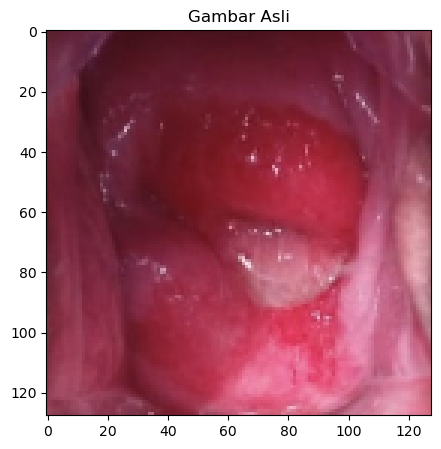

In [13]:
plt.figure(figsize=(5, 5))
plt.title('Gambar Asli')
plt.savefig(plot_dir, dpi=250)
plt.imshow(X_train[0])

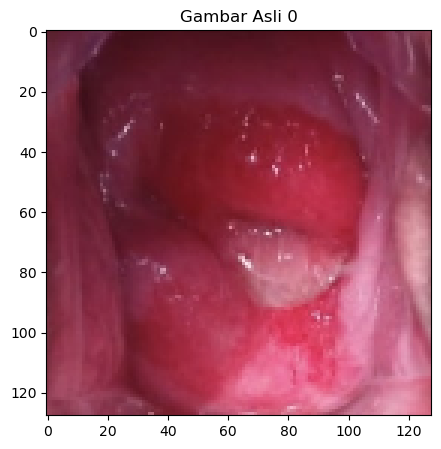

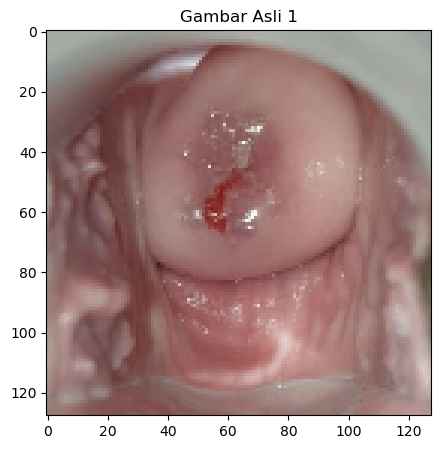

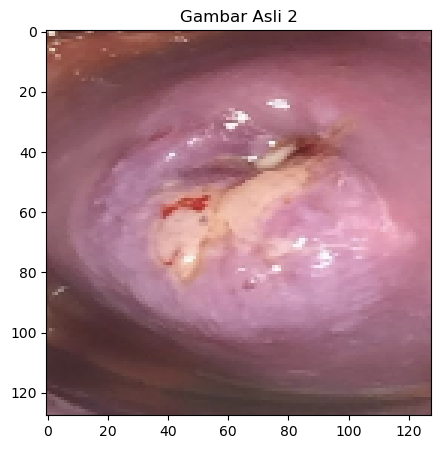

In [15]:
for idx, i in enumerate(X_train[:3]) :
    name = f'Gambar Asli {idx}'
    plt.figure(figsize=(5, 5))
    plt.title(name)
    plt.imshow(i)
    plt.savefig(name, dpi=250)
    plt.clf